# Python DA

# **Bibliotheken laden**


In [ ]:
# Importe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer

In [ ]:
#Versionen
print(f'Pandas Version: ', pd.__version__)
print(f'NumPy Version: \t', np.__version__)
print(f'Seaborn Version:', sns.__version__)

Pandas Version:  2.2.2
NumPy Version: 	 2.0.2
Seaborn Version: 0.13.2


# **Sprint 1: Pandas-Grundlagen:**
Baue ein solides Fundament in Python auf und lerne Pandas für die Datenanalyse kennen.
Behandle zentrale Themen wie die Grundlagen von Pandas, wichtige Techniken zur Datenaufbereitung und das Erkunden sowie Zusammenfassen von Datensätzen.

## **Einführung in die Pandas Serie**

### Series

In [ ]:
# wie ein eindimensionales Array mit Labels (genannt „Index“).
# kann Daten beliebigen Typs enthalten – Ganzzahlen, Strings, Fließkommazahlen # oder sogar Python-Objekte

my_series = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(my_series)

a    10
b    20
c    30
d    40
dtype: int64


In [ ]:
# Python-Liste in Series umwandeln

my_list =['John','Michael','Thomas','Stewart']
my_series = pd.Series(my_list)
print(my_list)
print(my_series)

['John', 'Michael', 'Thomas', 'Stewart']
0       John
1    Michael
2     Thomas
3    Stewart
dtype: object


In [ ]:
# Aus einem Array eine Series erstellen

my_array = np.array([10,20,30,40,50])
my_series = pd.Series(my_array)
print(my_array)
print(my_series)

[10 20 30 40 50]
0    10
1    20
2    30
3    40
4    50
dtype: int64


In [ ]:
# Aus einem Dictionary eine Series erstellen

my_dict = {'a': 100, 'b': 200, 'c': 300}
my_series = pd.Series(my_dict)

print(my_dict)
print(my_series)

{'a': 100, 'b': 200, 'c': 300}
a    100
b    200
c    300
dtype: int64


### Series Übungen

In [ ]:
# Erstelle eine Pandas Series mit der parksListe als Werte und der countriesListe als Index.
# Gib die Series aus.

parks = [
    'Yellowstone', 'Banff', 'Kruger',
    'Great Barrier Reef', 'Serengeti',
    'Lake Baikal',
    ]

countries = [
    'USA', 'Canada', 'South Africa',
    'Australia', 'Tanzania','Russia',
    ]

my_series = pd.Series(parks, countries)
print(my_series)

USA                    Yellowstone
Canada                       Banff
South Africa                Kruger
Australia       Great Barrier Reef
Tanzania                 Serengeti
Russia                 Lake Baikal
dtype: object


In [ ]:
# Eine Series aus einem Dictionary erstellen

data_parks = {
    "USA": "Yellowstone",
    "Canada": "Banff",
    "South Africa": "Kruger",
    "Australia": "Great Barrier Reef",
    "Tanzania": "Serengeti",
    "Russia": "Lake Baikal"
}

my_series = pd.Series(data_parks)
print(my_series)

USA                    Yellowstone
Canada                       Banff
South Africa                Kruger
Australia       Great Barrier Reef
Tanzania                 Serengeti
Russia                 Lake Baikal
dtype: object


In [ ]:
# Verwende dieses Dictionary, um eine Series zu erstellen.
# Gib der Series den Namen Highest Mountains in Americas.
# Gib anschließend Folgendes aus:
#   Alle Werte der Series
#   Alle Indices der Series

data = {
    "Aconcagua": 6960,
    "Ojos del Salado": 6893,
    "Monte Pissis": 6793,
    "Huascarán": 6768,
    "Cerro Bonete": 6759
}

# Step 1: Create a pandas Series with meaningful indices
my_series = pd.Series(data)

# Step 2: Assign a name to the Series
my_series.name = 'Highest Mountains in Americas'

# Step 3: Print all the values of the Series.
print(my_series.values, '\n')

# Step 4: Print all the indices of the Seriesprint({my_series.values, '\n')
print(my_series.index, '\n')

[6960 6893 6793 6768 6759] 

Index(['Aconcagua', 'Ojos del Salado', 'Monte Pissis', 'Huascarán',
       'Cerro Bonete'],
      dtype='object') 



### Serienindex

In [ ]:
# sinnvollen Index erstellen

data =[33,46,57,21]
series = pd.Series(data)  # No index provided
print(series)

index = ['a', 'b', 'c', 'd']  # Custom index labels
series = pd.Series(data, index=index)
print(series)

0    33
1    46
2    57
3    21
dtype: int64
a    33
b    46
c    57
d    21
dtype: int64


In [ ]:
# Verschiedene Datentypen für Indizes nutzen ( hier Datum )

# Strings: Ideal für beschreibende Labels.
# Datumsangaben: Unverzichtbar bei Zeitreihendaten.
# Zahlen (außer dem Standard-Index): Nützlich in bestimmten Spezialfällen.

dates = ['2024-01-01', '2024-01-02', '2024-01-03']
data =[120.5,110,98]
series = pd.Series(data, index=dates)
print(series)

2024-01-01    120.5
2024-01-02    110.0
2024-01-03     98.0
dtype: float64


In [ ]:
# String als Index

product_codes = ['ABC-123', 'XYZ-456', 'PQR-789']
sales =[12000,15000,10000]
prod_series= pd.Series(sales, index=product_codes)

print(prod_series)

ABC-123    12000
XYZ-456    15000
PQR-789    10000
dtype: int64


### Zugriff und Bearbeitung von Seriendaten

In [ ]:
# Index-Namen ändern

data = [90,60,50]
index = ['apple', 'banana', 'orange']
series = pd.Series(data, index=index)
print(series)

# Umbenennen
new_index = {'apple': 'red_apple', 'banana': 'yellow_banana'}
renamed_series = series.rename(index=new_index)
print(renamed_series)

apple     90
banana    60
orange    50
dtype: int64
red_apple        90
yellow_banana    60
orange           50
dtype: int64


In [ ]:
# Index setzen und zurücksetzen

sales_data = {'fruit': [
     'Apple',
     'Banana',
     'Orange'
     ], 'sales':[150,120,100]}
print(sales_data)

sales_series = pd.Series(sales_data['sales'], index=sales_data['fruit'])
print(sales_series, "\n")

# zurücksetzen
reset_sales_series = sales_series.reset_index()
print("\n", reset_sales_series, "\n")

{'fruit': ['Apple', 'Banana', 'Orange'], 'sales': [150, 120, 100]}
Apple     150
Banana    120
Orange    100
dtype: int64 


     index    0
0   Apple  150
1  Banana  120
2  Orange  100 



In [ ]:
# Auf Daten zugreifen und sie manipulieren

data = {
    "USA": "Yellowstone",
    "Canada": "Banff",
    "South Africa": "Kruger",
    "Australia": "Great Barrier Reef",
    "Tanzania": "Serengeti",
    "Russia": "Lake Baikal"
}

parks_series = pd.Series(data, name="National Parks")

print(parks_series.iloc[0])
print(parks_series.iloc[1])
print(parks_series.iloc[3])
print(parks_series["Canada"])
print(parks_series["Russia"])

Yellowstone
Banff
Great Barrier Reef
Banff
Lake Baikal


In [ ]:
# Values und Indizes ausgeben

data = {
    "USA": "Yellowstone",
    "Canada": "Banff",
    "South Africa": "Kruger",
    "Australia": "Great Barrier Reef",
    "Tanzania": "Serengeti",
    "Russia": "Lake Baikal"
}

parks_series = pd.Series(data, name="National Parks")

print(parks_series.values)
print(parks_series.index)

['Yellowstone' 'Banff' 'Kruger' 'Great Barrier Reef' 'Serengeti'
 'Lake Baikal']
Index(['USA', 'Canada', 'South Africa', 'Australia', 'Tanzania', 'Russia'], dtype='object')


### Einführung NumPy

**Einfache Übersicht**

- **Arrays:** NumPy-Arrays sind wie Listen auf Steroiden.  
  Sie speichern viele Zahlen, sind aber speziell dafür gemacht, superschnell zu rechnen.  

- **Mathe leicht gemacht:** NumPy bietet unzählige eingebaute Funktionen für alles – von einfachem Rechnen bis zu Trigonometrie und linearer Algebra.  

- **Mehrdimensional:** NumPy-Arrays können mehrdimensional sein – also wie Tabellen oder sogar Würfel aus Zahlen.  
  Das ist z. B. bei Bildern oder großen Datentabellen extrem nützlich.  

- **Basis für andere Tools:** NumPy ist das Fundament für viele weitere beliebte Python-Bibliotheken in Data Science und Machine Learning, z. B. Pandas oder Scikit-learn.  

---

**Warum NumPy?**

NumPy bietet Werkzeuge für Arrays, Matrizen und eine ganze Sammlung mathematischer Funktionen, um mit diesen Datenstrukturen effizient zu arbeiten.  
Die wichtigsten Vorteile:  

- **Effizienz:** NumPy ist für numerische Operationen optimiert und deutlich schneller als herkömmliche Python-Listen.  
- **Benutzerfreundlich:** Zahlreiche Funktionen zum Sortieren, Umformen und Rechnen erleichtern den Umgang mit Daten.  
- **Flexibilität:** Auch mehrdimensionale Arrays und Matrizen lassen sich leicht verarbeiten.  
- **Integration:** NumPy arbeitet nahtlos mit anderen Bibliotheken wie Pandas, Matplotlib oder Scikit-learn zusammen.  


In [ ]:
# Einfaches NumPy-Array erstellen

park_elevations = np.array([315, 446, 333, 392, 289])
print("Park Elevations:", park_elevations)

Park Elevations: [315 446 333 392 289]


### NumPy - arithmetische Operationen

In [ ]:
# MIttelwert (Durchschnitt)

visitor_counts = np.array([1000, 1200, 900, 800, 1100])

average_visitors = visitor_counts.mean()
print('Average Visitors: ', average_visitors)

Average Visitors:  1000.0


In [ ]:
# Elementweise Operationen (+,-,*,/) werden auf jedes Element angewendet

visitor_counts = np.array([1000, 1200, 900, 880, 1100])

double_visitors = visitor_counts * 2
print('Doubled Visitors: ', double_visitors)

Doubled Visitors:  [2000 2400 1800 1760 2200]


In [ ]:
# Min/Max

park_elevations = np.array([315, 446, 333, 392, 289])
max_elevation = park_elevations.max()
min_elevation = park_elevations.min()
print(" Maximum Elevation:", max_elevation, '\n', "Minimum Elevation:", min_elevation)

 Maximum Elevation: 446 
 Minimum Elevation: 289


In [ ]:
# Zugriff und Änderung von Array-Elementen

park_elevations = np.array([315, 446, 333, 392, 289])
third_park_elevation = park_elevations[2]
print("Elevation of the Third Park:", third_park_elevation)

park_elevations[0] = 320
print("Updated Elevations:", park_elevations)

Elevation of the Third Park: 333
Updated Elevations: [320 446 333 392 289]


In [ ]:
# Arbeiten mit mehrdimensionalen Arrays

park_data = np.array([
  [315, 1000],
  [446, 1200],
  [333, 900],
  [392, 800],
  [289, 110]
])

print('Park Data Array:')
print(park_data)

# 5. Park
fifth_park_elevation = park_data[4, 0]
print('Elevation of the fiftth Park: ', fifth_park_elevation)

# 2. Park
second_park_data = park_data[1]
print("Data for the Second Park:", second_park_data)

Park Data Array:
[[ 315 1000]
 [ 446 1200]
 [ 333  900]
 [ 392  800]
 [ 289  110]]
Elevation of the fiftth Park:  289
Data for the Second Park: [ 446 1200]


### NumPy Übungen

In [ ]:
# 1. Die Besucherzahlen im park_data-Array müssen aktualisiert werden. Erhöhe die Besucherzahlen jedes Parks um 10 %:
#   Greife auf die Spalte mit den Besucherzahlen im park_dataArray zu (das ist die zweite Spalte).
#   Multipliziere die Spalte mit 1.10, um die Werte um 10 % zu steigern.
#   Gib das aktualisierte park_dataArray aus.

park_data = np.array([
    [315, 1000],  # Elevation and visitors for park 1
    [446, 1200],  # Park 2
    [333, 900],   # Park 3
    [392, 800],   # Park 4
    [289, 1100]   # Park 5
], dtype='float64')

park_data[:, 1] = park_data[:, 1]*1.10
print(f'Park Data: ', park_data)

Park Data:  [[ 315. 1100.]
 [ 446. 1320.]
 [ 333.  990.]
 [ 392.  880.]
 [ 289. 1210.]]


In [ ]:
# 2. Aufgrund neuer Vermessungsdaten müssen die Höhen aller Parks angepasst werden. Erhöhe die Höhe jedes Parks im park_elevations-Array um 5 Meter:
#   Addiere 5 zu jedem Element im park_elevationsArray. (Tipp: Mit NumPy kannst du Operationen direkt auf das ganze Array anwenden.)
#   Gib das aktualisierte park_elevationsArray aus.

park_elevations = np.array([
    315,
    446,
    333,
    392,
    289
    ])

park_elevations = park_elevations+5

print(park_elevations)




[320 451 338 397 294]


## **Pandas Data Frame**

### Verstehen von Data Frames

In [ ]:
# DataFrame erstellen aus einer Liste

# liste erstellen
destinations = ['Paris', 'Tokyo', 'New York']

# DataFrame aus der Liste erstellen & Spaltennamen übergeben
df = pd.DataFrame(destinations, columns=['Destination'])
print(df)

  Destination
0       Paris
1       Tokyo
2    New York


In [ ]:
# DataFrame erstellen aus einem Dictionary

# Dictionary erstellen
data = {
    'Destination': ['Paris', 'Tokyo', 'New York'],
    'Country': ['France', 'Japan', 'USA'],
    'Rating': [4.8, 4.7, 4.5]
}

# DataFrame erstellen
# Key werden automatisch zu Spaltennamen
df = pd.DataFrame(data)
print(df)

  Destination Country  Rating
0       Paris  France     4.8
1       Tokyo   Japan     4.7
2    New York     USA     4.5


In [ ]:
# Untersuchen des DataFrames

# Dictionary erstellen
data = {
    'Destination': ['Paris', 'Tokyo', 'New York'],
    'Country': ['France', 'Japan', 'USA'],
    'Rating': [4.8, 4.7, 4.5]
}

# DataFrame erstellen
# Key werden automatisch zu Spaltennamen
df = pd.DataFrame(data)

# Untersuchungen
print('Types:\n', df.dtypes, '\n')
print('Columns:\n', df.columns, '\n')
print('Shape:\n', df.shape, '\n')

Types:
 Destination     object
Country         object
Rating         float64
dtype: object 

Columns:
 Index(['Destination', 'Country', 'Rating'], dtype='object') 

Shape:
 (3, 3) 



### Arbeiten mit externen Datensätzen (csv, xlsx, seaborn, sklearn)

In [ ]:
# CSV einladen
#   filepath: Der Pfad zur CSV-Datei.
#   sep: Das Trennzeichen zwischen den Werten (Standard ist ein Komma).
#   header: Die Zeile, die die Spaltennamen enthält (Standard ist die erste Zeile).

filepath = 'DataFrame.csv'

df = pd.read_csv(filepath, sep=';', header=0)
print(df)

  Destination Country  Rating
0       Paris  France     4.8
1       Tokyo   Japan     4.7
2    New York     USA     4.5


In [ ]:
# Excel einladen
#   filepath: Der Pfad zur CSV-Datei.
#   sep: Das Trennzeichen zwischen den Werten (Standard ist ein Komma).
#   header: Die Zeile, die die Spaltennamen enthält (Standard ist die erste Zeile).

filepath = 'DataFrame.xlsx'

df = pd.read_excel(filepath, sheet_name=0, header=0)
print(df)

  Destination Country  Rating
0       Paris  France     4.8
1       Tokyo   Japan     4.7
2    New York     USA     4.5


In [ ]:
# Verwenden vorinstallierter Datensätze aus anderen Bibleotheken
# import seaborn as sns

df = sns.load_dataset("tips")
print(df)


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [ ]:
# Verwenden vorinstallierter Datensätze aus anderen Bibleotheken
# from sklearn.datasets import load_iris

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


### DataFrame-Exploration und zusammenfassende Statistiken

In [ ]:
# Vorhandene Statistiken

data = {
    "Destination": ["Paris", "Tokyo", "New York", "London", "Dubai"],
    "Rating": [4.8, 4.7, 4.5, 4.6, 4.7],
    "Visitors (millions)": [19.1, 13.3, 10.2, 20.4, 16.3]
}

df = pd.DataFrame(data)

print(f'Head: \n', df.head(), '\n')

print(f'Tail: \n', df.tail(), '\n')

print(f'Info: \n', df.info(), '\n')


Head: 
   Destination  Rating  Visitors (millions)
0       Paris     4.8                 19.1
1       Tokyo     4.7                 13.3
2    New York     4.5                 10.2
3      London     4.6                 20.4
4       Dubai     4.7                 16.3 

Tail: 
   Destination  Rating  Visitors (millions)
0       Paris     4.8                 19.1
1       Tokyo     4.7                 13.3
2    New York     4.5                 10.2
3      London     4.6                 20.4
4       Dubai     4.7                 16.3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Destination          5 non-null      object 
 1   Rating               5 non-null      float64
 2   Visitors (millions)  5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 252.0+ bytes
Info: 
 None 



### DataFrame-Werte untersuchen

In [ ]:
# series.value_counts(normalize=False, sort=True)
#   normalize: Wenn True, wird der Anteil statt der absoluten Anzahl
#     zurückgegeben.
#   sort: Wenn True, werden die Werte absteigend nach Häufigkeit sortiert
#     (Standardverhalten).

data = {
    "Park": ["Yellowstone", "Banff", "Kruger",
             "Yellowstone", "Serengeti", "Banff"],
    "Country": ["USA", "Canada", "South Africa",
                "USA", "Tanzania", "Canada"]
}
df = pd.DataFrame(data)

# Count Values
park_counts = df['Park'].value_counts()
print(f'Count Values: \n', park_counts, '\n')

# Eindeutige Werte anzeigen
unique_countries = df['Country'].unique()
print(unique_countries)

# Anzahl der eindeutigen Werte
# nunique(dropna=True) -> falls NaN Werte nicht gezählt werden sollen
unique_park_count = df["Park"].nunique()
print(unique_park_count)

Count Values: 
 Park
Yellowstone    2
Banff          2
Kruger         1
Serengeti      1
Name: count, dtype: int64 

['USA' 'Canada' 'South Africa' 'Tanzania']
4


## **Pandas Foundations (Aufbauend auf den Grundlagen)**

### DataFrame Indexing und Slicing mit .loc[]

In [ ]:
# df.loc[row_labels, column_labels]
#   row_labels: Wähle die gewünschten Zeilen mithilfe von Labels oder einer
#     Bedingung aus.
#   column_labels: Wähle gezielt Spalten anhand ihrer Labels aus.

data = {
    'Band': ['Black Sabbath', 'Iron Maiden', 'Metallica', 'Slayer',
             'Megadeth'],
    'Country': ['UK', 'UK', 'USA', 'USA', 'USA'],
    'Year Formed': [1968, 1975, 1981, 1981, 1983],
    'Genre': ['Heavy Metal', 'Heavy Metal', 'Thrash Metal',
              'Thrash Metal', 'Thrash Metal'],
    }
df = pd.DataFrame(data, index=['BS', 'IM', 'MT', 'SL', 'MG'])

# Ausgabe der Zeile Iron Maiden
print(df.loc['IM'], '\n')

# Ausgabe Band und Genre für Metallica und Slayer
print(df.loc[['MT', 'SL'], ['Band', 'Genre']])



Band           Iron Maiden
Country                 UK
Year Formed           1975
Genre          Heavy Metal
Name: IM, dtype: object 

         Band         Genre
MT  Metallica  Thrash Metal
SL     Slayer  Thrash Metal


In [ ]:
# Alle verschiedenen Möglichkeiten

# Dictiopnary erstellen
data = {
    'Band': ['Black Sabbath', 'Iron Maiden', 'Metallica', 'Slayer',
             'Megadeth'],
    'Country': ['UK', 'UK', 'USA', 'USA', 'USA'],
    'Year Formed': [1968, 1975, 1981, 1981, 1983],
    'Genre': ['Heavy Metal', 'Heavy Metal', 'Thrash Metal',
              'Thrash Metal', 'Thrash Metal'],
    }

# DataFrame erstellen
df = pd.DataFrame(data, index=['BS', 'IM', 'MT', 'SL', 'MG'])

# Eine Zelle
print('Eine Zelle\n', df.loc['MT', 'Genre'], '\n')

# Eine Zeile
print('Eine Zeile:\n', df.loc['SL'], '\n')

# Alle Zeilen ab einer Zeile
print('Alle Zeilen ab einer Zeile:\n', df.loc['MT': ], '\n')

# Alle Zeilen bis zu einer Zeile
print('Alle Zeilen bis zu einer Zeile:\n', df.loc[: 'SL'], '\n')

# Mehrere aufeinanderfolgende Zeilen
print('Mehrere aufeinanderfolgende Zeilen:\n', df.loc['IM':'MG'], '\n')

# Eine Spalte
print('Eine Spalte:\n', df.loc[:, 'Genre'], '\n')

# Mehrere Spalten
print('Mehrere Spalten:\n', df.loc[:, ['Band', 'Genre']], '\n')

# Mehrere aufgeinanderfolgende Spalten
print('Mehrere aufgeinanderfolgende Spalten:\n', df.loc[:, 'Country':'Genre'])

Eine Zelle
 Thrash Metal 

Eine Zeile:
 Band                 Slayer
Country                 USA
Year Formed            1981
Genre          Thrash Metal
Name: SL, dtype: object 

Alle Zeilen ab einer Zeile:
          Band Country  Year Formed         Genre
MT  Metallica     USA         1981  Thrash Metal
SL     Slayer     USA         1981  Thrash Metal
MG   Megadeth     USA         1983  Thrash Metal 

Alle Zeilen bis zu einer Zeile:
              Band Country  Year Formed         Genre
BS  Black Sabbath      UK         1968   Heavy Metal
IM    Iron Maiden      UK         1975   Heavy Metal
MT      Metallica     USA         1981  Thrash Metal
SL         Slayer     USA         1981  Thrash Metal 

Mehrere aufeinanderfolgende Zeilen:
            Band Country  Year Formed         Genre
IM  Iron Maiden      UK         1975   Heavy Metal
MT    Metallica     USA         1981  Thrash Metal
SL       Slayer     USA         1981  Thrash Metal
MG     Megadeth     USA         1983  Thrash Metal 

E

In [ ]:
# Bedingtes Filtern

# Dictionary erstellen
data = {
    'Band': [
        'Black Sabbath', 'Iron Maiden', 'Metallica',
        'Slayer', 'Megadeth', 'Angra',
        ],
    'Country': [
        'UK', 'UK', 'USA',
        'USA', 'USA', 'Brazil',
        ],
    'Year Formed': [
        1968, 1975, 1981,
        1981, 1983, 1991,
        ],
    'Genre': [
        'Heavy Metal', 'Heavy Metal',
        'Thrash Metal', 'Thrash Metal',
        'Thrash Metal', 'Power Metal',
        ],
    }

# DataFrame erstellen
df = pd.DataFrame(data)

# Bands mit Gründung nach 1975 aus den USA
filtered_bands = df.loc[(df['Year Formed']>1975) & (df['Country'] == 'USA')]

print(filtered_bands)

        Band Country  Year Formed         Genre
2  Metallica     USA         1981  Thrash Metal
3     Slayer     USA         1981  Thrash Metal
4   Megadeth     USA         1983  Thrash Metal


In [ ]:
# Verwende loc und eine Bedingung, um die Zeilen aus dem DataFrame df zu
#       selektieren, in denen das Land 'UK' ist.
#   Erstelle zunächst eine sogenannte „boolean mask“ (eine Series mit True/
#         FalseWerten), indem du überprüfst, welche Zeilen in der Spalte
#         Country den Wert 'UK' haben.
#   Nutze dann den locZugriff mit dieser Maske, um nur die zutreffenden Zeilen
#       auszuwählen.
#   Gib das Ergebnis mit print() aus.

data = {
    'Band': [
        'Black Sabbath', 'Iron Maiden', 'Metallica',
        'Slayer', 'Megadeth', 'Angra',
        ],
    'Country': [
        'UK', 'UK', 'USA',
        'USA', 'USA', 'Brazil',
        ],
    'Year Formed': [
        1968, 1975, 1981,
        1981, 1983, 1991,
        ],
    'Genre': [
        'Heavy Metal', 'Heavy Metal',
        'Thrash Metal', 'Thrash Metal',
        'Thrash Metal', 'Power Metal',
        ],
    }

df = pd.DataFrame(data)

# Filter erstellen (Boolean)
mask = df['Country'] == 'UK'

# Filter anwenden und Ergebnis speichern
uk_bands = df[mask]

# Ergebnis ausgeben
print(uk_bands)

            Band Country  Year Formed        Genre
0  Black Sabbath      UK         1968  Heavy Metal
1    Iron Maiden      UK         1975  Heavy Metal


### DataFrame Indexing und Slicing mit .iloc[]

In [ ]:
# df.iloc[row_index, column_index]

# Der folgende Code verwendet den iloc-Accessor in Pandas, um das Genre der
#       Band aus der dritten Zeile des DataFrames df abzurufen.
#   .iloc: Das ist der Accessor für das Indexieren basierend auf der Position.
#         Er erlaubt dir, auf Daten über ihre numerische Position (Zeilen- und
#         Spaltenindex) zuzugreifen.
#   Das ist der Zeilenindex. Denk dran: Pandas startet bei 0, also ist 2 die
#         dritte Zeile.
#   Das ist der Spaltenindex. Er steht für die vierte Spalte
#         (da der Index bei 0 beginnt).

data = {
    'Band': [
        'Black Sabbath', 'Iron Maiden', 'Metallica',
        'Slayer', 'Megadeth', 'Angra',
        ],
    'Country': [
        'UK', 'UK', 'USA',
        'USA', 'USA', 'Brazil',
        ],
    'Year Formed': [
        1968, 1975, 1981,
        1981, 1983, 1991,
        ],
    'Genre': [
        'Heavy Metal', 'Heavy Metal',
        'Thrash Metal', 'Thrash Metal',
        'Thrash Metal', 'Power Metal',
        ],
    }
df = pd.DataFrame(data)

genre_of_metallica = df.iloc[2, 3]
print(f"Genre of Metallica: {genre_of_metallica}")


Genre of Metallica: Thrash Metal


In [ ]:
# Eine Zeile auswählen

data = {
    'Band': [
        'Black Sabbath', 'Iron Maiden', 'Metallica',
        'Slayer', 'Megadeth', 'Angra',
        ],
    'Country': [
        'UK', 'UK', 'USA',
        'USA', 'USA', 'Brazil',
        ],
    'Year Formed': [
        1968, 1975, 1981,
        1981, 1983, 1991,
        ],
    'Genre': [
        'Heavy Metal', 'Heavy Metal',
        'Thrash Metal', 'Thrash Metal',
        'Thrash Metal', 'Power Metal',
        ],
    }
df = pd.DataFrame(data)

details = df.iloc[4]
print(f'Details of Megadeth:\n {details}')

Details of Megadeth:
 Band               Megadeth
Country                 USA
Year Formed            1983
Genre          Thrash Metal
Name: 4, dtype: object


In [ ]:
# Alle unterschiedlichen Möglichkeiten

data = {
    'Band': [
        'Black Sabbath', 'Iron Maiden', 'Metallica',
        'Slayer', 'Megadeth', 'Angra',
        ],
    'Country': [
        'UK', 'UK', 'USA',
        'USA', 'USA', 'Brazil',
        ],
    'Year Formed': [
        1968, 1975, 1981,
        1981, 1983, 1991,
        ],
    'Genre': [
        'Heavy Metal', 'Heavy Metal',
        'Thrash Metal', 'Thrash Metal',
        'Thrash Metal', 'Power Metal',
        ],
    }
df = pd.DataFrame(data)

# Einzelner Zugriff
print('Einzelner Zugriff: \n', df.iloc[2,3], '\n')

# Einzelne Zeile
print('Einzelne Zeile: \n', df.iloc[4], '\n')

# Einzelne Spalte
print('Einzelne Spalte: \n', df.iloc[:, 3], '\n')

# Zeilen-Slicing
print('Zeilen-Slicing: \n', df.iloc[2:5], '\n')

# Spalten-Slicing
print('Spalten-Slicing: \n', df.iloc[:, 1:3], '\n')

# Bestimmte Zeilen/Spalten
print('Bestimmte Zeilen/Spalten: \n', df.iloc[[1,2,5], [0,2]], '\n')

Einzelner Zugriff: 
 Thrash Metal 

Einzelne Zeile: 
 Band               Megadeth
Country                 USA
Year Formed            1983
Genre          Thrash Metal
Name: 4, dtype: object 

Einzelne Spalte: 
 0     Heavy Metal
1     Heavy Metal
2    Thrash Metal
3    Thrash Metal
4    Thrash Metal
5     Power Metal
Name: Genre, dtype: object 

Zeilen-Slicing: 
         Band Country  Year Formed         Genre
2  Metallica     USA         1981  Thrash Metal
3     Slayer     USA         1981  Thrash Metal
4   Megadeth     USA         1983  Thrash Metal 

Spalten-Slicing: 
   Country  Year Formed
0      UK         1968
1      UK         1975
2     USA         1981
3     USA         1981
4     USA         1983
5  Brazil         1991 

Bestimmte Zeilen/Spalten: 
           Band  Year Formed
1  Iron Maiden         1975
2    Metallica         1981
5        Angra         1991 



In [ ]:
# Wir suchen die OGs des US-Heavy-Metal. Hilf uns bei der Suche:
#   Verwende .loc[] mit mehreren Bedingungen, um alle Bands anzuzeigen:
#       Die aus den USA stammen.
#       Die vor 1982 gegründet wurden.
#   Verwende .iloc[] mit Slicing, um die ersten drei Zeilen und deren ersten
#   zwei Spalten anzuzeigen.

data = {
    "Band": [
        "Pantera", "Sepultura", "Dream Theater",
        "Anthrax", "Death", "Exodus",
        "Judas Priest", "Testament"
    ],
    "Country": [
        "USA", "Brazil", "USA",
        "USA", "USA", "USA",
        "UK", "USA"
    ],
    "Year Formed": [
        1981, 1984, 1985,
        1981, 1983, 1979,
        1969, 1983
    ],
    "Genre": [
        "Groove Metal", "Thrash Metal", "Progressive Metal",
        "Thrash Metal", "Death Metal", "Thrash Metal",
        "Heavy Metal", "Thrash Metal"
    ]
}

df = pd.DataFrame(data)

# Filter Bands aus den USA und Gründung 1982
bands = df.iloc[:,][(df.iloc[:, 2] < 1982) & (df.iloc[:, 1] == 'USA')]
print(bands)

# ersten 3 Zeilen und ersten 2 Spalten
print(df.iloc[:3, :2])

      Band Country  Year Formed         Genre
0  Pantera     USA         1981  Groove Metal
3  Anthrax     USA         1981  Thrash Metal
5   Exodus     USA         1979  Thrash Metal
            Band Country
0        Pantera     USA
1      Sepultura  Brazil
2  Dream Theater     USA


### Hinzufügen, Subtrahieren und Ändern von Spalten

In [ ]:
# Spalten hinzufügen

data = {
    'Band': [
        'Black Sabbath', 'Iron Maiden', 'Metallica',
        'Slayer', 'Megadeth', 'Angra',
        ],
    'Country': [
        'UK', 'UK', 'USA',
        'USA', 'USA', 'Brazil',
        ],
    'Year Formed': [
        1968, 1975, 1981,
        1981, 1983, 1991,
        ],
    'Genre': [
        'Heavy Metal', 'Heavy Metal',
        'Thrash Metal', 'Thrash Metal',
        'Thrash Metal', 'Power Metal',
        ],
    }
df = pd.DataFrame(data)

df['Years Active'] = 2023 - df['Year Formed']
print(df, '\n')

# Filtert auf das Gründungsjahr
# df.loc[df["Band"] == "Black Sabbath", "Year Formed"]
# Überschreibt die Years Active
# df.loc[df["Band"] == "Black Sabbath", "Years Active"]


# Black Sabbath hat aber 2017 aufgehört, also brauchen wir eine Anpassung
df.loc[df['Band'] == 'Black Sabbath', 'Years Active'] = 2017 - df.loc[df['Band'] == 'Black Sabbath', 'Year Formed']
print(df, '\n')

# Spalte erstellen, ob is_active (True or False)
df['is_active'] = (2023 - df['Years Active']) == df['Year Formed']
print(df)

            Band Country  Year Formed         Genre  Years Active
0  Black Sabbath      UK         1968   Heavy Metal            55
1    Iron Maiden      UK         1975   Heavy Metal            48
2      Metallica     USA         1981  Thrash Metal            42
3         Slayer     USA         1981  Thrash Metal            42
4       Megadeth     USA         1983  Thrash Metal            40
5          Angra  Brazil         1991   Power Metal            32 

            Band Country  Year Formed         Genre  Years Active
0  Black Sabbath      UK         1968   Heavy Metal            49
1    Iron Maiden      UK         1975   Heavy Metal            48
2      Metallica     USA         1981  Thrash Metal            42
3         Slayer     USA         1981  Thrash Metal            42
4       Megadeth     USA         1983  Thrash Metal            40
5          Angra  Brazil         1991   Power Metal            32 

            Band Country  Year Formed         Genre  Years Active  is_ac

In [ ]:
# Spalten bearbeiten
# Mittlerweile ist nicht mehr 2023, also stellen wir auf 2025 um

#df['Years Active'] = df['Years Active'] +2
#print(df)

# Black Sabbath ist nicht mehr aktiv, also sollte die Änderung nur für aktive
# Bands durchgeführt werden
df.loc[df['is_active'] == True, 'Years Active'] += 1
print(df)

            Band Country  Year Formed         Genre  Years Active  is_active
0  Black Sabbath      UK         1968   Heavy Metal            49      False
1    Iron Maiden      UK         1975   Heavy Metal            49       True
2      Metallica     USA         1981  Thrash Metal            43       True
3         Slayer     USA         1981  Thrash Metal            43       True
4       Megadeth     USA         1983  Thrash Metal            41       True
5          Angra  Brazil         1991   Power Metal            33       True


In [ ]:
# Spalten oder Zeilen löschen
# df.drop(labels, axis=0 or 1, inplace=False or True)

# labels:   Name(n) der zu löschenden Zeilen oder Spalten.
# axis:     0 für Zeilen (Standard), 1 für Spalten.
# inplace:  False (Standard) gibt einen neuen DataFrame zurück,
#           True ändert den bestehenden.

data = {
    'Band': [
        'Black Sabbath', 'Iron Maiden', 'Metallica',
        'Slayer', 'Megadeth', 'Angra',
        ],
    'Country': [
        'UK', 'UK', 'USA',
        'USA', 'USA', 'Brazil',
        ],
    'Year Formed': [
        1968, 1975, 1981,
        1981, 1983, 1991,
        ],
    'Genre': [
        'Heavy Metal', 'Heavy Metal',
        'Thrash Metal', 'Thrash Metal',
        'Thrash Metal', 'Power Metal',
        ],
    }
df = pd.DataFrame(data)

df['Years Active'] = 2023 - df['Year Formed']
df['is_active'] = (2023 - df['Years Active']) == df['Year Formed']
print(df, '\n')

# Spalte Year Formed löschen
df = df.drop('Year Formed', axis = 1)
print(df, '\n')

# Mehrere Spalten löschen
df = df.drop(['Country', 'Years Active', 'is_active'], axis=1)
print(df, '\n')

            Band Country  Year Formed         Genre  Years Active  is_active
0  Black Sabbath      UK         1968   Heavy Metal            55       True
1    Iron Maiden      UK         1975   Heavy Metal            48       True
2      Metallica     USA         1981  Thrash Metal            42       True
3         Slayer     USA         1981  Thrash Metal            42       True
4       Megadeth     USA         1983  Thrash Metal            40       True
5          Angra  Brazil         1991   Power Metal            32       True 

            Band Country         Genre  Years Active  is_active
0  Black Sabbath      UK   Heavy Metal            55       True
1    Iron Maiden      UK   Heavy Metal            48       True
2      Metallica     USA  Thrash Metal            42       True
3         Slayer     USA  Thrash Metal            42       True
4       Megadeth     USA  Thrash Metal            40       True
5          Angra  Brazil   Power Metal            32       True 

         

In [ ]:
# Spalte hinzufügen
#   Neue Spalte anlegen
#   df["Neue Spalte"] = [wert1, wert2, ...]
# Spalte bearbeiten
#   Spalte neu zuweisen
#   df["Spalte"] = df["Spalte"] + wert
# Spalte entfernen
#   .drop() mit axis=1
#   df.drop(["Spalte1", "Spalte2"], axis=1)

In [ ]:
# Verfeinere den Heavy-Metal-Band-Datensatz, indem du bestimmte Infos entfernst
# und neue Erkenntnisse hinzufügst. Deine Aufgaben:
#   1. Entferne die Spalten Country und Genre aus dem Datensatz.
#   2. Füge eine neue Spalte namens Albums per Decade hinzu, berechnet als
#       Anzahl der Alben geteilt durch die Anzahl der
#       Jahrzehnte seit der Gründung.
#   3. Verdopple die Werte in Albums per Decade, um hypothetische
#       Neuveröffentlichungen widerzuspiegeln.

data = {
    'Band': [
        'Pantera', 'Sepultura', 'Dream Theater', 'Anthrax', 'Death',
        'Exodus', 'Judas Priest', 'Testament',
        ],
    'Country': [
        'USA', 'Brazil', 'USA', 'USA', 'USA', 'USA',
        'UK', 'USA',
        ],
    'Year Formed': [
        1981, 1984, 1985, 1981, 1983, 1979, 1969, 1983,
        ],
    'Genre': [
        'Groove Metal', 'Thrash Metal', 'Progressive Metal',
        'Thrash Metal', 'Death Metal', 'Thrash Metal',
        'Heavy Metal', 'Thrash Metal',
        ],
    'Albums Released': [
        9, 15, 14, 11, 7, 10, 18, 12,
        ],
    }

df = pd.DataFrame(data)
print(df, '\n')

# Step 1: Remove the "Country" and "Genre" columns
df = df.drop(['Country', 'Genre'], axis=1)
print(df, '\n')

# Step 2: Add a new column "Albums per Decade"
df['Albums per Decade'] = (df['Albums Released'] / ((2025 - df['Year Formed']) / 10)).round(2)
print(df, '\n')

# Step 3: Modify the "Albums per Decade" column
df['Albums per Decade'] = df['Albums per Decade'] * 2
print(df, '\n')



            Band Country  Year Formed              Genre  Albums Released
0        Pantera     USA         1981       Groove Metal                9
1      Sepultura  Brazil         1984       Thrash Metal               15
2  Dream Theater     USA         1985  Progressive Metal               14
3        Anthrax     USA         1981       Thrash Metal               11
4          Death     USA         1983        Death Metal                7
5         Exodus     USA         1979       Thrash Metal               10
6   Judas Priest      UK         1969        Heavy Metal               18
7      Testament     USA         1983       Thrash Metal               12 

            Band  Year Formed  Albums Released
0        Pantera         1981                9
1      Sepultura         1984               15
2  Dream Theater         1985               14
3        Anthrax         1981               11
4          Death         1983                7
5         Exodus         1979               10
6  

### Aggregieren von Werten

In [ ]:
# Aggregations-Methoden
# .sum(), .mean(), .median(), .min() und .max()


data = {
    "Band": ["Black Sabbath", "Iron Maiden", "Metallica",
             "Slayer", "Megadeth", "Angra"],
    "Country": ["UK", "UK", "USA", "USA", "USA", "Brazil"],
    "Year Formed": [1968, 1975, 1981, 1981, 1983, 1991],
    "Genre": ["Heavy Metal", "Heavy Metal", "Thrash Metal",
              "Thrash Metal", "Thrash Metal", "Power Metal"],
    "Years Active": [49, 49, 43, 43, 41, 33],
    "is_active": [False, True, True, True, True, True]
}
df = pd.DataFrame(data)

# Summe von Years Active
total_years_active = df["Years Active"].sum()
print(f"Total Years Active: {total_years_active}\n")

# Mean von Years Active
mean_years_active = df['Years Active'].mean()
print(f"Mean Years Active: {mean_years_active}\n")

# Median von Years Active
median_years_active = df['Years Active'].median()
print(f"Median Years Active: {median_years_active}\n")

# Min von Ywars Active
min_years_active = df['Years Active'].min()
print(f'Min Years Active: {min_years_active}\n')

# Max von Ywars Active
max_years_active = df['Years Active'].max()
print(f'Max Years Active: {max_years_active}\n')

Total Years Active: 258

Mean Years Active: 43.0

Median Years Active: 43.0

Min Years Active: 33

Max Years Active: 49



In [ ]:
# Original beibehalten und mit Kopie arbeiten

data = {
    "Band": ["Black Sabbath", "Iron Maiden", "Metallica",
             "Slayer", "Megadeth", "Angra"],
    "Country": ["UK", "UK", "USA", "USA", "USA", "Brazil"],
    "Year Formed": [1968, 1975, 1981, 1981, 1983, 1991],
    "Genre": ["Heavy Metal", "Heavy Metal", "Thrash Metal",
              "Thrash Metal", "Thrash Metal", "Power Metal"],
    "Years Active": [49, 49, 43, 43, 41, 33],
    "is_active": [False, True, True, True, True, True]
}
df = pd.DataFrame(data)

# Kopie erstellen
df_copy = df.copy()
print(df_copy, '\n')

df_copy['Years Active'] += 1
print(df_copy, '\n')


            Band Country  Year Formed         Genre  Years Active  is_active
0  Black Sabbath      UK         1968   Heavy Metal            49      False
1    Iron Maiden      UK         1975   Heavy Metal            49       True
2      Metallica     USA         1981  Thrash Metal            43       True
3         Slayer     USA         1981  Thrash Metal            43       True
4       Megadeth     USA         1983  Thrash Metal            41       True
5          Angra  Brazil         1991   Power Metal            33       True 

            Band Country  Year Formed         Genre  Years Active  is_active
0  Black Sabbath      UK         1968   Heavy Metal            50      False
1    Iron Maiden      UK         1975   Heavy Metal            50       True
2      Metallica     USA         1981  Thrash Metal            44       True
3         Slayer     USA         1981  Thrash Metal            44       True
4       Megadeth     USA         1983  Thrash Metal            42       Tr

In [ ]:
# 1. Gesamtanzahl veröffentlichter Alben: Verwende .sum(), um die gesamte
#       Anzahl aller veröffentlichten Alben zu berechnen.
# 2. Durchschnittlich veröffentlichte Alben: Verwende .mean(), um den
#       Durchschnitt zu berechnen.
# 3. Höchstanzahl veröffentlichter Alben: Verwende .max(), um den
#       höchsten Wert zu finden.


data = {
    "Band": [ "Pantera", "Sepultura", "Dream Theater", "Anthrax",
                    "Death", "Exodus", "Judas Priest", "Testament" ],
    "Country": [ "USA", "Brazil", "USA", "USA", "USA", "USA", "UK", "USA" ],
    "Year Formed": [ 1981, 1984, 1985, 1981, 1983, 1979, 1969, 1983 ],
    "Genre": [ "Groove Metal", "Thrash Metal", "Progressive Metal",
        "Thrash Metal", "Death Metal", "Thrash Metal",
        "Heavy Metal", "Thrash Metal" ],
    "Albums Released": [ 9, 15, 14, 11, 7, 10, 18, 12 ]
}

df = pd.DataFrame(data)

# Calculate the total albums released
print('Albums released: ', df['Albums Released'].sum(), '\n')

# Calculate the average albums released
print('Average Albums released: ', df['Albums Released'].mean(), '\n')

# Find the maximum albums released
print('Max Albums released: ', df['Albums Released'].max(), '\n')

Albums released:  96 

Average Albums released:  12.0 

Max Albums released:  18 



### Daten sortieren

In [ ]:
# Zeilen nach Spaltenwerten sortieren
# sort.values()
# df.sort_values(by="column_name", ascending=True, inplace=False)

# by: Gibt an, nach welcher Spalte(n) sortiert werden soll.
# ascending: Sortiert standardmäßig aufsteigend. Mit ascending=False
#       wird absteigend sortiert.
# inplace: Wenn True, wird das ursprüngliche DataFrame direkt verändert.
#       Wenn False (Standard), wird ein neues DataFrame zurückgegeben.


data = {
    "Band": ["Black Sabbath", "Iron Maiden", "Metallica",
             "Slayer", "Megadeth", "Angra"],
    "Years Active": [49, 49, 43, 43, 41, 33]
}
df = pd.DataFrame(data)
print('Unsorted', df, '\n')

# Sortierung nach Years Active
sorted_df = df.sort_values(by='Years Active')
print('Sorted', sorted_df, '\n')

Unsorted             Band  Years Active
0  Black Sabbath            49
1    Iron Maiden            49
2      Metallica            43
3         Slayer            43
4       Megadeth            41
5          Angra            33 

Sorted             Band  Years Active
5          Angra            33
4       Megadeth            41
3         Slayer            43
2      Metallica            43
0  Black Sabbath            49
1    Iron Maiden            49 



In [ ]:
# Nebeneffekt von sort, die Indizes stimmen nicht mehr
# Lösung: df.reset_index(drop=False, inplace=False)
#           Wenn drop = True, Index wird gelöscht
#           wenn drop = False, alte Index wird als Spalte hinzugefügt

# Nach sort
print('Sorted\n', sorted_df, '\n')

# drop = False (Standard)
reset_df_append = sorted_df.reset_index()
print('drop False\n', reset_df_append, '\n')

#drop = true
reset_df_drop = sorted_df.reset_index(drop=True)
print('drop True\n', reset_df_drop, '\n')

Sorted
             Band  Years Active
5          Angra            33
4       Megadeth            41
3         Slayer            43
2      Metallica            43
0  Black Sabbath            49
1    Iron Maiden            49 

drop False
    index           Band  Years Active
0      5          Angra            33
1      4       Megadeth            41
2      3         Slayer            43
3      2      Metallica            43
4      0  Black Sabbath            49
5      1    Iron Maiden            49 

drop True
             Band  Years Active
0          Angra            33
1       Megadeth            41
2         Slayer            43
3      Metallica            43
4  Black Sabbath            49
5    Iron Maiden            49 



In [ ]:
#.sort_values()
#     Sortiert Zeilen nach Spaltenwerten.
#     by, ascending, inplace
#.reset_index()
#     Setzt die Zeilenindizes eines DataFrames zurück.
#     drop, inplace
#drop=True
#     Entfernt den alten Index beim Zurücksetzen.
#     Hält das DataFrame sauber.
#ascending
#     Bestimmt die Sortierreihenfolge.
#     Standard ist True (aufsteigend).
#inplace=True
#     Verändert das ursprüngliche DataFrame direkt.
#     Spart Speicher, vermeidet Duplikate.

In [ ]:
# 1. Nach veröffentlichten Alben sortieren:
#     Verwende .sort_values() und sortiere nach der Spalte Albums
#         Released in absteigender Reihenfolge.
#     Setze inplace=True, um das Original-DataFrame zu verändern.
# 2. DataFrame neu indexieren:
#     Setze danach mit .reset_index(drop=True) die Indizes zurück.

data = {
    "Band": [ "Pantera", "Sepultura", "Dream Theater", "Anthrax",
                    "Death", "Exodus", "Judas Priest", "Testament" ],
    "Country": [ "USA", "Brazil", "USA", "USA", "USA", "USA", "UK", "USA" ],
    "Year Formed": [ 1981, 1984, 1985, 1981, 1983, 1979, 1969, 1983 ],
    "Genre": [ "Groove Metal", "Thrash Metal", "Progressive Metal",
        "Thrash Metal", "Death Metal", "Thrash Metal",
        "Heavy Metal", "Thrash Metal" ],
    "Albums Released": [ 9, 15, 14, 11, 7, 10, 18, 12 ]
}

df = pd.DataFrame(data)

# Before sort
print('df\n', df, '\n')

# Step 1: Sort by "Albums Released" in descending order
df.sort_values(by='Albums Released', ascending=False, inplace=True )
print('After sort, df:\n', df, '\n')

# Step 2: Reset the index
df = df.reset_index(drop=True)
print('After Index, df:\n', df, '\n')

df
             Band Country  Year Formed              Genre  Albums Released
0        Pantera     USA         1981       Groove Metal                9
1      Sepultura  Brazil         1984       Thrash Metal               15
2  Dream Theater     USA         1985  Progressive Metal               14
3        Anthrax     USA         1981       Thrash Metal               11
4          Death     USA         1983        Death Metal                7
5         Exodus     USA         1979       Thrash Metal               10
6   Judas Priest      UK         1969        Heavy Metal               18
7      Testament     USA         1983       Thrash Metal               12 

After sort, df:
             Band Country  Year Formed              Genre  Albums Released
6   Judas Priest      UK         1969        Heavy Metal               18
1      Sepultura  Brazil         1984       Thrash Metal               15
2  Dream Theater     USA         1985  Progressive Metal               14
7      Testamen

# **Sprint 2: Datenaufbereitung mit Pandas**
Konzentriere dich auf das Bereinigen und Transformieren unstrukturierter Datensätze, um sie analysierbar zu machen.
Lerne, wie man DataFrames zusammenführt und verknüpft, Daten bewertet und bereinigt sowie Aggregationstechniken anwendet.


## **Datenaufbereitung**

### Was ist Data Wrangling?

Auch bekannt als Data Munging. prozess im Datamanagement, bei dem es darum, geht, Rohdaten in ein ntzbares Format für staistische Analysen und Machine Learning umzuwandeln und zu strkturieren.

**Wesentliche 3 Schritte:**


1.   **Daten sammeln** (strukturiert und unstrukturiert);

Daten aus verschiedenen Quellen sammeln:
*   Datenbanken
*   CSV
*   Excel
*   API

2.   **Daten prüfen**

Zusammenführen der Daten in ein einheitliches Format und Behebung grundlegender Fehler (konsistent, korrekt, vollständig).

3.   **Datenbereinigung**

Bereinigung der Daten:


*   Duplikate entfernen
*   Umgang mit fehlenden Werten
*   Formatfehler
*   Format vereinheitlichen (Bsp Datumsangaben)







### CRISP-Modell

Das **CRISP-Modell** (Cross Industry Standard Process for Data Mining) ist ein strukturierter Ansatz für datengetriebene Projekte.

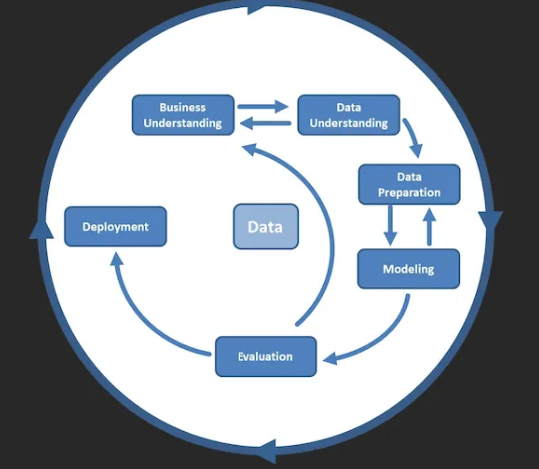

**Ziel des Modells**:


*   Datenanalyse und Modellierung passen zur den Geschäftszielen
*   Daten liefern Erkenntnisse oder Modelle, die wirklich umsetzbar und wirksam sind





---


### **6 Phasen des Modells**:



**Business Understanding**

> Einzelhandelsunternehmen möchte die kundenabwanderung reduzieren, in dem es Faktoren identifiziert, die die Kundentreue beeinflussen.

**Data Understanding**

> Team sammelt aus verschiedenen Quellen Daten wir Transaktionsdaten, Kundenfeedback und Webanalysen. Anschließend werden Muster identifiziert und die Datenqualität bewertet (z.B. fehlende Werte, Ausreißer).

**Data Preparation**

> Datensatz wird bereinigt und für die Analyse aufbereitet. Das beinhaltet zB. Standardisierung, den Umgang mit fehlenden Werten sowie das Erstellen und Auswaählen relevanter Features.

**Modeling**

> Auf Basis der vorbereiteten Daten werden verschiedene Machine-Learning-Modelle entwickelt, um die Kundenabwanderung vorherzusagen.

**Evaluation**

> Nach der Modellierung wird die MOdellierung anhand verschiedener Metriken bewertet.

**Deployment**

> Das finale Modell wird in das CRM-System des Unternehmens integriert. Das Marketing-Team kann nun gezielt Rückgewinnungskampagnen für gefährdete Kunden durchführen.



## **Datenintegration**

### Was heisst Datenintegration?

Daten werden aus allen möglichen Systemen abgezogen wie z.B. soziale Netzwerke, Transaktionssysteme, IoT-Geräte, mobile Apps. Der Zugriff auf verschiedene Quellen und deren Integration für Analysen ist daher eine zentrale Fähigkeit.


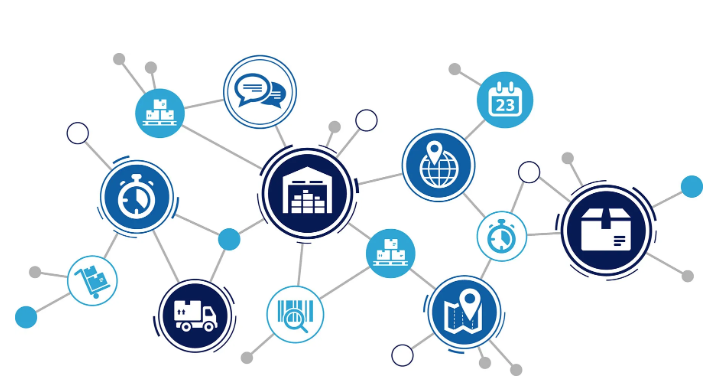

### Verkettung von DataFrames - Theorie

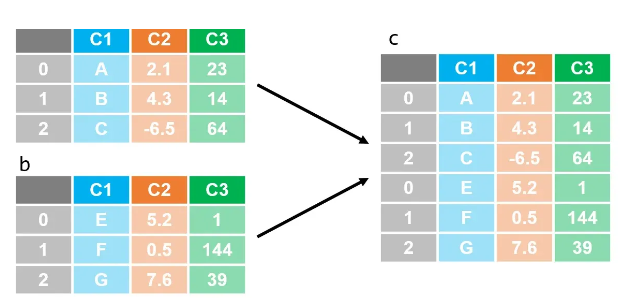

In [ ]:
# Unternehmen sammelt Sales-Daten in mantlichen Reports, die als DF vorliegen

# Daten aus der Aufgabenstellung manuell in Dictionaries überführen
january_data = {
    "Region": ["North", "South", "East", "West"],
    "Sales": [25000, 30000, 20000, 15000],
    "Month": ["January"] * 4
}
february_data = {
    "Region": ["North", "South", "East", "West"],
    "Sales": [27000, 32000, 23000, 18000],
    "Month": ["February"] * 4
}
march_data = {
    "Region": ["North", "South", "East", "West"],
    "Sales": [28000, 31000, 24000, 20000],
    "Month": ["March"] * 4
}

# DataFrames erstellen
df_jan = pd.DataFrame(january_data)
df_feb = pd.DataFrame(february_data)
df_mar = pd.DataFrame(march_data)

# Ausgabe der DataFrames
print('Januar Daten: \n', df_jan, '\n')
print('Februar Daten: \n', df_feb, '\n')
print('März Daten\n', df_mar, '\n')

Januar Daten: 
   Region  Sales    Month
0  North  25000  January
1  South  30000  January
2   East  20000  January
3   West  15000  January 

Februar Daten: 
   Region  Sales     Month
0  North  27000  February
1  South  32000  February
2   East  23000  February
3   West  18000  February 

März Daten
   Region  Sales  Month
0  North  28000  March
1  South  31000  March
2   East  24000  March
3   West  20000  March 



In [ ]:
# Jetzt sollen die Daten zur Analyse zusammengefügt werden
# Hierfür eignet sich pd.concat()
# Mit dem Parameter axis bestimmst du die Richtung der Verkettung:
#       axis=0: fügt Zeilen hinzu (vertikal).
#       axis=1: fügt Spalten hinzu (horizontal).

# Verkettung der DataFrames
all_data = pd.concat([df_jan, df_feb, df_mar])

# Ausgabe der Daten
print('Alle Daten\n', all_data, '\n')

# Nun sind aber die Indizes nicht korrekt
all_data = all_data.reset_index(drop=True)

# Erneute Ausgabe
print('Alle Daten\n', all_data, '\n')

Alle Daten
   Region  Sales     Month
0  North  25000   January
1  South  30000   January
2   East  20000   January
3   West  15000   January
0  North  27000  February
1  South  32000  February
2   East  23000  February
3   West  18000  February
0  North  28000     March
1  South  31000     March
2   East  24000     March
3   West  20000     March 

Alle Daten
    Region  Sales     Month
0   North  25000   January
1   South  30000   January
2    East  20000   January
3    West  15000   January
4   North  27000  February
5   South  32000  February
6    East  23000  February
7    West  18000  February
8   North  28000     March
9   South  31000     March
10   East  24000     March
11   West  20000     March 



In [ ]:
# Fülle die Stelle mit ___ aus

data1 = {
    'A': [1, 2, 3],
    'B': ['a', 'b', 'c']
}
df1 = pd.DataFrame(data1)

data2 = {
    'A': [4, 5, 6],
    'B': ['d', 'e', 'f']
}
df2 = pd.DataFrame(data2)

# Replace the "___"
# concatenated_rows = pd.concat([__, __], axis=__, ignore_index=True)
concatenated_rows = pd.concat([df1, df2], axis=0, ignore_index=True)

print("Concatenated along rows:")
print(concatenated_rows)

Concatenated along rows:
   A  B
0  1  a
1  2  b
2  3  c
3  4  d
4  5  e
5  6  f


### Verkettung von DataFrames - Übungen

In [ ]:
# Übung 1
# Zwei DataFrames vertikal zusammenfügen.

# Sample data for January
data_jan = {'Date': ['2023-01-01', '2023-01-02'],
            'Stock Price': [100, 102],
            'Volume': [3000, 3200],
            'Region': ['North', 'South']}
df_jan = pd.DataFrame(data_jan)

# Sample data for February
data_feb = {'Date': ['2023-02-01', '2023-02-02'],
            'Stock Price': [110, 112],
            'Volume': [3300, 3400],
            'Region': ['East', 'West']}
df_feb = pd.DataFrame(data_feb)

# Print the heads of the dataframes
print("January DataFrame:")
print(df_jan.head())
print("\nFebruary DataFrame:")
print(df_feb.head())

# Step 1: Concatenate the two dataframes vertically
# df_combined = pd.________([__________, __________], axis=____, ignore_index=True)  # Fill in the blanks

df_combined = pd.concat([df_jan, df_feb], axis=0, ignore_index=True)  # Fill in the blanks

# Display the concatenated dataframe
print("\nConcatenated DataFrame:")
print(df_combined.head())


January DataFrame:
         Date  Stock Price  Volume Region
0  2023-01-01          100    3000  North
1  2023-01-02          102    3200  South

February DataFrame:
         Date  Stock Price  Volume Region
0  2023-02-01          110    3300   East
1  2023-02-02          112    3400   West

Concatenated DataFrame:
         Date  Stock Price  Volume Region
0  2023-01-01          100    3000  North
1  2023-01-02          102    3200  South
2  2023-02-01          110    3300   East
3  2023-02-02          112    3400   West


In [ ]:
# Übung 2:
# Zwei DataFrames horizontal zusammenfügen.

# Sample stock data for January with additional columns
data_jan = {'Date': ['2023-01-01', '2023-01-02'],
            'Stock Price': [100, 102],
            'Volume': [3000, 3200],
            'Region': ['North', 'South'],
            'Market Cap': [1.5e9, 1.7e9]}
df_jan = pd.DataFrame(data_jan)

# Sample stock data for January with additional columns
data_feb = {'Date': ['2023-02-01', '2023-02-02'],
            'Stock Price': [110, 112],
            'Volume': [3300, 3400],
            'Region': ['East', 'West'],
            'Market Cap': [1.8e9, 2.0e9]}
df_feb = pd.DataFrame(data_feb)

# Print the heads of the dataframes
print("January DataFrame:")
print(df_jan.head())
print("\nFebruary DataFrame:")
print(df_feb.head())

# Step 1: Concatenate the dataframes horizontally
# Fill in the blanks
# df_combined = ______.______([__________, __________], ________=__________)

df_combined = pd.concat([df_jan, df_feb], axis=1)

# Display the concatenated dataframe
print("\nConcatenated DataFrame:")
print(df_combined.head())

January DataFrame:
         Date  Stock Price  Volume Region    Market Cap
0  2023-01-01          100    3000  North  1.500000e+09
1  2023-01-02          102    3200  South  1.700000e+09

February DataFrame:
         Date  Stock Price  Volume Region    Market Cap
0  2023-02-01          110    3300   East  1.800000e+09
1  2023-02-02          112    3400   West  2.000000e+09

Concatenated DataFrame:
         Date  Stock Price  Volume Region    Market Cap        Date  \
0  2023-01-01          100    3000  North  1.500000e+09  2023-02-01   
1  2023-01-02          102    3200  South  1.700000e+09  2023-02-02   

   Stock Price  Volume Region    Market Cap  
0          110    3300   East  1.800000e+09  
1          112    3400   West  2.000000e+09  


In [ ]:
# Übung 3
# Zwei DataFrames mit unterschiedlichen Spalten zusammenfügen und den Index zurücksetzen.

# Sample data for January
data_jan = {'Date': ['2023-01-01', '2023-01-02'],
            'Stock Price': [100, 102],
            'Volume': [3000, 3200],
            'Region': ['North', 'South'],
            'Market Cap': [1.5e9, 1.7e9]}
df_jan = pd.DataFrame(data_jan)

# Sample data for February (missing 'Region' and 'Market Cap' columns)
data_feb = {'Date': ['2023-02-01', '2023-02-02'],
            'Stock Price': [110, 112],
            'Volume': [3300, 3400]}
df_feb = pd.DataFrame(data_feb)

# Print the heads of the dataframes
print("January DataFrame:")
print(df_jan.head())
print("\nFebruary DataFrame:")
print(df_feb.head())

# Step 1: Concatenate the dataframes and reset the index
# Fill in the blanks
# df_combined = pd.concat(______)

df_combined = pd.concat([df_jan, df_feb], axis=0).reset_index(drop=True)

# Display the concatenated dataframe
print("\nConcatenated DataFrame:")
print(df_combined.head())


January DataFrame:
         Date  Stock Price  Volume Region    Market Cap
0  2023-01-01          100    3000  North  1.500000e+09
1  2023-01-02          102    3200  South  1.700000e+09

February DataFrame:
         Date  Stock Price  Volume
0  2023-02-01          110    3300
1  2023-02-02          112    3400

Concatenated DataFrame:
         Date  Stock Price  Volume Region    Market Cap
0  2023-01-01          100    3000  North  1.500000e+09
1  2023-01-02          102    3200  South  1.700000e+09
2  2023-02-01          110    3300    NaN           NaN
3  2023-02-02          112    3400    NaN           NaN


In [ ]:
# Übung 4
# DataFrames mit unterschiedlichen Indizes zusammenfügen und im finalen DataFrame den Index zurücksetzen.

# Sample sales data for January with custom index
data_jan = {'Date': ['2023-01-01', '2023-01-02'],
            'Sales': [1000, 1200],
            'Region': ['North', 'South']}
df_jan = pd.DataFrame(data_jan, index=['A', 'B'])

# Sample sales data for February with custom index
data_feb = {'Date': ['2023-02-01', '2023-02-02'],
            'Sales': [1100, 1300],
            'Region': ['East', 'West']}
df_feb = pd.DataFrame(data_feb, index=['C', 'D'])

# Print the heads of the dataframes
print("January DataFrame:")
print(df_jan.head())
print("\nFebruary DataFrame:")
print(df_feb.head())

# Step 1: Concatenate the dataframes and reset the index
# Fill in the blanks
# df_combined = pd.concat([__________, __________], axis=0)

df_combined = pd.concat([df_jan, df_feb], axis=0)

# Step 2: Reset the index of the concatenated dataframe
df_combined_reset = df_combined.reset_index(drop=True)  # Reset the index

# Display the concatenated dataframe with reset index
print("\nConcatenated DataFrame with Reset Index:")
print(df_combined_reset.head())


January DataFrame:
         Date  Sales Region
A  2023-01-01   1000  North
B  2023-01-02   1200  South

February DataFrame:
         Date  Sales Region
C  2023-02-01   1100   East
D  2023-02-02   1300   West

Concatenated DataFrame with Reset Index:
         Date  Sales Region
0  2023-01-01   1000  North
1  2023-01-02   1200  South
2  2023-02-01   1100   East
3  2023-02-02   1300   West


### Zusammenführung von DataFrames - Theorie

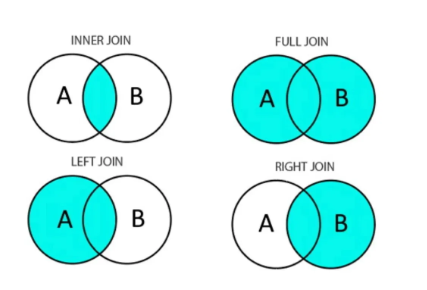

In [ ]:
# INNER JOIN

# pd.merge(df1, df2, on='Product_ID', how='inner')
#       mit dem onParameter die Spalte angeben, die in beiden DataFrames als
#         Schlüssel dient ("Product_ID"),
#       sowie mit dem howParameter den Typ des Joins festlegen ("inner").

products_df = pd.DataFrame({
    "Product_ID": [101, 102, 103, 104],
    "Product_Name": ["Laptop", "Tablet", "Smartphone", "Monitor"],
    "Price": [1200, 500, 800, 300]
})

# Kategorien und Lagerbestand
stock_df = pd.DataFrame({
    "Product_ID": [101, 102, 103, 105],
    "Category": ["Electronics", "Electronics", "Electronics", "Accessories"],
    "Stock": [50, 20, 100, 150]
})


# Ausgabe der DataFrames
print('Products:\n', products_df, '\n')
print('Stocks:\n', stock_df, '\n')

# INNER JOIN
df_inner = pd.merge(products_df, stock_df, on='Product_ID', how='inner')

# Ausgabe des Joins
# Nur die Product_IDs 101, 102 und 103, die in beiden Tabellen vorkommen,
#   tauchen in der zusammengeführten Tabelle auf.
print('Stocks:\n', df_inner, '\n')


Products:
    Product_ID Product_Name  Price
0         101       Laptop   1200
1         102       Tablet    500
2         103   Smartphone    800
3         104      Monitor    300 

Stocks:
    Product_ID     Category  Stock
0         101  Electronics     50
1         102  Electronics     20
2         103  Electronics    100
3         105  Accessories    150 

Stocks:
    Product_ID Product_Name  Price     Category  Stock
0         101       Laptop   1200  Electronics     50
1         102       Tablet    500  Electronics     20
2         103   Smartphone    800  Electronics    100 



In [ ]:
# LEFT JOIN

# wobei wir df1 als linken und df2 als rechten DataFrame übergeben,
#     mit dem onParameter die Spalte angeben, die in beiden DataFrames als
# Schlüssel dient ("Product_ID"),
# how Parameter den Typ des Joins festlegen ("left").

# Produktinformationen
products_df = pd.DataFrame({
    "Product_ID": [101, 102, 103, 104],
    "Product_Name": ["Laptop", "Tablet", "Smartphone", "Monitor"],
    "Price": [1200, 500, 800, 300]
})

# Kategorien und Lagerbestand
stock_df = pd.DataFrame({
    "Product_ID": [101, 102, 103],
    "Category": ["Electronics", "Electronics", "Accessories"],
    "Stock": [50, 20, 150]
})

# Ausgabe der DataFrames
print('Products:\n', products_df, '\n')
print('Stocks:\n', stock_df, '\n')

# LEFT JOIN
df_left = pd.merge(products_df, stock_df, on='Product_ID', how='left')

# Alle von Links, passende von rechts, sonst NaN
print('Stocks:\n', df_left, '\n')

Products:
    Product_ID Product_Name  Price
0         101       Laptop   1200
1         102       Tablet    500
2         103   Smartphone    800
3         104      Monitor    300 

Stocks:
    Product_ID     Category  Stock
0         101  Electronics     50
1         102  Electronics     20
2         103  Accessories    150 

Stocks:
    Product_ID Product_Name  Price     Category  Stock
0         101       Laptop   1200  Electronics   50.0
1         102       Tablet    500  Electronics   20.0
2         103   Smartphone    800  Accessories  150.0
3         104      Monitor    300          NaN    NaN 



In [ ]:
# RIGHT JOIN

# wobei wir df1 als linken und df2 als rechten DataFrame übergeben,
#     mit dem onParameter die Spalte angeben, die in beiden DataFrames als
# Schlüssel dient ("Product_ID"),
# how Parameter den Typ des Joins festlegen ("right").

# Produktinformationen
products_df = pd.DataFrame({
    "Product_ID": [101, 102, 103, 104],
    "Product_Name": ["Laptop", "Tablet", "Smartphone", "Monitor"],
    "Price": [1200, 500, 800, 300]
})

# Kategorien und Lagerbestand
stock_df = pd.DataFrame({
    "Product_ID": [101, 102, 105],
    "Category": ["Electronics", "Electronics", "Accessories"],
    "Stock": [50, 20, 150]
})

# Ausgabe der DataFrames
print('Products:\n', products_df, '\n')
print('Stocks:\n', stock_df, '\n')

# RIGHT JOIN
df_right = pd.merge(products_df, stock_df, on='Product_ID', how='right')

# Alle von Rechts, passende von links, sonst NaN
print('Stocks:\n', df_right, '\n')

Products:
    Product_ID Product_Name  Price
0         101       Laptop   1200
1         102       Tablet    500
2         103   Smartphone    800
3         104      Monitor    300 

Stocks:
    Product_ID     Category  Stock
0         101  Electronics     50
1         102  Electronics     20
2         105  Accessories    150 

Stocks:
    Product_ID Product_Name   Price     Category  Stock
0         101       Laptop  1200.0  Electronics     50
1         102       Tablet   500.0  Electronics     20
2         105          NaN     NaN  Accessories    150 



In [ ]:
# FULL OUTER JOIN

# wobei wir df1 als linken und df2 als rechten DataFrame übergeben,
# mit dem onParameter die Spalte angeben, die in beiden DataFrames als
#   Schlüssel dient ("Product_ID"),
# und mit dem howParameter den Typ des Joins festlegen ("outer").

# Produktinformationen
products_df = pd.DataFrame({
    "Product_ID": [101, 102, 103, 104],
    "Product_Name": ["Laptop", "Tablet", "Smartphone", "Monitor"],
    "Price": [1200, 500, 800, 300]
})

# Kategorien und Lagerbestand
stock_df = pd.DataFrame({
    "Product_ID": [101, 102, 105],
    "Category": ["Electronics", "Electronics", "Accessories"],
    "Stock": [50, 20, 150]
})

# Ausgabe der DataFrames
print('Products:\n', products_df, '\n')
print('Stocks:\n', stock_df, '\n')

# Outer  JOIN
df_outer = pd.merge(products_df, stock_df, on='Product_ID', how='outer')

# Alle Einträge aus beiden Tabellen
print('Stocks:\n', df_outer, '\n')

Products:
    Product_ID Product_Name  Price
0         101       Laptop   1200
1         102       Tablet    500
2         103   Smartphone    800
3         104      Monitor    300 

Stocks:
    Product_ID     Category  Stock
0         101  Electronics     50
1         102  Electronics     20
2         105  Accessories    150 

Stocks:
    Product_ID Product_Name   Price     Category  Stock
0         101       Laptop  1200.0  Electronics   50.0
1         102       Tablet   500.0  Electronics   20.0
2         103   Smartphone   800.0          NaN    NaN
3         104      Monitor   300.0          NaN    NaN
4         105          NaN     NaN  Accessories  150.0 



In [ ]:
# Create the first DataFrame (left)
data1 = {
    'ID': [1, 2, 3, 4, 5, 6, 7],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (right)
data2 = {
    'ID': [2, 3, 5, 6, 8, 9, 10],
    'Age': [25, 30, 22, 28, 35, 40, 45]
}
df2 = pd.DataFrame(data2)

# Perform a left join on the 'ID' column
# merged_df = ___.merge(___, ___, on=___, how=___) # replace the "___"
merged_df = pd.merge(df1, df2, on='ID', how='left')

print("Merged DataFrame with Left Join:")
print(merged_df)

Merged DataFrame with Left Join:
   ID     Name   Age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4    David   NaN
4   5      Eve  22.0
5   6    Frank  28.0
6   7    Grace   NaN


### Zusammenführung von DataFrames - Praxis

In [ ]:
# Übung 1

#   Du hast zwei DataFrames: df1 enthält Informationen über Mitarbeitende, df2
#   enthält Informationen über deren Abteilungen. Führe einen Inner Join über
#   die Spalte 'Employee_ID' aus, um beide DataFrames zu kombinieren – es
#   sollen nur die Mitarbeitenden berücksichtigt werden, die auch einer
#   Abteilung zugeordnet sind.

# Create the first DataFrame (employees)
data1 = {
    'Employee_ID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (departments)
data2 = {
    'Employee_ID': [101, 102, 106, 107],
    'Department': ['HR', 'Finance', 'IT', 'Sales']
}
df2 = pd.DataFrame(data2)

# Perform an inner join on 'Employee_ID'
# merged_df = df1.merge(___, on='____', how='___')  # Fill in the '___'
merged_df = df1.merge(df2, on='Employee_ID', how='inner')
print(merged_df)


   Employee_ID   Name Department
0          101  Alice         HR
1          102    Bob    Finance


In [ ]:
# Übung 2

#   Du hast zwei DataFrames: df1 enthält Produktdetails, df2 Verkaufsdaten.
#   Führe einen Inner Join durch, sodass nur Produkte angezeigt werden, zu
#   denen es auch Verkaufsdaten gibt.

# Create the first DataFrame (products)
data1 = {
    'Product_ID': [101, 102, 103, 104],
    'Product_Name': ['Laptop', 'Tablet', 'Smartphone', 'Monitor']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (sales)
data2 = {
    'Product_ID': [101, 102, 105],
    'Sales': [500, 300, 100]
}
df2 = pd.DataFrame(data2)

# Perform an inner join on 'Product_ID'
# merged_df = ___.merge(___, ___='Product_ID', ____='___')  # Fill in the '___'
merged_df = df1.merge(df2, on='Product_ID', how='inner')
print(merged_df)

   Product_ID Product_Name  Sales
0         101       Laptop    500
1         102       Tablet    300


In [ ]:
# Übung 3

#     Du hast zwei DataFrames: df1 enthält Informationen über Produkte, df2
#     Informationen über Rabatte. Führe einen Left Join durch, sodass alle
#     Produkte aus df1 enthalten bleiben – auch wenn kein passender Rabatt in
#     df2 vorhanden ist.

# Create the first DataFrame (products)
data1 = {
    'Product_ID': [101, 102, 103, 104],
    'Product_Name': ['Laptop', 'Tablet', 'Smartphone', 'Monitor']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (discounts)
data2 = {
    'Product_ID': [101, 102],
    'Discount': [10, 15]
}
df2 = pd.DataFrame(data2)

# Perform a left join on 'Product_ID'
# merged_df = df1._____(_____)  # Fill in the '___'
merged_df = df1.merge(df2, on='Product_ID', how='left')
print(merged_df)


   Product_ID Product_Name  Discount
0         101       Laptop      10.0
1         102       Tablet      15.0
2         103   Smartphone       NaN
3         104      Monitor       NaN


In [ ]:
# Übung 4

#     Du hast zwei DataFrames: df1 mit Mitarbeiterdetails, df2 mit
#     Abteilungsinformationen. Führe einen Right Join durch, sodass alle
#     Abteilungen aus df2 erhalten bleiben – auch wenn keine passenden
#     Mitarbeitenden in df1 vorhanden sind.

# Create the first DataFrame (employees)
data1 = {
    'Employee_ID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (departments)
data2 = {
    'Department_ID': [1, 2, 3],
    'Department': ['HR', 'Finance', 'Sales'],
    'Employee_ID': [101, 102, 105]
}
df2 = pd.DataFrame(data2)

# Perform a right join on 'Employee_ID'
#merged_df = ______  # Fill in the '___'

merged_df = pd.merge(df1,df2, on='Employee_ID', how='right')
print(merged_df)

   Employee_ID   Name  Department_ID Department
0          101  Alice              1         HR
1          102    Bob              2    Finance
2          105    NaN              3      Sales


In [ ]:
# Übung 5

#     Du hast zwei DataFrames: df1 mit Produktdetails, df2 mit
#     Lagerinformationen. Führe einen Right Join durch, um alle
#     Lagerinformationen aus df2 zu behalten – auch wenn es kein passendes
#     Produkt in df1 gibt.

# Create the first DataFrame (products)
data1 = {
    'Product_ID': [101, 102, 103],
    'Product_Name': ['Laptop', 'Tablet', 'Smartphone']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (stock)
data2 = {
    'Product_ID': [102, 103, 104],
    'Stock': [50, 100, 200]
}
df2 = pd.DataFrame(data2)

# Perform a right join on 'Product_ID'
#merged_df = ______  # Fill in the '___'

merged_df = pd.merge(df1,df2, on='Product_ID', how='right')
print(merged_df)


   Product_ID Product_Name  Stock
0         102       Tablet     50
1         103   Smartphone    100
2         104          NaN    200


In [ ]:
# Übung 6

#     Du hast zwei DataFrames: df1 mit Informationen über Mitarbeitende, df2
#     mit deren Anwesenheitsdaten. Führe einen Full Outer Join durch, um alle
#     Mitarbeitenden und Anwesenheitsdaten zusammenzuführen – fehlende Werte
#     sollen dabei mit NaN aufgefüllt werden.

# Create the first DataFrame (employees)
data1 = {
    'Employee_ID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (attendance)
data2 = {
    'Employee_ID': [102, 103, 105],
    'Attendance': ['Present', 'Absent', 'Present']
}
df2 = pd.DataFrame(data2)

# Perform an outer join on 'Employee_ID'
#merged_df = _______  # Fill in the '___'

merged_df = pd.merge(df1,df2, on='Employee_ID', how='outer')
print(merged_df)

   Employee_ID     Name Attendance
0          101    Alice        NaN
1          102      Bob    Present
2          103  Charlie     Absent
3          104    David        NaN
4          105      NaN    Present


In [ ]:
# Übung 7

#     Du hast zwei DataFrames: df1 mit Produktdetails, df2 mit Verkaufsdaten.
#     Führe einen Full Outer Join durch, sodass alle Informationen zu Produkten
#     und Verkäufen enthalten bleiben – auch wenn es auf einer Seite keine
#     passenden Daten gibt.


# Create the first DataFrame (products)
data1 = {
    'Product_ID': [101, 102, 103, 104],
    'Product_Name': ['Laptop', 'Tablet', 'Smartphone', 'Monitor']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (sales)
data2 = {
    'Product_ID': [101, 103, 105],
    'Sales': [500, 200, 150]
}
df2 = pd.DataFrame(data2)

# Perform an outer join on 'Product_ID'
# merged_df = ________  # Fill in the '___'
# print(_______)

merged_df = pd.merge(df1,df2, on='Product_ID', how='outer')
print(merged_df)

   Product_ID Product_Name  Sales
0         101       Laptop  500.0
1         102       Tablet    NaN
2         103   Smartphone  200.0
3         104      Monitor    NaN
4         105          NaN  150.0


## **Datenbewertung**

### Was ist eine Datenbewertung

Daten werden bewertet im Hinblick auf **Genauigkeit, Vollständigkeit, Konsistenz, Aktualität und Relevanz** im Hinblick auf das Analyseziel



| Name        | Age | Date Joined | Salary | Remarks                |
|-------------|-----|-------------|--------|------------------------|
| John Doe    | 28  | 01/15/2020  | 50000  | Good employee          |
| Jon Doe     | NaN | 02/20/2021  | 60000  | N/A                    |
| Jane Smith  | 32  | 04/25/2020  | 75000  | Excellent performance  |
| Jane Smith  | 32  | 04/25/2020  | 75000  | Excellent performance  |
| Jack Brown  | 45  | 03/10/2019  | 80000  |                        |
| Sam Wilson  | 30  | 06/15/2020  | 52000  | Needs improvement      |
| John Doe    | 28  | 01/15/2020  | 50000  | Good employee          |


**Lösung**
- **Namensvarianten:**
> Die Namen „John Doe“ und „Jon Doe“ sehen ähnlich aus, sind aber unterschiedlich geschrieben – möglicherweise Tippfehler oder inkonsistente Eingabe.

- **Fehlende Werte:**
> Beim Eintrag von „Jon Doe“ fehlt das Alter – ein klassischer Missing Value.

- **Doppelte Einträge:**
> „Jane Smith“ und „John Doe“ tauchen mit exakt denselben Informationen doppelt auf – das sind Duplikate.

- **Falsche Datentypen:**
> Man sieht es nicht direkt, aber der Gehaltswert von „Jon Doe“ ist als String („60000“) statt als numerischer Wert gespeichert.

- **Unklare Angaben:**
> Im Feld „Remarks“ (Anmerkungen) bei „Jack Brown“ steht nichts – das kann zu Missverständnissen führen, z. B. zur Leistungseinschätzung.




### DataFrame-Bewertung mit Python

Als Data Analyst oder Data Scientist arbeitet man mit größeren Datenmengen, bei denen man Fehler auf den ersten Blick nicht jmehr erkennen kann. Python bitet hier Werkzeuge zur Analyse.


| Index | Name       | Age | Date Joined | Salary          | Remarks             |
|------:|------------|----:|-------------|-----------------|---------------------|
| 0     | John Doe   | 28  | 01/15/2020  | 50000           | Good employee       |
| 1     | John Doe   | 32  | 02/20/2021  | 60000           | N/A                 |
| 2     | John Doe   | 45  | 03/10/2019  | 75000           | Excellent           |
| 3     | John Doe   | NaN | 01/01/2020  | 50000           | Good employee       |
| 4     | John Doe   | 28  | 05/25/2018  | Eighty Thousand | N/A                 |
| 5     | John Doe   | 32  | 06/15/2020  | 52000           | Needs improvement   |
| 6     | John Doe   | NaN | 07/01/2019  | 75000           |                     |
| 7     | John Doe   | 30  | 01/15/2020  | 60000           | N/A                 |
| 8     | John Doe   | 45  | 07/01/2019  | 75000           | None                |
| 9     | John Doe   | 50  | 06/15/2020  | 52000           | Good employee       |
| 10    | Jane Smith | 32  | 04/25/2020  | 75000           | Excellent           |
| 11    | Jane Smith | 33  | 04/25/2020  | 80000           | Excellent           |
| 12    | Jane Smith | NaN | 03/10/2019  | 80000           | Fair                |
| 13    | Jane Smith | 36  | 03/15/2020  | 52000           | New hire            |
| 14    | Jane Smith | 36  | 02/25/2020  | 50000           |                     |
| 15    | Jane Smith | 29  | 01/01/2020  | 60000           | Good employee       |
| 16    | Jane Smith | 28  | 06/15/2020  | 75000           | N/A                 |
| 17    | Jane Smith | NaN | 07/01/2019  | 100000          |                     |
| 18    | Jack Brown | 40  | 08/25/2020  | 85000           | Needs improvement   |
| 19    | Jack Brown | 41  | 09/10/2021  | 90000           | None                |
| 20    | Jack Brown | 42  | 10/02/2019  | 95000           | Promising           |
| 21    | Jack Brown | NaN | 11/11/2018  | 62000           |                     |
| 22    | Jack Brown | 55  | 12/12/2020  | 120000          | Good employee       |
| 23    | Sam Wilson | 58  | 01/15/2021  | 110000          | Needs improvement   |
| 24    | Sam Wilson | 60  | None        | 88000           | None                |
| 25    | Sam Wilson | 30  | 06/15/2020  | None            | Excellent           |
| 26    | Sam Wilson | NaN | 01/15/2021  | Sixty Thousand  |                     |
| 27    | None       | 45  | 07/01/2019  | 102000          | Fair                |
| 28    | None       | 50  | 06/15/2020  | None            |                     |
| 29    | None       | 50  | None        | 70000           | Promising           |


In [ ]:
# head()

# Die ersten Zeilen anzeigen

df_head = pd.DataFrame({
    "Name": ["John Doe", "John Doe", "John Doe", "John Doe", "John Doe"],
    "Age": [28.0, 32.0, 45.0, None, 28.0],
    "Date Joined": ["01/15/2020", "02/20/2021", "03/10/2019", "01/01/2020", "05/25/2018"],
    "Salary": ["50000", "60000", "75000", "50000", "Eighty Thousand"],
    "Remarks": ["Good employee", "N/A", "Excellent", "Good employee", "N/A"]
})

print('print only\n', df_head.head(), '\n')
print('print 2\n', df_head.head(2), '\n')
print('print 7\n', df_head.head(7), '\n')


print only
        Name   Age Date Joined           Salary        Remarks
0  John Doe  28.0  01/15/2020            50000  Good employee
1  John Doe  32.0  02/20/2021            60000            N/A
2  John Doe  45.0  03/10/2019            75000      Excellent
3  John Doe   NaN  01/01/2020            50000  Good employee
4  John Doe  28.0  05/25/2018  Eighty Thousand            N/A 

print 2
        Name   Age Date Joined Salary        Remarks
0  John Doe  28.0  01/15/2020  50000  Good employee
1  John Doe  32.0  02/20/2021  60000            N/A 

print 7
        Name   Age Date Joined           Salary        Remarks
0  John Doe  28.0  01/15/2020            50000  Good employee
1  John Doe  32.0  02/20/2021            60000            N/A
2  John Doe  45.0  03/10/2019            75000      Excellent
3  John Doe   NaN  01/01/2020            50000  Good employee
4  John Doe  28.0  05/25/2018  Eighty Thousand            N/A 



In [ ]:
# shape()

# Form (shape) des DataFrames prüfen

df_head = pd.DataFrame({
    "Name": ["John Doe", "John Doe", "John Doe", "John Doe", "John Doe"],
    "Age": [28.0, 32.0, 45.0, None, 28.0],
    "Date Joined": ["01/15/2020", "02/20/2021", "03/10/2019", "01/01/2020", "05/25/2018"],
    "Salary": ["50000", "60000", "75000", "50000", "Eighty Thousand"],
    "Remarks": ["Good employee", "N/A", "Excellent", "Good employee", "N/A"]
})

print('Shape', df_head.shape, '\n')

Shape (5, 5) 



In [ ]:
# dtypes

# Datentypen des DataFrames prüfen

df_head = pd.DataFrame({
    "Name": ["John Doe", "John Doe", "John Doe", "John Doe", "John Doe"],
    "Age": [28.0, 32.0, 45.0, None, 28.0],
    "Date Joined": ["01/15/2020", "02/20/2021", "03/10/2019", "01/01/2020", "05/25/2018"],
    "Salary": ["50000", "60000", "75000", "50000", "Eighty Thousand"],
    "Remarks": ["Good employee", "N/A", "Excellent", "Good employee", "N/A"]
})

print('Types\n', df_head.dtypes, '\n')

Types
 Name            object
Age            float64
Date Joined     object
Salary          object
Remarks         object
dtype: object 



In [ ]:
# isnull().sum()

# Fehlende Werte identifizieren (NaN)
# Damit werden keine N/A identifiziert; nur NaN oder None

df_head = pd.DataFrame({
    "Name": ["John Doe", "John Doe", "John Doe", "John Doe", "John Doe"],
    "Age": [28.0, 32.0, 45.0, None, 28.0],
    "Date Joined": ["01/15/2020", "02/20/2021", "03/10/2019", "01/01/2020", "05/25/2018"],
    "Salary": ["50000", "60000", "75000", "50000", "Eighty Thousand"],
    "Remarks": ["Good employee", "N/A", "Excellent", "Good employee", "N/A"]
})

print('Isnull Anzahl\n', df_head.isnull().sum(), '\n')

Isnull Anzahl
 Name           0
Age            1
Date Joined    0
Salary         0
Remarks        0
dtype: int64 



In [ ]:
# duplicated().sum()

# Duplikate identifizieren

df_head = pd.DataFrame({
    "Name": ["John Doe", "John Doe", "John Doe", "John Doe", "John Doe"],
    "Age": [28.0, 32.0, 45.0, None, 28.0],
    "Date Joined": ["01/15/2020", "02/20/2021", "03/10/2019", "01/01/2020", "05/25/2018"],
    "Salary": ["50000", "60000", "75000", "50000", "Eighty Thousand"],
    "Remarks": ["Good employee", "N/A", "Excellent", "Good employee", "N/A"]
})

print('Duplikate Anzahl\n', df_head.duplicated().sum(), '\n')

Duplikate Anzahl
 0 



In [ ]:
# unique()

# Einzigartige Werte prüfen

df_head = pd.DataFrame({
    "Name": ["John Doe", "John Doe", "John Doe", "John Doe", "John Doe"],
    "Age": [28.0, 32.0, 45.0, None, 28.0],
    "Date Joined": ["01/15/2020", "02/20/2021", "03/10/2019", "01/01/2020", "05/25/2018"],
    "Salary": ["50000", "60000", "75000", "50000", "Eighty Thousand"],
    "Remarks": ["Good employee", "N/A", "Excellent", "Good employee", "N/A"]
})

print('Einzigartige Werte Salary\n', df_head['Salary'].unique(), '\n')

Einzigartige Werte Salary
 ['50000' '60000' '75000' 'Eighty Thousand'] 



### DataFrame Bewertung - Übung


>
> Dir stehen zwei Datensätze aus **scikit-learn** zur Verfügung: **Iris** und **Diabetes**.  
> Führe die folgenden Techniken zur Datenbewertung **für jeden Datensatz** durch:  
>
> 1. **Erste Zeilen ansehen**  
>    - Zeige die ersten paar Zeilen jedes DataFrames (`.head()`), um einen Überblick zu bekommen.  
>
> 2. **Form (Shape) überprüfen**  
>    - Gib die Anzahl der **Zeilen und Spalten** aus (`.shape`).  
>
> 3. **Datentypen prüfen**  
>    - Überprüfe die Datentypen jeder Spalte (`.dtypes`).  
>
> 4. **Fehlende Werte analysieren**  
>    - Prüfe, ob fehlende Werte vorhanden sind (`.isnull().sum()`).  
>
> 5. **Duplikate erkennen**  
>    - Überprüfe, ob doppelte Zeilen im DataFrame vorkommen (`.duplicated().sum()`).  
>
> 6. **Eindeutige Werte analysieren**  
>    - Analysiere die eindeutigen Werte in einer ausgewählten Spalte  
>      (z. B. **Zielspalte** oder eine beliebige Merkmals-Spalte, mit `.unique()` oder `.value_counts()`).  
>
> ---
>
> ### Hinweis:  
> - Die **Iris-Daten** enthalten eine Zielspalte mit den Klassennamen (z. B. `setosa`, `versicolor`, `virginica`).  
> - Die **Diabetes-Daten** enthalten numerische Merkmale und eine Zielvariable für Regressionsaufgaben.  




In [ ]:
# Bewertung Iris-Datensatz

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# 1. Check the first few rows
print(df_iris.head())  # Replace "___"

# 2. Check the shape of the DataFrame
print('\nShape of the Iris dataset:')
print(df_iris.shape)  # Replace "___"

# 3. Check the data types of each column
print('\nData types of each column in Iris:')
print(df_iris.dtypes)  # Replace "___"

# 4. Check the number of missing values in the Iris dataset
print('\nMissing values in the Iris dataset:')
print(df_iris.isnull().sum())  # Replace "___"

# 5. Check how many duplicated rows are in the Iris dataset
print('\nDuplicated rows in the Iris dataset:')
print(df_iris.duplicated().sum())  # Replace "___"

# 6. Check unique values in the target column
print('\nUnique values in the target column:')
print(df_iris['target'].unique())  # Replace "___"


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Shape of the Iris dataset:
(150, 5)

Data types of each column in Iris:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

Missing values in the Iris dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Duplicated rows in the Iris dataset:
1

Unique values i

In [ ]:
# Bewertung Diabetes-Datensatz

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

print(df_diabetes.head())  # Replace "___"

print('\nShape of the Diabetes dataset:')
print(df_diabetes.shape)  # Replace "___"

print('\nData types of each column in Diabetes:')
print(df_diabetes.dtypes)  # Replace "___"

print('\nMissing values in the Diabetes dataset:')
print(df_diabetes.isnull().sum())  # Replace "___"

print('\nDuplicated rows in the Diabetes dataset:')
print(df_diabetes.duplicated().sum())  # Replace "___"

print('\nUnique values in the target column:')
print(df_diabetes['target'].unique())  # Replace "___"


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Shape of the Diabetes dataset:
(442, 11)

Data types of each column in Diabetes:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Mi

## **Datenbereinigung**

### Was heisst Datenbereinigung?

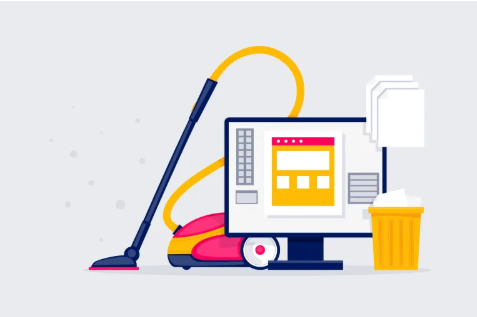



> Sobald du deine Daten beurteilt hast, ist es Zeit, sie zu bereinigen. Datenbereinigung ist der Prozess, bei dem Rohdaten für die Analyse vorbereitet werden – durch das Korrigieren von Fehlern, Inkonsistenzen und Ungenauigkeiten. Dieser Schritt stellt sicher, dass deine Daten präzise, vollständig und verlässlich sind – eine grundlegende Voraussetzung, um aussagekräftige Erkenntnisse zu gewinnen und fundierte Entscheidungen zu treffen.



### Umgang mit fehlenden Werten


🏹 **Auswirkung auf die Analysegenauigkeit**  
> Fehlende Werte können zu verzerrten oder ungenauen Analysen führen.  
> Wenn ein signifikanter Teil der Daten fehlt, können statistische Kennzahlen  
> (wie Mittelwerte oder Varianzen) und Vorhersagemodelle unzuverlässige Ergebnisse liefern.  

🤷‍♀️ **Erschwerte Dateninterpretation**  
> Fehlende Werte können Muster oder Trends in den Daten verschleiern  
> und es erschweren, sinnvolle Erkenntnisse zu gewinnen.  
> Beispielsweise kann eine hohe Anzahl fehlender Antworten in einer Umfrage  
> auf ein Problem mit der Frage selbst hinweisen.  

🤦‍♂️ **Folgen für Entscheidungen**  
> Unvollständige Daten können zu fehlerhaften Entscheidungen führen – besonders in sensiblen Bereichen wie Gesundheitswesen,  
> Finanzen oder Logistik, wo präzise Daten für fundierte Entscheidungen entscheidend sind.  

🛠 **Geringere Nutzbarkeit des Datensatzes**  
> Datensätze mit vielen fehlenden Werten müssen unter Umständen stark bereinigt werden,  
> was zur Entfernung ganzer Zeilen oder Spalten führt – und damit den Umfang  
> und die Aussagekraft der Analyse einschränkt.  

In [ ]:
# Löschen (Zeilenlöschung)
# dropna()
# axis=0 -> Zeilen entfernen

df = pd.DataFrame({
    "A": [1, 2, np.nan, 4],
    "B": [np.nan, 2.0, 3.0, 4.0],
    "C": [1.0, np.nan, np.nan, 4.0],
    "D": [1, 2, 3, 4]
})

print('DataFrame before delete:', df, '\n')

df = df.dropna(axis=0)

print('DataFrame after delete:', df, '\n')

DataFrame before delete:      A    B    C  D
0  1.0  NaN  1.0  1
1  2.0  2.0  NaN  2
2  NaN  3.0  NaN  3
3  4.0  4.0  4.0  4 

DataFrame after delete:      A    B    C  D
3  4.0  4.0  4.0  4 



In [ ]:
# Löschen (Spaltenlöschung)
# dropna()
# axis=1 -> Spalten entfernen

df = pd.DataFrame({
    "A": [1, 2, np.nan, 4],
    "B": [np.nan, 2.0, 3.0, 4.0],
    "C": [1.0, np.nan, np.nan, 4.0],
    "D": [1, 2, 3, 4]
})

print('DataFrame before delete:', df, '\n')

df = df.dropna(axis=1)

print('DataFrame after delete:', df, '\n')

DataFrame before delete:      A    B    C  D
0  1.0  NaN  1.0  1
1  2.0  2.0  NaN  2
2  NaN  3.0  NaN  3
3  4.0  4.0  4.0  4 

DataFrame after delete:    D
0  1
1  2
2  3
3  4 



In [ ]:
# Imputation (Wertschätzung) (Mittelwert)
# fillna()
# df['A'].mean() -> Zeilen entfernen

df = pd.DataFrame({
    "A": [1.0, 2.0, np.nan, 4.0, 5.0],
    "B": [5, 6, 7, 8, 9]
})

print('DataFrame before mean:', df, '\n')

df['A'] = df['A'].fillna(df['A'].mean())

print('DataFrame after mean:', df, '\n')

DataFrame before mean:      A  B
0  1.0  5
1  2.0  6
2  NaN  7
3  4.0  8
4  5.0  9 

DataFrame after mean:      A  B
0  1.0  5
1  2.0  6
2  3.0  7
3  4.0  8
4  5.0  9 



In [ ]:
# Imputation (Wertschätzung) (Modus)
# mode()[0]
# fillna()
# df['Category'].mode() -> meister Wert

df = pd.DataFrame({
    "Category": ["A", "B", "A", np.nan, "B", "A", np.nan],
    "Value": [10, 20, 10, 30, 20, 10, 40]
})

print('DataFrame before modus:\n', df, '\n')

mode_category = df['Category'].mode()[0]
print('Mode Category:\n', mode_category, '\n')

df['Category'] = df['Category'].fillna(mode_category)

print('DataFrame after modus:\n', df, '\n')

DataFrame before modus:
   Category  Value
0        A     10
1        B     20
2        A     10
3      NaN     30
4        B     20
5        A     10
6      NaN     40 

Mode Category:
 A 

DataFrame after modus:
   Category  Value
0        A     10
1        B     20
2        A     10
3        A     30
4        B     20
5        A     10
6        A     40 



**Löschen oder Imputation – wie entscheiden?**

Es ist sehr wichtig, jede Situation genau zu analysieren und zu entscheiden, ob es besser ist, fehlende Werte zu löschen oder zu imputieren. Dabei solltest du folgende Aspekte berücksichtigen:

👉 **Ausmaß der fehlenden Werte**  
> Wenn nur wenige Datenpunkte fehlen, kannst du sie löschen.  
> Bei vielen fehlenden Werten ist Imputation meist die bessere Wahl.  

👉 **Bedeutung der Variablen**  
> Wenn eine betroffene Variable wichtig für die Analyse ist, solltest du lieber imputieren,  
> um keine entscheidenden Informationen zu verlieren.  

👉 **Art der Daten**  
> Überlege, ob die Daten kategorial oder kontinuierlich sind – davon hängt die passende Imputationsmethode ab.  

👉 **Anforderungen der Analyse**  
> Für Machine Learning ist Imputation oft notwendig,  
> da viele Algorithmen nicht mit fehlenden Werten umgehen können.  


### Umgang mit fehlenden Werten - Übung

In [ ]:
# Übung 1

# Du hast einen Datensatz mit fehlenden numerischen Werten in den Spalten Age
# und Salary. Wende eine Mittelwert-Imputation an, um diese fehlenden Werte zu
# ersetzen. Ersetze die fehlenden Werte in der Spalte Age durch den Mittelwert
# der Spalte Age und die fehlenden Werte in der Spalte Salary durch den
# Mittelwert der Spalte Salary.


# Sample dataset
data = {
    'Age': [25, np.nan, 35, 45, np.nan, 50],
    'Salary': [50000, 60000, np.nan, 80000, 90000, np.nan]
}

df = pd.DataFrame(data)

# Fill missing numeric values with the mean of the column
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Replace missing Age values with ___
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())  # Replace missing Salary values with ___

print(df)

     Age   Salary
0  25.00  50000.0
1  38.75  60000.0
2  35.00  70000.0
3  45.00  80000.0
4  38.75  90000.0
5  50.00  70000.0


In [ ]:
# Übung 2

# Du hast einen Datensatz mit fehlenden kategorialen Werten in der Spalte City.
# Wende eine Modus-Imputation an, um diese fehlenden Werte durch den am
# häufigsten vorkommenden Wert (Modus) in der Spalte City zu ersetzen.

# Sample dataset
data = {
    'City': ['New York', 'Los Angeles', 'New York', np.nan, 'San Francisco', 'Chicago']
}

df = pd.DataFrame(data)

# Fill missing categorical values with the mode of the column
df['City'] = df['City'].fillna(df['City'].mode()[0])  # Replace missing City values with ___

print(df)


            City
0       New York
1    Los Angeles
2       New York
3       New York
4  San Francisco
5        Chicago


In [ ]:
# Übung 3

# Du hast einen Datensatz mit einigen Zeilen, die fehlende Werte enthalten.
# Verwende das Löschen von Zeilen, um alle Zeilen zu entfernen, die mindestens
# einen fehlenden Wert enthalten. Wende die Methode dropna() an, um Zeilen mit
# Null-Werten zu entfernen.

# Sample dataset with missing values
data = {
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [1, np.nan, 3, 4]
}

df = pd.DataFrame(data)

# Drop rows with missing values
df = df.dropna(axis=0)  # Remove rows with ___ missing values

print(df)


     A    B    C
3  4.0  4.0  4.0


In [ ]:
# Übung 4

# Du hast einen Datensatz mit einigen Spalten, die fehlende Werte enthalten.
# Verwende das Löschen von Spalten, um alle Spalten zu entfernen, die
# mindestens einen fehlenden Wert enthalten. Wende die Methode dropna() mit dem
# Parameter axis=1 an, um Spalten mit Null-Werten zu löschen.

# Sample dataset with missing values
data = {
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [1, np.nan, 3, 4],
    'D': [1, 2, 3, 4]
}

df = pd.DataFrame(data)

# Drop columns with missing values
df = df.dropna(axis=1)  # Remove columns with ___ missing values

print(df)



   D
0  1
1  2
2  3
3  4


### Umgang mit Duplikaten

In [ ]:
# drop_duplicates()

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Alice", "Charlie", "Bob"],
    "Age": [25, 30, 25, 35, 30],
    "City": ["New York", "Los Angeles", "New York", "Chicago", "Los Angeles"]
})

print('DataFrame before delete:', df, '\n')

df = df.drop_duplicates()

print('DataFrame after delete:', df, '\n')

DataFrame before delete:       Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2    Alice   25     New York
3  Charlie   35      Chicago
4      Bob   30  Los Angeles 

DataFrame after delete:       Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
3  Charlie   35      Chicago 



In [ ]:
# drop_duplicates with subset
# subset -> herangezogene Spalten

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Alice", "Charlie", "Bob", "Alice"],
    "Age": [25, 30, 25, 35, 30, 25],
    "City": ["New York", "Los Angeles", "New York", "Chicago", "Los Angeles", "Chicago"],
    "Country": ["USA", "USA", "USA", "USA", "USA", "Canada"]
})


print('DataFrame before delete:', df, '\n')

df = df.drop_duplicates(subset=['Name', 'Country'])

print('DataFrame after delete:', df, '\n')

DataFrame before delete:       Name  Age         City Country
0    Alice   25     New York     USA
1      Bob   30  Los Angeles     USA
2    Alice   25     New York     USA
3  Charlie   35      Chicago     USA
4      Bob   30  Los Angeles     USA
5    Alice   25      Chicago  Canada 

DataFrame after delete:       Name  Age         City Country
0    Alice   25     New York     USA
1      Bob   30  Los Angeles     USA
3  Charlie   35      Chicago     USA
5    Alice   25      Chicago  Canada 



In [ ]:
# Coding Challenge

# etzt bist du dran! Entferne doppelte Zeilen basierend auf den Spalten “Name”
# und “City”. Ersetze das “___”. Viel Erfolg!


data = {
    'Name': ['Alice', 'Alice', 'Alice', 'Alice', 'Bob', 'Charlie', 'David'],
    'Age': [30, 31, 32, 33, 25, 40, 35],
    'City': ['New York', 'New York', 'New York', 'New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Salary': [70000, 72000, 71000, 73000, 80000, 120000, 90000]
}

df = pd.DataFrame(data)

# Drop duplicates based on 'Name' and 'City'

df_dropped_duplicates = df.drop_duplicates(subset=['Name', 'City'])  # Replace the "___"

print("\nDataFrame after dropping duplicates based on 'Name' and 'City':")
print(df_dropped_duplicates)


DataFrame after dropping duplicates based on 'Name' and 'City':
      Name  Age         City  Salary
0    Alice   30     New York   70000
4      Bob   25  Los Angeles   80000
5  Charlie   40      Chicago  120000
6    David   35      Houston   90000


### Umgang mit Duplikaten - Übung

In [ ]:
# Übung 1

# Du hast einen Datensatz mit einigen doppelten Zeilen. Verwende die Methode
# drop_duplicates(), um alle doppelten Zeilen zu entfernen und nur eindeutige
# Einträge im DataFrame zu behalten.

data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob'],
    'Age': [25, 30, 25, 35, 30],
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles']
}

df = pd.DataFrame(data)

print('DataFrame before delete:', df, '\n')

df = df.drop_duplicates()

print('DataFrame after delete:', df, '\n')

DataFrame before delete:       Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2    Alice   25     New York
3  Charlie   35      Chicago
4      Bob   30  Los Angeles 

DataFrame after delete:       Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
3  Charlie   35      Chicago 



In [ ]:
# Übung 2

# Du möchtest Duplikate basierend auf den Spalten Name und City entfernen.
# Verwende dafür die Methode drop_duplicates() mit dem Parameter subset, um
# Zeilen zu löschen, die denselben Name und dieselbe City haben.

data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob'],
    'Age': [25, 30, 25, 35, 30],
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles'],
    'Salary': [70000, 80000, 71000, 120000, 80000]
}

df = pd.DataFrame(data)

print('DataFrame before delete:', df, '\n')

df = df.drop_duplicates(subset=['Name', 'City'])

print('DataFrame after delete:', df, '\n')

DataFrame before delete:       Name  Age         City  Salary
0    Alice   25     New York   70000
1      Bob   30  Los Angeles   80000
2    Alice   25     New York   71000
3  Charlie   35      Chicago  120000
4      Bob   30  Los Angeles   80000 

DataFrame after delete:       Name  Age         City  Salary
0    Alice   25     New York   70000
1      Bob   30  Los Angeles   80000
3  Charlie   35      Chicago  120000 



### Konvertierung von Datentypen

In [ ]:
# Datentypumwandlung mit Python
# astype()

df = pd.DataFrame({
    "Values": [10, 20, 30, 40]
})

# mit object oder string würde das nicht gehen
average = df['Values'].mean()
print('Average:', average, '\n')

# Typ rausfinden (hier int)
print('Datentyp vorher:\n', df.dtypes, '\n')

# Umwandlung
df['Values'] = df['Values'].astype(float)
# Typ rausfinden (jetzt float)
print('Datentyp nachher:\n', df.dtypes, '\n')

Average: 25.0 

Datentyp vorher:
 Values    int64
dtype: object 

Datentyp nachher:
 Values    float64
dtype: object 



In [ ]:
# Coding Challenge

# Angenommen, wir möchten das Durchschnittsgewicht, die Durchschnittsgröße und
# -geschwindigkeit der Mitglieder des folgenden DataFrames berechnen.

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Weight': ['55.5', '70.2', '66.3', '80.4'],
    'Height': [1.65, 1.75, 1.80, 1.70],
    'Speed': [10.5, 12.0, 11.3, 9.8]
}

df = pd.DataFrame(data)

df['Weight'] = df['Weight'].astype(float) # replace the "___"
print(df['Speed'].mean()) # replace the "___"
print(df['Weight'].mean()) # replace the "___"
print(df['Height'].mean()) # replace the "___"

10.899999999999999
68.1
1.725


### Konvertierung von Datentypen - Übung

In [ ]:
# Übung 1 - astype

# Du hast einen Datensatz, in dem eine numerische Spalte als String gespeichert
# ist. Verwende die Methode astype(), um diese Spalte in den passenden
# numerischen Typ (float) umzuwandeln, und berechne anschließend den Mittelwert # dieser Spalte.

data = {
    'Values': ['10', '20', '30', '40']
}

df = pd.DataFrame(data)

df['Values'] = df['Values'].astype(float)
average = df['Values'].mean()

print('Ausgabe:\n', average, '\n')

Ausgabe:
 25.0 



In [ ]:
# Übung 2 - astype

# Du hast einen Datensatz, in dem die Spalte Weight als String gespeichert ist.
# Wandle diese Spalte mit der Methode astype() in float um und berechne
# anschließend den Mittelwert der Spalten Weight, Height und Speed.

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Weight': ['55.5', '70.2', '66.3', '80.4'],
    'Height': [1.65, 1.75, 1.80, 1.70],
    'Speed': [10.5, 12.0, 11.3, 9.8]
}

df = pd.DataFrame(data)

df['Weight'] = df['Weight'].astype(float)


print('Datentyp nachher:\n', df['Weight'].mean(), '\n')
print('Datentyp nachher:\n', df['Height'].mean(), '\n')
print('Datentyp nachher:\n', df['Speed'].mean(), '\n')

Datentyp nachher:
 68.1 

Datentyp nachher:
 1.725 

Datentyp nachher:
 10.899999999999999 



In [ ]:
# Übung 3 - pd.to_Datetime

# Du hast einen Datensatz mit einer Spalte, die Datumsangaben als Strings
# enthält. Wandle diese Spalte mit pd.to_datetime() in das Format datetime um
# und berechne anschließend die Differenz zwischen zwei Datumswerten.

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'DateOfBirth': ['1990-01-01', '1985-05-15', '2000-07-20']
}

df = pd.DataFrame(data)

df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])
date_diff = pd.Timestamp.today() - df['DateOfBirth']

print('Difference:\n', date_diff, '\n')

Difference:
 0   13080 days 13:10:10.429138
1   14772 days 13:10:10.429138
2    9227 days 13:10:10.429138
Name: DateOfBirth, dtype: timedelta64[ns] 



### Strings bereinigen

In [ ]:
# Groß- und Kleinschreibung korrigieren

df = pd.DataFrame({
    "Names": ["john doe", "Jane Smith", "james BOND", "Max Power", "Sarah O'Connor"],
    "Comments": ["Great job!", "good work", "excellent job", "Nice teamwork", "poor performance"],
    "Salary": ["$50000", "60000", "$70000.50", "80000", "$90000"]
})

print('Vorher:\n', df, '\n')

df['Names'] = df['Names'].str.title()

print('Nachher:\n', df, '\n')


Vorher:
             Names          Comments     Salary
0        john doe        Great job!     $50000
1      Jane Smith         good work      60000
2      james BOND     excellent job  $70000.50
3       Max Power     Nice teamwork      80000
4  Sarah O'Connor  poor performance     $90000 

Nachher:
             Names          Comments     Salary
0        John Doe        Great job!     $50000
1      Jane Smith         good work      60000
2      James Bond     excellent job  $70000.50
3       Max Power     Nice teamwork      80000
4  Sarah O'Connor  poor performance     $90000 



In [ ]:
# Leerzeichen entfernen

print('Vorher:\n', df['Names'].to_list(), '\n')
df['Names'] = df['Names'].str.strip()
print('Nachher:\n', df['Names'].to_list(), '\n')

Vorher:
 ['John Doe', 'Jane Smith', 'James Bond', 'Max Power', "Sarah O'Connor"] 

Nachher:
 ['John Doe', 'Jane Smith', 'James Bond', 'Max Power', "Sarah O'Connor"] 



In [ ]:
# Spaltenwerte aufteilen
# split()
#     Das erste Argument gibt das Trennzeichen an, nach dem aufgeteilt werden
#           soll (in diesem Fall ein Leerzeichen " ").
#     Der Parameter n begrenzt die Anzahl der Aufteilungen (hier auf 1 gesetzt).
#     Der Parameter expand ist auf True gesetzt, wodurch das Ergebnis als
#         DataFrame zurückgegeben wird.

# In der Spalte Names sind Vor- und Nachnamen, die wir in eigenen
# Spalten haben wollen

print('Vorher:\n', df, '\n')

df[['First_Name', 'Last_Name']] = df['Names'].str.split(' ',n=1, expand=True)

print('Vor drop:\n', df, '\n')

df = df.drop(columns=['Names'])

print('Nach drop:\n', df, '\n')

Vorher:
             Names          Comments     Salary
0        John Doe        Great job!     $50000
1      Jane Smith         good work      60000
2      James Bond     excellent job  $70000.50
3       Max Power     Nice teamwork      80000
4  Sarah O'Connor  poor performance     $90000 

Vor drop:
             Names          Comments     Salary First_Name Last_Name
0        John Doe        Great job!     $50000       John       Doe
1      Jane Smith         good work      60000       Jane     Smith
2      James Bond     excellent job  $70000.50      James      Bond
3       Max Power     Nice teamwork      80000        Max     Power
4  Sarah O'Connor  poor performance     $90000      Sarah  O'Connor 

Nach drop:
            Comments     Salary First_Name Last_Name
0        Great job!     $50000       John       Doe
1         good work      60000       Jane     Smith
2     excellent job  $70000.50      James      Bond
3     Nice teamwork      80000        Max     Power
4  poor perfor

In [ ]:
# Strings zusammenfügen

print('Vorher:\n', df, '\n')

df['First_Last'] = df['First_Name'] + ' ' + df['Last_Name']

print('Vor drop:\n', df, '\n')

Vorher:
            Comments     Salary First_Name Last_Name
0        Great job!     $50000       John       Doe
1         good work      60000       Jane     Smith
2     excellent job  $70000.50      James      Bond
3     Nice teamwork      80000        Max     Power
4  poor performance     $90000      Sarah  O'Connor 

Vor drop:
            Comments     Salary First_Name Last_Name      First_Last
0        Great job!     $50000       John       Doe        John Doe
1         good work      60000       Jane     Smith      Jane Smith
2     excellent job  $70000.50      James      Bond      James Bond
3     Nice teamwork      80000        Max     Power       Max Power
4  poor performance     $90000      Sarah  O'Connor  Sarah O'Connor 



In [ ]:
# Strings schneiden

print('Vorher:\n', df, '\n')

df['Last_N'] = df['Last_Name'].str[:3]

print('Vor drop:\n', df, '\n')

Vorher:
            Comments     Salary First_Name Last_Name      First_Last
0        Great job!     $50000       John       Doe        John Doe
1         good work      60000       Jane     Smith      Jane Smith
2     excellent job  $70000.50      James      Bond      James Bond
3     Nice teamwork      80000        Max     Power       Max Power
4  poor performance     $90000      Sarah  O'Connor  Sarah O'Connor 

Vor drop:
            Comments     Salary First_Name Last_Name      First_Last Last_N
0        Great job!     $50000       John       Doe        John Doe    Doe
1         good work      60000       Jane     Smith      Jane Smith    Smi
2     excellent job  $70000.50      James      Bond      James Bond    Bon
3     Nice teamwork      80000        Max     Power       Max Power    Pow
4  poor performance     $90000      Sarah  O'Connor  Sarah O'Connor    O'C 



In [ ]:
# Zeichen ersetzen
# replace()

print('Vorher:\n', df, '\n')

df['Salary'] = df['Salary'].replace({'\\$': '', ' ': ''}, regex=True)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

print('Nach replace:\n', df, '\n')

Vorher:
            Comments     Salary First_Name Last_Name      First_Last Last_N
0        Great job!     $50000       John       Doe        John Doe    Doe
1         good work      60000       Jane     Smith      Jane Smith    Smi
2     excellent job  $70000.50      James      Bond      James Bond    Bon
3     Nice teamwork      80000        Max     Power       Max Power    Pow
4  poor performance     $90000      Sarah  O'Connor  Sarah O'Connor    O'C 

Nach replace:
            Comments   Salary First_Name Last_Name      First_Last Last_N
0        Great job!  50000.0       John       Doe        John Doe    Doe
1         good work  60000.0       Jane     Smith      Jane Smith    Smi
2     excellent job  70000.5      James      Bond      James Bond    Bon
3     Nice teamwork  80000.0        Max     Power       Max Power    Pow
4  poor performance  90000.0      Sarah  O'Connor  Sarah O'Connor    O'C 



In [ ]:
# Es fehlt noch: Groß- und Kleinschreibung Comments

print('Vorher:\n', df, '\n')

df['Comments'] = df['Comments'].str.title()

print('Nachher:\n', df, '\n')

Vorher:
            Comments   Salary First_Name Last_Name      First_Last Last_N
0        Great job!  50000.0       John       Doe        John Doe    Doe
1         good work  60000.0       Jane     Smith      Jane Smith    Smi
2     excellent job  70000.5      James      Bond      James Bond    Bon
3     Nice teamwork  80000.0        Max     Power       Max Power    Pow
4  poor performance  90000.0      Sarah  O'Connor  Sarah O'Connor    O'C 

Nachher:
            Comments   Salary First_Name Last_Name      First_Last Last_N
0        Great Job!  50000.0       John       Doe        John Doe    Doe
1         Good Work  60000.0       Jane     Smith      Jane Smith    Smi
2     Excellent Job  70000.5      James      Bond      James Bond    Bon
3     Nice Teamwork  80000.0        Max     Power       Max Power    Pow
4  Poor Performance  90000.0      Sarah  O'Connor  Sarah O'Connor    O'C 



In [ ]:
# Coding Challenge

# Jetzt bist du dran, die Daten zu bereinigen. Ersetze das „___“, um deinen
# DataFrame sauber zu bekommen!

data = {'Product': ['   Apple    ', 'banana', '  ORANGE  ', 'kiwifruit '
        , 'grapes'], 'Sales': ['100$', ' 200$ ', '  150$ ', '120$  ',
        '  90$ '], 'Place': ['North America - USA',
        'South America - Brazil', 'Europe - France', 'Asia - Japan',
        'Australia - Australia']}

sales_df = pd.DataFrame(data)

# Correct product capitalization

sales_df['Product'] = sales_df['Product'].str.capitalize() # Replace the "___"

# Stripp the whitespaces of all the columns

sales_df['Product'] = sales_df['Product'].str.strip() # Replace the "___"
sales_df['Sales'] = sales_df['Sales'].str.strip() # Replace the "___"
sales_df['Place'] = sales_df['Place'].str.strip() # Replace the "___"

# Splitting 'Place' into new columns: 'Region' and 'Country'

sales_df[['Region', 'Country']] = sales_df['Place'].str.split(' - ',n=1,
        expand=True) # Replace the "___"

# Replacing characters (e.g., replacing "$" with " ")

sales_df['Sales'] = sales_df['Sales'].str.replace('$', '')

print('\nSales DataFrame after String Cleaning Operations:')
print(sales_df)


Sales DataFrame after String Cleaning Operations:
     Product Sales                   Place         Region    Country
0      apple   100     North America - USA  North America        USA
1     Banana   200  South America - Brazil  South America     Brazil
2     orange   150         Europe - France         Europe     France
3  Kiwifruit   120            Asia - Japan           Asia      Japan
4     Grapes    90   Australia - Australia      Australia  Australia


### Strings bereinigen - Übung

In [ ]:
# Übung 1

# Du hast einen Datensatz mit Namen in der Spalte Names und möchtest
# überprüfen, ob doppelte Namen vorhanden sind. Danach soll eine Funktion
# angewendet werden, um die Großschreibung zu vereinheitlichen (d. h. erster
# Buchstabe jedes Namens groß).

data = {
    'Names': ['john doe', 'Jane Smith', 'james BOND', 'john doe', 'Max Power'],
    'Comments': ['Great job!', 'good work', 'excellent job', 'Nice teamwork', 'poor performance'],
    'Salary': ['$50000', '60000', '$70000.50', '80000', '$90000']
}

df = pd.DataFrame(data)

# Check for unique values in the 'Names' column
print(df['Names'].unique())  # Use the "___" function to get unique names

# Correct capitalization in the 'Names' column
df['Names'] = df['Names'].str.title()  # Use the "___" method to correct capitalization

print(df['Names'].to_list())


['john doe' 'Jane Smith' 'james BOND' 'Max Power']
['John Doe', 'Jane Smith', 'James Bond', 'John Doe', 'Max Power']


In [ ]:
# Übung 2

# Du hast einen Datensatz, in dem die Spalte Names führende oder nachgestellte
# Leerzeichen enthält. Außerdem möchtest du prüfen, ob bestimmte unerwünschte
# Zeichen (z. B. ein Unterstrich "_") in den Namen vorkommen. Bereinige die
# Daten.

data = {
    'Names': ['  john doe', '  Jane_Smith', 'james BOND   ', '   Max Power   ', 'Sarah O\'Connor'],
    'Comments': ['Great job!', 'good work', 'excellent job', 'Nice teamwork', 'poor performance'],
    'Salary': ['$50000', '60000', '$70000.50', '80000', '$90000']
}

df = pd.DataFrame(data)

# Strip leading and trailing whitespaces from 'Names' column
df['Names'] = df['Names'].str.strip()  # Use the "___" method to strip whitespaces

# Check if any names contain an underscore
contains_underscore = df['Names'].str.contains('_').any()  # Replace "___" with the correct method to check for underscores
print(f"Do any names contain an underscore? {contains_underscore}")

print(df['Names'].to_list())



Do any names contain an underscore? True
['john doe', 'Jane_Smith', 'james BOND', 'Max Power', "Sarah O'Connor"]


In [ ]:
# Übung 3

# Die Spalte Names enthält sowohl Vor- als auch Nachnamen in einem einzigen
# String. Teile die Spalte Names in First_Name und Last_Name auf. Entferne
# anschließend die ursprüngliche Names-Spalte.

data = {
    'Names': ['john doe', 'Jane Smith', 'james BOND', 'Max Power', 'Sarah O\'Connor'],
    'Comments': ['Great job!', 'good work', 'excellent job', 'Nice teamwork', 'poor performance'],
    'Salary': ['$50000', '60000', '$70000.50', '80000', '$90000']
}

df = pd.DataFrame(data)

# Split the 'Names' column into 'First_Name' and 'Last_Name'
df[['First_Name', 'Last_Name']] = df['Names'].str.split(' ', n=1, expand=True)  # Use the "___" function to split by space
df = df.drop(columns=['Names'])

print(df)


           Comments     Salary First_Name Last_Name
0        Great job!     $50000       john       doe
1         good work      60000       Jane     Smith
2     excellent job  $70000.50      james      BOND
3     Nice teamwork      80000        Max     Power
4  poor performance     $90000      Sarah  O'Connor


In [ ]:
# Übung 4

# Du hast einen Datensatz mit Namen in der Spalte Names und möchtest alle Namen
# in Kleinbuchstaben umwandeln.

data = {
    'Names': ['John Doe', 'jane smith', 'JAMES bond', 'Max Power', 'sarah o\'connor'],
    'Comments': ['Great job!', 'good work', 'excellent job', 'Nice teamwork', 'poor performance'],
    'Salary': ['$50000', '60000', '$70000.50', '80000', '$90000']
}

df = pd.DataFrame(data)

# Convert all names to lowercase
df['Names'] = df['Names'].str.lower()  # Replace "___" with the correct method

print(df['Names'].to_list())


['john doe', 'jane smith', 'james bond', 'max power', "sarah o'connor"]


## **Zusammenfassen von Informationen**

### Aggregationsfunktionen


- **.sum()**:
  > Berechnet die Gesamtsumme der Werte je Gruppe.

- **.mean()**:  
  > Ermittelt den Durchschnittswert je Gruppe.
   
- **.count()**:  
  > Zählt die Anzahl nicht-leerer Werte pro Gruppe, also die Gruppengröße.  

- **.median()**:  
  > Gibt den Medianwert innerhalb der Gruppe zurück.  

- **.min()**:  
  > Ermittelt den kleinsten Wert pro Gruppe.  

- **.max()**:  
  > Ermittelt den größten Wert pro Gruppe.  

- **.std()**:  
  > Berechnet die Standardabweichung innerhalb der Gruppe, also wie stark die Werte streuen.  

- **.var()**:  
  > Gibt die Varianz der Werte in der Gruppe zurück, also wie weit sie im Durchschnitt vom Mittelwert abweichen.  

- **.size()**:  
  > Gibt die Anzahl der Elemente in jeder Gruppe zurück (inklusive fehlender Werte).  

- **.agg()**:  
  > Erlaubt die gleichzeitige Anwendung mehrerer Aggregationsfunktionen auf eine oder mehrere Spalten – ideal für flexible Zusammenfassungen.  


### Gruppieren von Daten mit groupby()

In [ ]:
# Gruppierung nach einer Spalte

# Groupby Year, sum(Sales)
# Anschließend rese_index()

df = pd.DataFrame({
    "Region": ["East", "East", "East", "East",
               "North", "North", "North", "North",
               "South", "South", "South",
               "West", "West", "West", "West"],
    "Year": [2022, 2023, 2024, 2025,
             2022, 2023, 2024, 2025,
             2022, 2023, 2024,
             2022, 2023, 2024, 2025],
    "Sales": [350, 450, 350, 350,
              300, 300, 450, 650,
              310, 350, 400,
              270, 80, 100, 200]
    })

print('Vorher\n', df, '\n')

df_group = df.groupby('Year')['Sales'].sum().reset_index()

print('Sum Sales\n', df_group, '\n')


Vorher
    Region  Year  Sales
0    East  2022    350
1    East  2023    450
2    East  2024    350
3    East  2025    350
4   North  2022    300
5   North  2023    300
6   North  2024    450
7   North  2025    650
8   South  2022    310
9   South  2023    350
10  South  2024    400
11   West  2022    270
12   West  2023     80
13   West  2024    100
14   West  2025    200 

Sum Sales
    Year  Sales
0  2022   1230
1  2023   1180
2  2024   1300
3  2025   1200 



In [ ]:
# Gruppierung nach mehreren Spalten

# Groupby Year, sum(Sales)
# Anschließend rese_index()

df = pd.DataFrame({
    "Region": ["North", "South", "East", "West", "North", "East", "South", "West", "North", "South"],
    "Product_Type": ["Electronics", "Clothing", "Electronics", "Clothing", "Groceries", "Groceries", "Electronics", "Groceries", "Clothing", "Electronics"],
    "Sales": [200, 150, 300, 100, 250, 400, 130, 200, 150, 160]
})

print('Vorher\n', df, '\n')

df_group = df.groupby(['Region', 'Product_Type'])['Sales'].sum().reset_index()

print('Sum Sales\n', df_group, '\n')

Vorher
   Region Product_Type  Sales
0  North  Electronics    200
1  South     Clothing    150
2   East  Electronics    300
3   West     Clothing    100
4  North    Groceries    250
5   East    Groceries    400
6  South  Electronics    130
7   West    Groceries    200
8  North     Clothing    150
9  South  Electronics    160 

Sum Sales
   Region Product_Type  Sales
0   East  Electronics    300
1   East    Groceries    400
2  North     Clothing    150
3  North  Electronics    200
4  North    Groceries    250
5  South     Clothing    150
6  South  Electronics    290
7   West     Clothing    100
8   West    Groceries    200 



In [ ]:
# Code Challenge

# Gesamtumsatz pro Region sowie den durchschnittlichen Umsatz pro
# Region zu berechnen

data = {
    'product': ['Apple', 'Banana', 'Orange', 'Grapes', 'Apple',
'Banana', 'Orange', 'Grapes', 'Apple', 'Banana', 'Orange', 'Grapes', 'Apple', 'Banana', 'Orange', 'Grapes'],
    'region': ['North America', 'North America', 'North America', 'North America', 'South America', 'South America', 'South America', 'South America', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'Asia'],
    'sales': [100, 150, 200, 120, 80, 90, 130, 110, 140, 160, 120, 130, 180, 190, 210, 220]
}

sales_df = pd.DataFrame(data)

# Group by region and calculate the total sales
# Replace the "___" below
print(sales_df.groupby('region')['sales'].sum().reset_index())

# Calculate the mean sales by region
# Replace the "___" below
print(sales_df.groupby('region')['sales'].mean().reset_index())

          region  sales
0           Asia    800
1         Europe    550
2  North America    570
3  South America    410
          region  sales
0           Asia  200.0
1         Europe  137.5
2  North America  142.5
3  South America  102.5


### Gruppieren von Daten mit groupby() - Übung

In [ ]:
# Übung 1

# Du hast ein Dataset mit den Spalten Year, Region und Sales. Gruppiere die
# Daten nach Year und berechne den Gesamtumsatz für jedes Jahr.

data = {
    'Region': ['East', 'East', 'East', 'East', 'North', 'North', 'North', 'North', 'South', 'South', 'South', 'West', 'West', 'West', 'West'],
    'Year': [2022, 2023, 2024, 2025, 2022, 2023, 2024, 2025, 2022, 2023, 2024, 2022, 2023, 2024, 2025],
    'Sales': [350, 450, 350, 350, 300, 300, 450, 650, 310, 350, 400, 270, 80, 100, 200]
}

df = pd.DataFrame(data)

print('Vorher\n', df, '\n')

result = df.groupby('Year')['Sales'].sum().reset_index()

print('Sum Sales\n', result, '\n')

Vorher
    Region  Year  Sales
0    East  2022    350
1    East  2023    450
2    East  2024    350
3    East  2025    350
4   North  2022    300
5   North  2023    300
6   North  2024    450
7   North  2025    650
8   South  2022    310
9   South  2023    350
10  South  2024    400
11   West  2022    270
12   West  2023     80
13   West  2024    100
14   West  2025    200 

Sum Sales
    Year  Sales
0  2022   1230
1  2023   1180
2  2024   1300
3  2025   1200 



In [ ]:
# Übung 2

# Du hast ein Dataset mit Verkaufsinformationen. Schreibe eine Funktion, die
# die Daten sowohl nach Region als auch Year gruppiert, um den Gesamtumsatz für
# jede Kombination aus Region und Jahr zu berechnen.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South', 'East', 'West'],
    'Year': [2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160, 120, 130]
}

df = pd.DataFrame(data)

print('Vorher\n', df, '\n')

result = df.groupby(['Region', 'Year'])['Sales'].sum().reset_index()

print('Sum Sales\n', result, '\n')

Vorher
    Region  Year  Sales
0   North  2022    200
1   South  2022    150
2    East  2022    300
3    West  2022    100
4   North  2023    250
5    East  2023    400
6   South  2023    130
7    West  2023    200
8   North  2024    150
9   South  2024    160
10   East  2024    120
11   West  2024    130 

Sum Sales
    Region  Year  Sales
0    East  2022    300
1    East  2023    400
2    East  2024    120
3   North  2022    200
4   North  2023    250
5   North  2024    150
6   South  2022    150
7   South  2023    130
8   South  2024    160
9    West  2022    100
10   West  2023    200
11   West  2024    130 



In [ ]:
# Übung 3

# Du hast ein Dataset mit Verkaufsdaten nach Region. Verwende groupby(), um den
# durchschnittlichen Umsatz pro Region zu berechnen.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South', 'East', 'West'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160, 120, 130]
}

df = pd.DataFrame(data)

print('Vorher\n', df, '\n')

result = df.groupby('Region')['Sales'].mean().reset_index()

print('AVG Sales\n', result, '\n')

Vorher
    Region  Sales
0   North    200
1   South    150
2    East    300
3    West    100
4   North    250
5    East    400
6   South    130
7    West    200
8   North    150
9   South    160
10   East    120
11   West    130 

AVG Sales
   Region       Sales
0   East  273.333333
1  North  200.000000
2  South  146.666667
3   West  143.333333 



In [ ]:
# Übung 4

# Du hast ein Dataset mit Regionen und Umsätzen. Verwende groupby(), um die
# Anzahl der Einträge pro Region zu zählen.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South', 'East', 'West'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160, 120, 130]
}

df = pd.DataFrame(data)

print('Vorher\n', df, '\n')

result = df.groupby('Region').size().reset_index()

print('Count Sales\n', result, '\n')

Vorher
    Region  Sales
0   North    200
1   South    150
2    East    300
3    West    100
4   North    250
5    East    400
6   South    130
7    West    200
8   North    150
9   South    160
10   East    120
11   West    130 

Count Sales
   Region  0
0   East  3
1  North  3
2  South  3
3   West  3 



In [ ]:
# Übung 5

# Du möchtest sowohl den Gesamt- als auch den Durchschnittsumsatz pro Region
# berechnen. Verwende dazu die agg()-Methode, um mehrere Aggregationsfunktionen
# gleichzeitig anzuwenden

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South', 'East', 'West'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160, 120, 130]
}

df = pd.DataFrame(data)

print('Vorher\n', df, '\n')

result = df.groupby('Region')['Sales'].agg(['sum', 'mean']).reset_index()

print('Sum Sales\n', result, '\n')

Vorher
    Region  Sales
0   North    200
1   South    150
2    East    300
3    West    100
4   North    250
5    East    400
6   South    130
7    West    200
8   North    150
9   South    160
10   East    120
11   West    130 

Sum Sales
   Region  sum        mean
0   East  820  273.333333
1  North  600  200.000000
2  South  440  146.666667
3   West  430  143.333333 



In [ ]:
# Übung 6

# Du hast ein Dataset mit Verkaufsdaten nach Region und Jahr. Verwende
# groupby(), um den maximalen Umsatz je Region zu ermitteln

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South', 'East', 'West'],
    'Year': [2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160, 120, 130]
}

df = pd.DataFrame(data)

print('Vorher\n', df, '\n')

result = df.groupby('Region')['Sales'].max().reset_index()

print('Sum Sales\n', result, '\n')

Vorher
    Region  Year  Sales
0   North  2022    200
1   South  2022    150
2    East  2022    300
3    West  2022    100
4   North  2023    250
5    East  2023    400
6   South  2023    130
7    West  2023    200
8   North  2024    150
9   South  2024    160
10   East  2024    120
11   West  2024    130 

Sum Sales
   Region  Sales
0   East    400
1  North    250
2  South    160
3   West    200 



### Gruppieren von Daten mit Pivot-Tabellen

**Hauptmerkmale von Pivot-Tabellen**

👉 **Dynamische Gruppierung**  
> Pivot-Tabellen ermöglichen es dir, Daten nach einem oder mehreren Feldern (Dimensionen) zu gruppieren.  
> Zum Beispiel kannst du Verkaufsdaten nach Produkttyp und Region kategorisieren oder Umfrageergebnisse nach demografischen Gruppen analysieren.  

📊 **Aggregation**  
> Du kannst verschiedene Aggregationsfunktionen (wie Summe, Mittelwert, Anzahl, Min, Max) auf deine Daten anwenden.  
> Dadurch lassen sich große Datensätze in aussagekräftige Statistiken zusammenfassen.  

🪜 **Mehrstufige Gruppierung**  
> Pivot-Tabellen unterstützen hierarchische bzw. mehrstufige Gruppierungen, was eine detaillierte Analyse ermöglicht.  
> Zum Beispiel kannst du Zeitreihendaten nach Jahr, Quartal und Monat gruppieren.  

🔍 **Filtern und Aufteilen**  
> Pivot-Tabellen erlauben dir, Daten zu filtern und in dynamische Ansichten zu unterteilen – so kannst du dich gezielt auf bestimmte Segmente deines Datensatzes konzentrieren.  


In [ ]:
# Pivot-Tabellen my Python erstellen

# Übergebe den DataFrame df als erstes Argument.
# Konfiguriere die Parameter:
#     values: "Sales", denn auf diese Spalte wird die Aggregation angewendet.
#     index: "Region", um die Zeilen der Pivot-Tabelle nach
#         Region zu gruppieren.
#     columns: "Product", um die Spalten der Pivot-Tabelle nach
#         Produktart zu gruppieren.
#     aggfunc: "sum", damit die Summe innerhalb der Gruppen berechnet wird.
#     fill_value: 0, damit fehlende Werte (NaN) durch 0 ersetzt werden.

df = pd.DataFrame({
    "Region": ["North", "South", "East", "West", "North", "East", "South", "West"],
    "Product": ["Electronics", "Clothing", "Electronics", "Clothing", "Groceries", "Groceries", "Electronics", "Groceries"],
    "Sales": [200, 150, 300, 100, 250, 400, 130, 200]
})

result = pd.pivot_table(
    df,
    values='Sales',
    index='Region',
    columns='Product',
    aggfunc='sum',
    fill_value=0
)

print('Pivot Table\n', result, '\n')

Pivot Table
 Product  Clothing  Electronics  Groceries
Region                                   
East            0          300        400
North           0          200        250
South         150          130          0
West          100            0        200 



In [ ]:
# Coding Challenge

# Erstelle eine Pivot-Tabelle für den Gesamtumsatz nach Region sowie eine
# weitere für den durchschnittlichen Umsatz nach Region

data = {'product': ['Apple', 'Banana', 'Orange', 'Grapes', 'Apple', 'Banana', 'Orange', 'Grapes', 'Apple',
                               'Banana', 'Orange', 'Grapes', 'Apple', 'Banana', 'Orange'],
        'region': ['North America', 'North America', 'North America', 'North America', 'South America',
                       'South America', 'South America', 'South America', 'Europe', 'Europe', 'Europe', 'Europe',
                   'Asia', 'Asia', 'Asia'],
        'sales': [100, 150, 200, 120, 80, 90, 130, 110, 140, 160, 120, 130, 180, 190, 210]}
sales_df = pd.DataFrame(data)

# Create a pivot table for total sales by region
total_sales_pivot = sales_df.pivot_table(values='sales', index='region',
        aggfunc='sum').reset_index()  # Replace the "___"
print('Total Sales Pivot', total_sales_pivot)

# Create a pivot table for mean sales by region
mean_sales_pivot = sales_df.pivot_table(values='sales', index='region',
        aggfunc='mean').reset_index()  # Replace the "___"
print('\n Mean Sales Pivot', mean_sales_pivot)

Total Sales Pivot           region  sales
0           Asia    580
1         Europe    550
2  North America    570
3  South America    410

 Mean Sales Pivot           region       sales
0           Asia  193.333333
1         Europe  137.500000
2  North America  142.500000
3  South America  102.500000


### Gruppieren von Daten mit Pivot-Tabellen - Übung

In [ ]:
# Übung 1

# Du hast ein Dataset mit Verkaufsinformationen nach Region und Produkt.
# Erstelle eine Pivot-Tabelle, die den Gesamtumsatz pro
# Region und Produkt zeigt.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South'],
    'Product': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics', 'Groceries', 'Clothing', 'Electronics'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160]
}

df = pd.DataFrame(data)

result = pivot_table = pd.pivot_table(df,
                     values='Sales',
                     index='Region',
                     columns='Product',
                     aggfunc='sum',
                     fill_value=0)


print('Pivot Table\n', result, '\n')


Pivot Table
 Product  Clothing  Electronics  Groceries
Region                                   
East            0          300        400
North         150          200        250
South         150          290          0
West          100            0        200 



In [ ]:
# Übung 2

# Du hast das gleiche Dataset und sollst nun eine Pivot-Tabelle erstellen,
# die den durchschnittlichen Umsatz pro Region anzeigt.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South'],
    'Product': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics', 'Groceries', 'Clothing', 'Electronics'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160]
}

df = pd.DataFrame(data)

# Create a pivot table for mean sales by region
result = pivot_table = pd.pivot_table(df,
                                      values='Sales'  ,
                                      index='Region',
#                                      columns='Product',
                                      aggfunc='mean',
                                      fill_value=0)


print('Pivot Table\n', result, '\n')

Pivot Table
              Sales
Region            
East    350.000000
North   200.000000
South   146.666667
West    150.000000 



In [ ]:
# Übung 3

# Erstelle eine Pivot-Tabelle, die sowohl den Gesamt- als auch den
# Durchschnittsumsatz pro Region und Produkttyp anzeigt.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South'],
    'Product': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics', 'Groceries', 'Clothing', 'Electronics'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160]
}

df = pd.DataFrame(data)

# Create a pivot table with both total and average sales by region and product
result = pd.pivot_table(
    df,
    values='Sales',
    index='Region',
    columns='Product',
    aggfunc=['sum', 'mean'],
    fill_value=0
)


print('Pivot Table\n', result, '\n')

Pivot Table
              sum                           mean                      
Product Clothing Electronics Groceries Clothing Electronics Groceries
Region                                                               
East           0         300       400      0.0       300.0     400.0
North        150         200       250    150.0       200.0     250.0
South        150         290         0    150.0       145.0       0.0
West         100           0       200    100.0         0.0     200.0 



In [ ]:
# Übung 4

# Du möchtest eine Pivot-Tabelle erstellen, die den Gesamtumsatz pro Region
# zeigt – aber nur für Produkte der Kategorie "Electronics". Filtere die Daten
# vor dem Erstellen der Pivot-Tabelle.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South'],
    'Product': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics', 'Groceries', 'Clothing', 'Electronics'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160]
}

df = pd.DataFrame(data)
print(df.head())

# Filter for 'Electronics' products and then create a pivot table for total sales by region
filtered_df = df[df['Product'] == 'Electronics']

result =  pd.pivot_table(
    filtered_df,
    values='Sales',
    index='Region',
#    columns='Product',
    aggfunc='sum',
    fill_value=0
)


print('Pivot Table\n', result, '\n')

  Region      Product  Sales
0  North  Electronics    200
1  South     Clothing    150
2   East  Electronics    300
3   West     Clothing    100
4  North    Groceries    250
Pivot Table
         Sales
Region       
East      300
North     200
South     290 



In [ ]:
# Übung 5

# Erstelle eine Pivot-Tabelle, die die Anzahl der Verkaufseinträge pro
# Region zeigt.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South'],
    'Product': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics', 'Groceries', 'Clothing', 'Electronics'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160]
}

df = pd.DataFrame(data)
print(df.head())


# Create a pivot table showing the count of sales entries by region
result = pd.pivot_table(
    df,
#    values='Sales',
    index='Region',
    columns='Product',
    aggfunc='count',
    fill_value=0
)


print('Pivot Table\n', result, '\n')

  Region      Product  Sales
0  North  Electronics    200
1  South     Clothing    150
2   East  Electronics    300
3   West     Clothing    100
4  North    Groceries    250
Pivot Table
            Sales                      
Product Clothing Electronics Groceries
Region                                
East           0           1         1
North          1           1         1
South          1           2         0
West           1           0         1 



In [ ]:
# Übung 6

# Erstelle eine Pivot-Tabelle, die sowohl den Gesamt- als auch den
# Durchschnittsumsatz nach Region und Produkttyp zeigt.

data = {
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'South', 'West', 'North', 'South'],
    'Product': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Groceries', 'Groceries', 'Electronics', 'Groceries', 'Clothing', 'Electronics'],
    'Sales': [200, 150, 300, 100, 250, 400, 130, 200, 150, 160]
}

df = pd.DataFrame(data)

# Create a pivot table with both total and average sales by region and product
result = pd.pivot_table(
    df,
    values='Sales',
    index='Region',
    columns='Product',
    aggfunc=['sum','mean'],
    fill_value=0)


print('Pivot Table\n', result, '\n')

Pivot Table
              sum                           mean                      
Product Clothing Electronics Groceries Clothing Electronics Groceries
Region                                                               
East           0         300       400      0.0       300.0     400.0
North        150         200       250    150.0       200.0     250.0
South        150         290         0    150.0       145.0       0.0
West         100           0       200    100.0         0.0     200.0 



# **Sprint 3: Explorative Datenanalyse (EDA) mit Pandas**

Entdecke zentrale Werkzeuge und Methoden zur effektiven Datenexploration.
Verstehe und übe univariate, bivariate und multivariate Analysen sowie weitere EDA-Techniken.

## **Einführung in die explorative Datenanalyse (EDA)**

### Einführung in die explorative Datenanalyse (EDA)

**Explorative Datenanalyse (EDA)** fasst Daten mit statistischen und visuellen Methoden zusammen, um Merkmale, Muster und Zusammenhänge sichtbar zu machen.  
<br>


---


<br>

**🔎 Analysearten**  

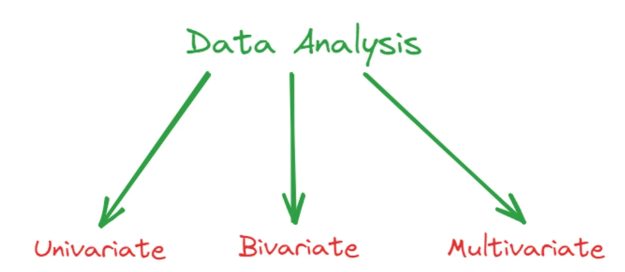

<br>

- **Univariate Analyse** → eine Variable betrachten  
- **Bivariate Analyse** → Zusammenhang von zwei Variablen  
- **Multivariate Analyse** → Beziehungen zwischen mehreren Variablen  
<br>


---


<br>

**❓ Wichtige Fragen in der EDA**

<br>

👉 **Fehlende oder ungültige Werte?**  
> Verzerren Analysen – Maßnahmen: Imputation, Entfernen, Korrigieren.  

👉 **Trends oder Muster erkennbar?**  
> Saisonale Effekte oder zeitliche Entwicklungen liefern wertvollen Kontext.  

👉 **Korrelationen oder Beziehungen zwischen Variablen?**  
> Hilfreich für Hypothesenbildung und Feature-Auswahl.  

👉 **Ausreißer oder Anomalien vorhanden?**  
> Können Fehler, seltene Ereignisse oder Chancen darstellen.  
<br>


---


<br>

**🛠 Schritte der EDA**  
1. **Datensatz verstehen** → Struktur, Datentypen, Umfang prüfen  
2. **📊 Daten zusammenfassen** → Mittelwert, Median, Standardabweichung  
3. **🧹 Werte prüfen** → fehlende Daten & Ausreißer behandeln  
4. **👀 Verteilungen visualisieren** → Histogramme, Boxplots  
5. **📈 Beziehungen analysieren** → Scatterplots, Heatmaps, Paarvergleiche  
6. **🤔 Hypothesen formulieren** → Trends erkennen, neue Fragen ableiten  


### Zufallsvariablen innerhalb einer EDA

**Zufallsvariablen**  
> Eine Zufallsvariable beschreibt das Ergebnis eines Zufallsprozesses – die Werte sind unvorhersehbar (zufällig) und veränderlich (variabel).  

**Beispiele**  
- Schüleralter: [10, 12, 11, 10, 13]  
- Pilzgewichte: [23, 45, 38, 40, 50]  
- Kassenausgaben: [15, 20, 35, 10, 25]  

<br>

**Schnellfrage: Was ist eine Zufallsvariable?**  
> Eine Zufallsvariable beschreibt das Ergebnis eines Zufallsprozesses, bei dem die Werte ungewiss sind und sich verändern können.  

<br>

**Relevanz für Data Scientists**  
> Reale Daten stammen fast immer aus Zufallsprozessen (z. B. Käufe, Klicks, Messungen).  
> Sobald sie erhoben sind, werden sie in der EDA untersucht:  
- Univariate Analyse → eine Variable (z. B. Umsatz)  
- Bivariate Analyse → zwei Variablen (z. B. Werbebudget & Umsatz)  
- Multivariate Analyse → mehrere Variablen im Zusammenspiel (z. B. Preis, Bewertungen, Werbung)  

<br>

**Schnellfrage: Warum wichtig?**  
> Um passende Analysearten und Methoden auszuwählen, muss man wissen, mit welcher Art Zufallsvariable man arbeitet.  

<br>

**Arten von Zufallsvariablen**  

- **Numerische Variablen**  
  - *Diskret*: zählbar, endlich, ganze Zahlen  
    Beispiele: Schülerzahl, Autos auf Parkplatz, Verkäufe pro Tag  
  - *Stetig*: beliebige Werte im Intervall, Messungen  
    Beispiele: Körpergröße, Gewicht, Bearbeitungszeit  

<br>

- **Kategorische Variablen**  
  - *Nominal*: keine Reihenfolge  
    Beispiele: Geschlecht, Augenfarbe, Produkttyp  
  - *Ordinal*: geordnete Kategorien, aber Abstände nicht gleichmäßig  
    Beispiele: Zufriedenheit, Bildungsgrad, Hotelbewertung  


## **Univariate Analyse in der EDA**

### **Einführung in die univariate Analyse**

#### **Univariate Analyse**

Die *univariate Analyse* ist die einfachste Form der Datenanalyse,  
bei der **eine einzelne Variable** untersucht wird, um ihre  
Verteilung, zentrale Tendenz, Streuung und andere statistische Eigenschaften zu verstehen.

Das Hauptziel ist es, **Daten zusammenzufassen** und **grundlegende Muster aufzudecken**,  
die erste Einblicke in das Verhalten der untersuchten Variable geben.

<br>

---

<br>

#### **Typische Fragen in einer univariaten Analyse**


🔹 **Was ist der zentrale Wert der Daten?**  
Kennzahlen wie *Mittelwert*, *Median* oder *Modus* zeigen die zentrale Tendenz.  
Sie verraten, wo sich die meisten Datenpunkte befinden, und geben ein Gefühl für den „typischen“ Wert – essenziell für Vergleiche oder Referenzwerte.  

> 💡 **Beispiel:**  
> Ein E-Commerce-Unternehmen untersucht Lieferzeiten und verwendet den durchschnittlichen Lieferzeitpunkt,  
> um die Kundenerfahrung zu verstehen, realistische Erwartungen zu setzen und festzustellen,  
> ob der aktuelle Durchschnitt den internen Standards entspricht.


<br>

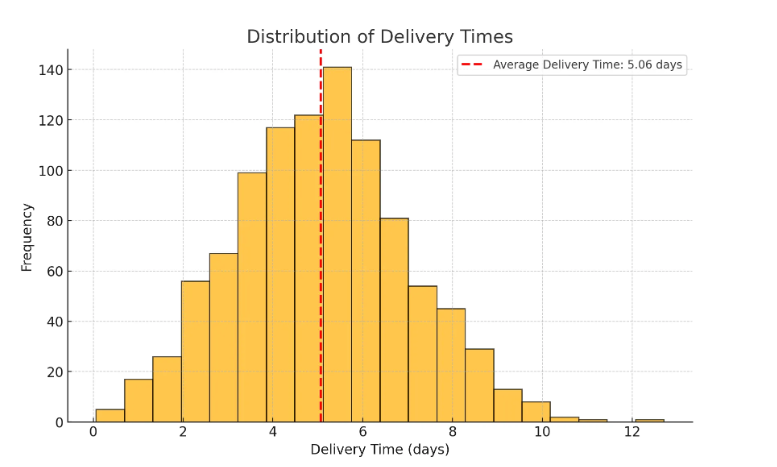

<br>

---

<br>

🔹 **Wie stark streuen die Daten?**  
Hier werden Streuungsmaße wie *Varianz*, *Standardabweichung* und *Spannweite (Range)* betrachtet.  
Diese Kennzahlen zeigen, wie stark die Werte auseinanderliegen – wichtig für die Einschätzung von Risiken, Konsistenz und Zuverlässigkeit.

> 💡 **Beispiel:**  
> Wenn ein E-Commerce-Unternehmen die Streuung der Lieferzeiten versteht, können inkonsistente Lieferungen aufgedeckt werden.  
> Eine hohe Varianz weist etwa auf Probleme in bestimmten Regionen oder Prozessen hin und liefert Ansatzpunkte für gezielte Verbesserungen.


<br>

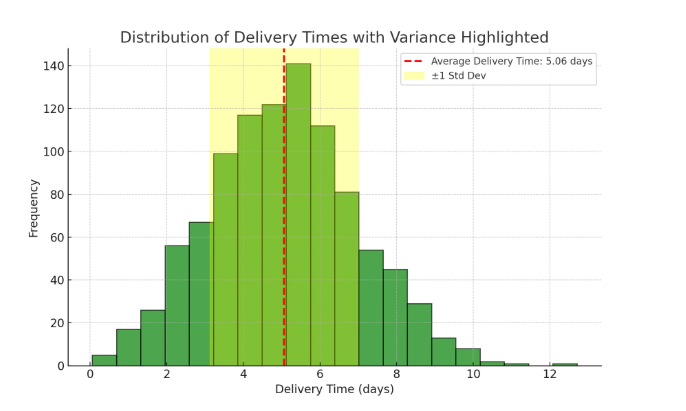

<br>

---

<br>


🔹 **Wie sieht die Verteilung der Daten aus?**  
Die Form der Verteilung kann Hinweise auf *Schiefe*, *Kurtosis* oder eine *Normalverteilung* geben.  
Die Kenntnis der Verteilungsform ist entscheidend für die Auswahl geeigneter statistischer Methoden,  
das Erkennen von Ausreißern und das Verständnis des Variablenverhaltens in verschiedenen Kontexten.

> 💡 **Beispiel:**  
> Eine Analyse der Verteilung der Lieferzeiten zeigt, ob Verspätungen häufig sind  
> (z. B. eine Schiefe in Richtung längerer Zeiten) oder ob extreme Ausreißer auftreten –  
> beides hilft, Ursachen zu identifizieren und die Kundenzufriedenheit zu verbessern.


<br>

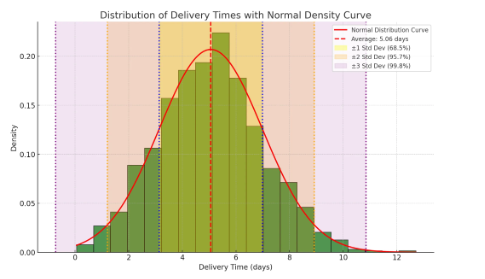

<br>

---

<br>

🔹 **Gibt es ungültige Werte?**  
Eine Häufigkeitstabelle der täglichen Verkäufe kann ungültige Werte aufdecken,  
wie negative oder unrealistisch hohe Zahlen.  
Das Bereinigen solcher Anomalien stellt sicher, dass die Daten für Prognosen, Segmentierungen und Business Insights zuverlässig sind.

> 💬 **Beispiel:**  
> Eine Frequenzanalyse der Spalte „daily_sales“ zeigt einen Wert von –25.  
> Solche negativen Zahlen sind in diesem Kontext nicht möglich und müssen korrigiert oder entfernt werden.


<br>

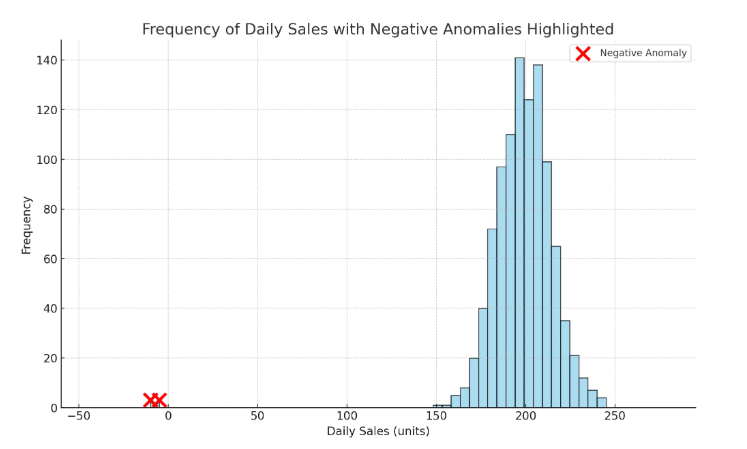

<br>

---

<br>

**Warum ist die univariate Analyse im EDA-Prozess so wichtig?**

Die univariate Analyse ist ein zentraler Baustein der *Explorativen Datenanalyse (EDA)*.  
Sie legt das Fundament für das Verständnis der Daten und sichert deren Qualität,  
bevor komplexere Analysen folgen.

<br>

---

<br>

💡 **Grundverständnis der Daten entwickeln**  
Erkennt Verteilung, zentrale Tendenz und Streuung einer Variable.  
Hilft, Benchmarks zu setzen und typische Werte zu identifizieren.

> Beispiel: Die typische Lieferzeit oder übliche Verkaufszahlen helfen, Referenzwerte festzulegen und Abweichungen zu erkennen.

<br>

⚠️ **Frühes Erkennen von Anomalien**  
Deckt Ausreißer oder Inkonsistenzen (z. B. extrem hohe Verkäufe oder negative Altersangaben) früh auf  
und verhindert fehlerhafte Analysen.

> Beispiel: Durch frühzeitiges Erkennen ungewöhnlich hoher Verkaufszahlen kann ein Datenfehler oder Betrug vermutet werden.

<br>

✅ **Verbesserung der Datenqualität**  
Ungültige oder fehlende Werte werden erkannt und bereinigt –  
eine saubere Datenbasis ist essenziell für verlässliche Modelle.

> Beispiel: Wenn eine Spalte zu 30 % fehlende Werte enthält, kann entschieden werden, ob eine Imputation oder das Entfernen sinnvoller ist.

<br>

☝ **Geeignete Analyseverfahren wählen**  
Die Kenntnis über Verteilung und Streuung hilft bei der Auswahl passender statistischer Tests  
(z. B. Transformationen oder nicht-parametrische Verfahren bei schiefer Verteilung).

> Beispiel: Bei stark rechtsschiefer Verteilung der Lieferzeiten könnte eine Log-Transformation angewendet werden.

<br>

🤔 **Intuition für die Variable entwickeln**  
Vermittelt ein erstes Gespür für das Verhalten einer Variable  
und zeigt, welche Fragen im weiteren Verlauf vertieft werden sollten.

<br>

---

<br>

**Fazit:**  
Die univariate Analyse ist weit mehr als nur ein erster Schritt –  
sie sichert die *Datenqualität*, zeigt *erste Hypothesen* auf  
und bildet die *Grundlage für alle weiteren EDA-Schritte*.  
Ohne sie können nachfolgende Analysen leicht in die Irre führen.

---

<br>


#### 🧩 **Schnellfragen – Einführung in die univariate Analyse**

**Frage 1:**  
Wie viele Zufallsvariablen werden in der univariaten Analyse untersucht?

<details>
<summary>💬 Antwort anzeigen</summary>

In der univariaten Analyse wird **eine einzelne Variable** im Detail untersucht –  
mithilfe verschiedener Techniken und Visualisierungen.

</details>

<br>

---

<br>

**Frage 2:**  
Was ist das Hauptziel der univariaten Analyse?

<details>
<summary>💬 Antwort anzeigen</summary>

Ziel ist es, **die Daten zusammenzufassen** und **grundlegende Muster zu erkennen**,  
die Aufschluss über das Verhalten der untersuchten Variable geben.

</details>

<br>

---

<br>

**Frage 3:**  
Welche typischen Fragen werden in der univariaten EDA gestellt?

<details>
<summary>💬 Antwort anzeigen</summary>

🔹 Was ist der zentrale Wert?  
🔹 Wie stark streuen die Werte?  
🔹 Wie sieht die Verteilung aus?  
🔹 Gibt es Ausreißer?  
🔹 Gibt es ungültige Werte?

</details>

<br>

---

<br>

### **Statistik für univariate Analysen**

####  **Statistik für univariate Analysen**

Ein Data Analyst oder Data Scientist zu sein bedeutet mehr als nur zu coden.  
Du musst verstehen, **welche Statistiken, Visualisierungen und Techniken** angewendet werden können (und müssen),  
um Informationen aus Daten zu gewinnen.  

Bevor wir also in den Code einsteigen, schauen wir uns einige typische Statistiken an,  
die bei der univariaten Analyse verwendet werden.

<br>

---

<br>

👉 **Mittelwert (Mean)**  
Der Mittelwert ist die **Summe aller Werte** in einem Datensatz, geteilt durch die **Anzahl der Werte**.  
Er liefert einen zentralen Wert der Daten und hilft, den allgemeinen Trend zu erkennen.  
Allerdings kann er durch **Ausreißer** verzerrt werden.

> 💡 **Beispiel:**  
> Wenn der tägliche Umsatz lautet:  
> `100, 150, 200, 250, 300`  
>
> Mittelwert = (100 + 150 + 200 + 250 + 300) ÷ 5 = 1000 ÷ 5 = **200**  
>
> ➕ Der durchschnittliche tägliche Umsatz liegt also bei **200 Einheiten**.

<br>

---

<br>

👉 **Median**  
Der Median ist der **mittlere Wert in einem sortierten Datensatz**.  
Bei einer geraden Anzahl von Werten ist es der Durchschnitt der beiden mittleren Werte.  
Der Median ist **robuster gegenüber Ausreißern** als der Mittelwert.

> 💡 **Beispiel:**  
> Werte: `100, 150, 200, 250, 300`  
> Median = **200**  
>
> Bei einem geraden Datensatz: `100, 150, 200, 250`  
> Median = (150 + 200) ÷ 2 = **175**  
>
> ➕ Damit erkennt man den „typischen“ Umsatz, ohne dass Ausreißer das Bild verzerren.

<br>

---

<br>

👉 **Standardabweichung (std)**  
Die Standardabweichung misst, **wie stark einzelne Werte vom Mittelwert abweichen**.  
Eine hohe Standardabweichung bedeutet große Streuung;  
eine niedrige weist auf homogene Daten hin.

> 💡 **Beispiel:**  
> Werte: `100, 150, 200, 250, 300`  
>
> 1️⃣ Mittelwert = 200  
> 2️⃣ Quadrierte Abweichungen:  
> (100−200)² = 10 000 (150−200)² = 2 500 (200−200)² = 0 (250−200)² = 2 500 (300−200)² = 10 000  
> 3️⃣ Varianz = (10 000 + 2 500 + 0 + 2 500 + 10 000) ÷ 5 = 5 000  
> 4️⃣ Standardabweichung = √5 000 ≈ **70,71**  
>
> ➕ Der Umsatz weicht im Schnitt um rund **71 Einheiten** vom Mittelwert 200 ab.  
> Niedrige Standardabweichung → konstanter Umsatz.  
> Hohe Standardabweichung → schwankender Umsatz.

<br>

---

<br>

👉 **Min / Max**  
- **Min** ist der kleinste Wert  
- **Max** ist der größte Wert  

Diese Werte zeigen die **Spannweite** der Daten und helfen, Ausreißer zu erkennen.

> 💡 **Beispiel:**  
> Werte: `100, 150, 200, 250, 300`  
> Min = 100 Max = 300  
>
> ➕ Der Umsatz reicht von **100 bis 300 Einheiten**.

<br>

---

<br>


#### **Univariate Analyse mit Python**


**Aufgaben:**

<br>

*   Bibliotheken und Dataset importieren

*   Spalte abfragen

*   Mittelwert berechnen

*   Median berechnen

*   Standardabweichung berechnen

*   Minimum und Maximum berechnen



In [ ]:
# seaborn importieren
#     import seaborn as sns

# pandas importieren
#     import pandas as pd

# Datenset laden
mpg_df = sns.load_dataset('mpg')

# ersten 5 Datensätze anzeigen
display(mpg_df.head())


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [ ]:
# Spalte abfragen
horsepower = mpg_df['horsepower']

display(horsepower)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [ ]:
# Mittelwert berechnen
mean_hp = horsepower.mean()


print(round(mean_hp))

104


In [ ]:
#Median berechnen
median_hp = horsepower.median()


print(round(median_hp))

94


In [ ]:
# Standardabweichung berechnen
std_hp = horsepower.std()


print(round(std_hp))

38


In [ ]:
# Minimum und Maximum berechnen
min_hp = horsepower.min()
print(min_hp)

max_hp = horsepower.max()
print(max_hp)

46.0
230.0


#### **Univariate Analyse mit describe()**

In [ ]:
# Univariate Analyse mit describe()
display(mpg_df.describe())

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

> 👉 **Count:** Für 398 Fahrzeuge liegen Gewichtsangaben vor.  
> 👉 **Mean:** Das durchschnittliche Fahrzeuggewicht liegt bei 2970 Pfund – typisch für Mittelklassefahrzeuge.  
> 👉 **Standardabweichung:** Die hohe Standardabweichung zeigt, dass die Gewichte stark variieren.  
> 👉 **Min:** Das leichteste Auto wiegt 1613 Pfund – vermutlich ein Kleinwagen.  
> 👉 **25 %:** Ein Viertel der Fahrzeuge wiegt unter 2223 Pfund – also eher leichte Fahrzeuge.  
> 👉 **50 %:** Der Median liegt bei 2803 Pfund – typisches Gewicht eines Standard-PKWs.  
> 👉 **75 %:** Drei Viertel wiegen unter 3608 Pfund – Dominanz von Kompakt- bis Mittelklasse-Fahrzeugen.  
> 👉 **Max:** Das schwerste Fahrzeug wiegt 5140 Pfund – vermutlich ein großer SUV oder Pickup.


<br>

---

<br>

#### 🧩 **Schnellfragen zur univariaten Analyse**

**Frage 1:**  
Was zeigt der Mittelwert in der univariaten Analyse?

<details>
<summary>💬 Antwort anzeigen</summary>

Den **Durchschnittswert** des Datensatzes – eine schnelle Einschätzung der zentralen Lage.

</details>

<br>

**Frage 2:**  
Warum ist der Median nützlich bei Ausreißern?

<details>
<summary>💬 Antwort anzeigen</summary>

Weil er **nicht durch extreme Werte beeinflusst** wird und den „echten“ Mittelpunkt zeigt.

</details>

<br>

**Frage 3:**  
Was zeigt eine hohe Standardabweichung?

<details>
<summary>💬 Antwort anzeigen</summary>

Eine **große Streuung** – die Werte liegen weit auseinander.

</details>

<br>

**Frage 4:**  
Wie berechnet man die Spannweite eines Datensatzes?

<details>
<summary>💬 Antwort anzeigen</summary>

**Range = Max – Min** → Differenz zwischen größtem und kleinstem Wert.

</details>

<br>

**Frage 5:**  
Was macht die Funktion `describe()` in Python?

<details>
<summary>💬 Antwort anzeigen</summary>

Sie liefert **Zusammenfassungen** wie *count*, *mean*, *std*, *min*, *max* und *Perzentile*.

</details>

<br>

**Frage 6:**  
Wenn der Mittelwert viel höher als der Median ist – was bedeutet das?

<details>
<summary>💬 Antwort anzeigen</summary>

Die Daten sind **rechtsschief** – es gibt **hohe Ausreißer**.

</details>

<br>

**Frage 7:**  
Was ist der Unterschied zwischen Varianz und Standardabweichung?

<details>
<summary>💬 Antwort anzeigen</summary>

Die **Varianz** ist der mittlere quadrierte Abstand,  
die **Standardabweichung** ist die **Quadratwurzel der Varianz**.

</details>

<br>

**Frage 8:**  
Kann die Standardabweichung negativ sein?

<details>
<summary>💬 Antwort anzeigen</summary>

Nein, sie ist **immer ≥ 0**, da sie auf **quadrierten Abständen** basiert.

</details>

<br>

**Frage 9:**  
Wann wählt man den Median statt den Mittelwert?

<details>
<summary>💬 Antwort anzeigen</summary>

Bei **Ausreißern oder schiefen Verteilungen**, um ein realistischeres Zentrum zu erfassen.

</details>

<br>

**Frage 10:**  
Was bedeutet das 25. Perzentil?

<details>
<summary>💬 Antwort anzeigen</summary>

Dass **25 % der Werte darunter** liegen – Einblick in das **untere Viertel** der Verteilung.

</details>

<br>

---

<br>

### **Statistik für univariate Analysen - Übung**

In [ ]:
# Übung 1

# Du arbeitest mit dem Diamonds-Datensatz. Er wurde bereits eingelesen
# und in der Variable diamonds_df gespeichert. Vervollständige die fehlenden
# Teile im Code, um den Mittelwert, Median, Modus, das Minimum, Maximum
# und die Standardabweichung für die Spalte price zu berechnen.

# Datensatz laden
diamonds_df = sns.load_dataset("diamonds")

# Mittelwert der Price-Spalte
mean_price = diamonds_df["price"].mean()
display(f"Mean Price: {round(mean_price,2)}")

# Median der Price-Spalte
median_price = diamonds_df["price"].median()
display(f"Median Price: {median_price}")

# Mode der Price-Spalte
mode_price = diamonds_df["price"].mode()

display(f"Mode Price: {mode_price.iloc[0]}")
# Was genau macht Mode hier?

# Minimum der Price-Spalte
min_price = diamonds_df["price"].min()
display(f"Minimum Price: {min_price}")

# Maximum der Price-Spalte
max_price = diamonds_df["price"].max()
display(f"Maximum Price: {max_price}")

# Standardabweichung der Price-Spalte
std_price = diamonds_df["price"].std()
display(f"Standard Deviation: {round(std_price,2)}")

'Mean Price: 3932.8'

'Median Price: 2401.0'

'Mode Price: 605'

'Minimum Price: 326'

'Maximum Price: 18823'

'Standard Deviation: 3989.44'

#### 💎 **Schnellfragen Übung 1: – Interpretation von Kennzahlen (Diamantenpreise)**

<br>

**Frage 1:**  
Was bedeutet die Standardabweichung in diesem Zusammenhang?

<details>
<summary>💬 Antwort anzeigen</summary>

Die **Standardabweichung** zeigt, wie stark die Diamantenpreise vom Durchschnittspreis abweichen.  
Eine **hohe Standardabweichung** bedeutet, dass die Preise weit auseinanderliegen,  
eine **niedrige Standardabweichung** zeigt, dass die Preise nah am Mittelwert liegen.

</details>

<br>

---

<br>

**Frage 2:**  
Was sagt der Modus über Diamantenpreise aus?

<details>
<summary>💬 Antwort anzeigen</summary>

Der **Modus** ist der am häufigsten vorkommende Preis in diesem Datensatz.  
Er zeigt an, **zu welchem Preis Diamanten am häufigsten verkauft werden.**

</details>

<br>

---

<br>

**Frage 3:**  
Was bedeutet es, wenn Mittelwert und Median stark voneinander abweichen?

<details>
<summary>💬 Antwort anzeigen</summary>

Ein großer Unterschied zwischen **Mittelwert** und **Median** deutet darauf hin,  
dass die **Verteilung schief** ist.  

- Ist der **Mittelwert größer als der Median**, ist die Verteilung **rechtsschief**  
  (viele niedrige, wenige sehr hohe Werte).  
- Ist der **Mittelwert kleiner als der Median**, ist sie **linksschief**  
  (viele hohe, wenige sehr niedrige Werte).

</details>

<br>

---

<br>


In [ ]:
# Übung 2

# Du arbeitest mit dem Tips-Datensatz. Er wurde bereits eingelesen
# und in der Variable tips_df gespeichert. Vervollständige die
# fehlenden Teile im Code, um den Mittelwert, Median, Modus, das
# Minimum, Maximum und die Standardabweichung für die Spalte
# total_bill zu berechnen.

tips_df = sns.load_dataset("tips")

# Berechnung zentraler Kennzahlen der Spalte "total_bill"
mean_bill = tips_df["total_bill"].mean()
median_bill = tips_df["total_bill"].median()
mode_bill = tips_df["total_bill"].mode()[0]
std_bill = tips_df["total_bill"].std()
min_bill = tips_df["total_bill"].min()
max_bill = tips_df["total_bill"].max()

display(f"Mittelwert: {mean_bill:.2f}")
display(f"Median: {median_bill:.2f}")
display(f"Modus: {mode_bill:.2f}")
display(f"Standardabweichung: {std_bill:.2f}")
display(f"Minimum: {min_bill:.2f}")
display(f"Maximum: {max_bill:.2f}")

'Mittelwert: 19.79'

'Median: 17.80'

'Modus: 13.42'

'Standardabweichung: 8.90'

'Minimum: 3.07'

'Maximum: 50.81'

#### 🍽️ **Schnellfragen Übung 2: – Interpretation der Ergebnisse (Restaurantrechnungen)**

<br>


**Frage 1:**  
Was bedeutet die Standardabweichung in diesem Zusammenhang?

<details>
<summary>💬 Antwort anzeigen</summary>

Die **Standardabweichung** zeigt, wie stark die Restaurantrechnungen vom **Durchschnittswert** abweichen.  
Eine **hohe Abweichung** bedeutet, dass die Rechnungen stark variieren,  
eine **niedrige Abweichung** zeigt, dass die Beträge gleichmäßiger sind.

</details>

<br>

---

<br>

**Frage 2:**  
Was sagt der Modus über die Rechnungen aus?

<details>
<summary>💬 Antwort anzeigen</summary>

Der **Modus** ist der am häufigsten vorkommende **Rechnungsbetrag**.  
Er zeigt, **welcher Betrag im Restaurant am häufigsten auftritt**.

</details>

<br>

---

<br>

**Frage 3:**  
Was bedeutet es, wenn Mittelwert und Median stark voneinander abweichen?

<details>
<summary>💬 Antwort anzeigen</summary>

Ein großer Unterschied zwischen **Mittelwert** und **Median** zeigt,  
dass die **Verteilung schief** ist.  

- Ist der **Mittelwert größer als der Median**, ist sie **rechtsschief**  
  (viele kleine, wenige sehr große Rechnungen).  
- Ist der **Mittelwert kleiner als der Median**, ist sie **linksschief**  
  (viele hohe, wenige kleine Rechnungen).

</details>

<br>

---

<br>


In [ ]:
# Übung 3

# Du arbeitest erneut mit dem Tips-Datensatz. Er wurde bereits eingelesen
# und in der Variable tips_df gespeichert. Du sollst die Standardabweichung
# von tip und total_bill vergleichen, um herauszufinden, welche Spalte
# eine größere Streuung aufweist.

# Datensatz laden
import seaborn as sns
import pandas as pd

tips_df = sns.load_dataset("tips")

# Berechnung des Mittelwerts und der Standardabweichung
mean_bill = tips_df["total_bill"].mean()
std_tip = tips_df["tip"].std()
std_bill = tips_df["total_bill"].std()

display(f"Mittelwert (Total Bill): {mean_bill}")
display(f"Standardabweichung (Tip): {std_tip}")
display(f"Standardabweichung (Total Bill): {std_bill}")



'Mittelwert (Total Bill): 19.78594262295082'

'Standardabweichung (Tip): 1.3836381890011826'

'Standardabweichung (Total Bill): 8.902411954856856'

#### 💰 **Schnellfragen Übung 3 – Interpretation von Standardabweichungen (Tips-Datensatz)**

<br>

**Frage 1:**  
Was bedeutet es, wenn `std_bill` deutlich größer ist als `std_tip`?

<details>
<summary>💬 Antwort anzeigen</summary>

Wenn **std_bill** größer ist als **std_tip**, bedeutet das,  
dass sich die **Rechnungsbeträge** viel stärker unterscheiden als die **Trinkgelder**.  
Das zeigt, dass Gäste sehr unterschiedlich teure Mahlzeiten bestellen,  
aber beim **Trinkgeld** ähnliche Beträge geben.

</details>

<br>

---

<br>

**Frage 2:**  
Was bedeutet es, wenn zwei Datensätze den gleichen Mittelwert, aber unterschiedliche Standardabweichungen haben?

<details>
<summary>💬 Antwort anzeigen</summary>

Der Datensatz mit der **höheren Standardabweichung** hat eine **größere Streuung** –  
die Werte schwanken stärker.  
Der Datensatz mit der **niedrigeren Abweichung** ist **gleichmäßiger**,  
und die Werte liegen **näher am Mittelwert**.

</details>

<br>

---

<br>

**Frage 3:**  
Welche Spalte hat deiner Meinung nach die höhere Standardabweichung: `total_bill` oder `tip`?

<details>
<summary>💬 Antwort anzeigen</summary>

Die Spalte **`total_bill`** wird voraussichtlich eine **höhere Standardabweichung** haben als **`tip`**,  
weil **Rechnungsbeträge** je nach Bestellung stark variieren können,  
während **Trinkgelder** in der Regel gleichmäßiger ausfallen.

</details>

<br>

---

<br>


### **Histogramme**

#### **Einführung in Histogramme**

Ein **Histogramm** ist eine grafische Darstellung der Verteilung numerischer Daten.  
Es unterteilt den gesamten Wertebereich in Intervalle, sogenannte **Bins**,  
und zählt, wie viele Werte in jedes Intervall fallen.  

Histogramme eignen sich besonders für **kontinuierliche oder diskrete numerische Variablen**,  
um Muster wie **Schiefe**, **Modalität** oder **Ausreißer** zu erkennen.

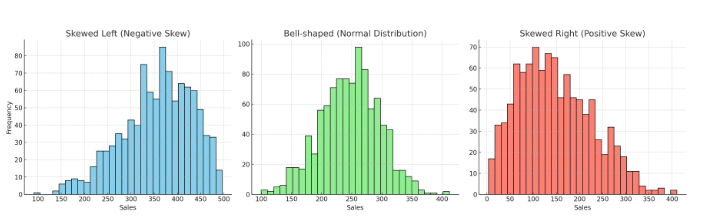

> Zum Beispiel zeigt das Bild oben drei Histogramme mit verschiedenen Arten von Verkaufsverteilungen.  
> Auf der **x-Achse** siehst du die Werte (oder Wertebereiche) und auf der **y-Achse** ihre Häufigkeit.  

Das erste Histogramm ist **linksschief (negative Schiefe)** → längerer „Schwanz“ links,  
die meisten Verkäufe sind hoch, nur wenige sind niedrig.  

Das zweite ist **glockenförmig (Normalverteilung)** → symmetrisch um den Mittelwert verteilt,  
typisches Muster mit gleichmäßiger Streuung.  

Das dritte ist **rechtsschief (positive Schiefe)** → die meisten Verkäufe sind niedrig,  
einige wenige sehr hoch.


<br>

---

<br>




####  **Wann verwendet man ein Histogramm?**
<br>

Histogramme werden häufig in der **explorativen Datenanalyse (EDA)** eingesetzt, um:

- die **Verteilung** eines Datensatzes sichtbar zu machen  
- **Muster** wie Schiefe oder Symmetrie zu erkennen  
- **Ausreißer** zu identifizieren  
- **Verteilungen** unterschiedlicher Datensätze zu vergleichen

<br>

---

<br>

####  **Histogramme in der univariaten Analyse**
<br>


Da Histogramme sich auf **eine einzelne Variable** konzentrieren,  
sind sie ein zentrales Werkzeug der **univariaten Analyse**.  

Sie helfen dabei:

- die **Streuung** und **zentrale Tendenz** zu verstehen  
- zu prüfen, ob Daten einer **Normalverteilung** folgen  
- zu erkennen, ob sie **unimodal** oder **multimodal** sind

<br>

---

<br>

####  **Anwendungsbeispiele für Histogramme**

Die folgenden Beispiele zeigen, wie Histogramme in unterschiedlichen Kontexten eingesetzt werden können.


> Das Bild oben zeigt drei Histogramme, die verschiedene Arten von **Verkaufsverteilungen** darstellen.  
> In jedem siehst du auf der **x-Achse** die Werte und auf der **y-Achse** deren **Häufigkeit** (oder Intervalle, sogenannte *Bins*).  
>
> - **Linksschief (Negative Schiefe):**  
>   Die Daten haben einen längeren „Schwanz“ auf der linken Seite – die meisten Verkäufe sind hoch, nur wenige niedrig.  
>
> - **Glockenförmig (Normalverteilung):**  
>   Die Daten sind symmetrisch um den Mittelwert verteilt und zeigen ein typisches Verkaufsmuster mit gleichmäßiger Streuung.  
>
> - **Rechtsschief (Positive Schiefe):**  
>   Die Daten haben einen längeren „Schwanz“ auf der rechten Seite – die meisten Verkäufe sind niedrig, einige wenige sehr hoch.


#####  **Prüfungsergebnisse von Studierenden**
<br>


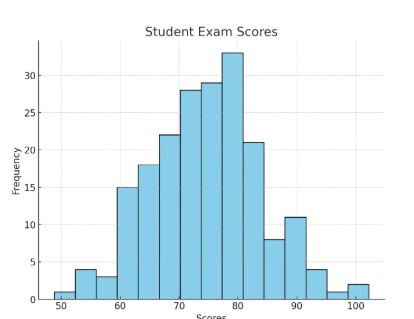

> Eine Professorin analysiert die **Prüfungsergebnisse** ihrer Studierenden.  
> Ein Histogramm zeigt, wie viele Studierende in bestimmten Notenbereichen abgeschnitten haben.  

Das Histogramm ist **glockenförmig** → die meisten liegen um den Durchschnitt.  
Nur wenige hatten sehr schlechte oder sehr gute Noten.  
Eine starke Schiefe würde zeigen, dass die Prüfung **zu leicht oder zu schwer** war.

<br>


---


<br>

##### **Gehälter im Unternehmen**

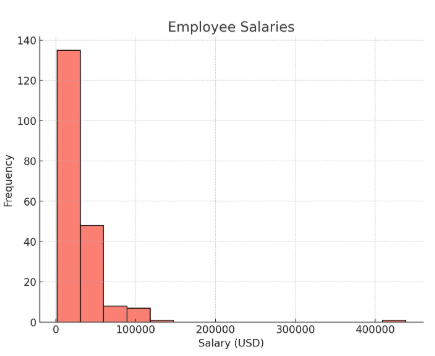

> Ein Unternehmen untersucht die **Gehälter seiner Mitarbeitenden**.  

Das Histogramm ist **rechtsschief** → die meisten Mitarbeitenden verdienen niedrige bis mittlere Beträge,  
wenige sehr hohe.  
Das weist auf **Einkommensunterschiede** hin, z. B. durch Führungspositionen oder Boni.

<br>


---


<br>

##### **Website-Performance**

<br>

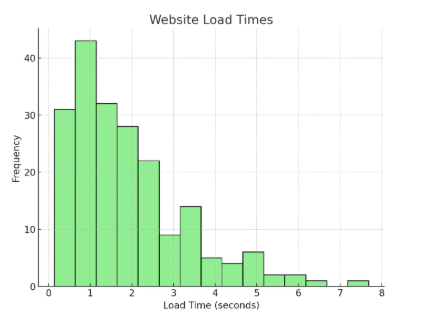

> Ein Webentwickler analysiert die **Ladezeiten** einer Website.  

Das Histogramm ist **leicht rechtsschief** → die meisten Nutzer haben kurze Ladezeiten,  
aber einige erleben **lange Verzögerungen**.  
Das spricht für gute Performance, aber vereinzelte **Engpässe**.

<br>


---


<br>

##### **Blutdruckwerte im Krankenhaus**
<br>

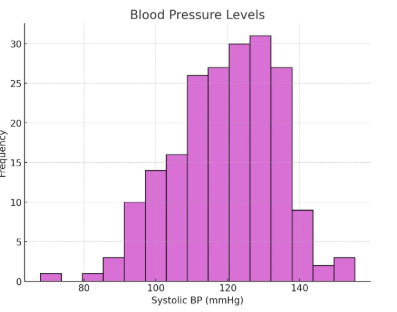


> Ein Krankenhaus untersucht die **Blutdruckwerte** seiner Patient:innen.  

Das Histogramm zeigt eine **Normalverteilung um 120 mmHg**, was als gesunder systolischer Blutdruck gilt.  
Die meisten Werte liegen im Normalbereich, doch an beiden Enden gibt es **Ausreißer**,  
die ärztlich beobachtet werden sollten.

<br>


---


<br>

#### **Histogramme mit Python**

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

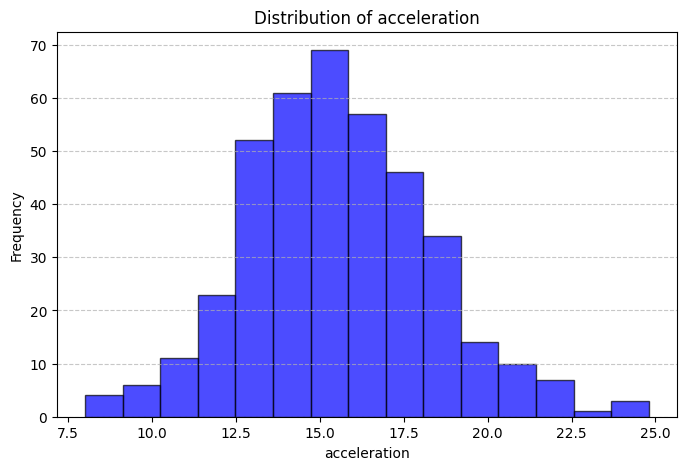

In [ ]:
# Datense laden
df = sns.load_dataset("mpg")

display(df.head())

# Spalte ohne fehlende Werte auswählen
data_column = df['acceleration'].dropna()

# Grundfläche des Plots erstellen
plt.figure(figsize=(8, 5))

# Histogramm erstellen
plt.hist(
    data_column,
    bins=15,
    alpha=0.7,
    edgecolor='black',
    color='blue'
)

# Label x-Achse
plt.xlabel('acceleration')
# Label y-Achse
plt.ylabel('Frequency')
# Label Titel
plt.title('Distribution of acceleration')

# Grid hinzufügen
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7
)

# Histogramm anzeigen
plt.show()

### **Histogramme - Übung**

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

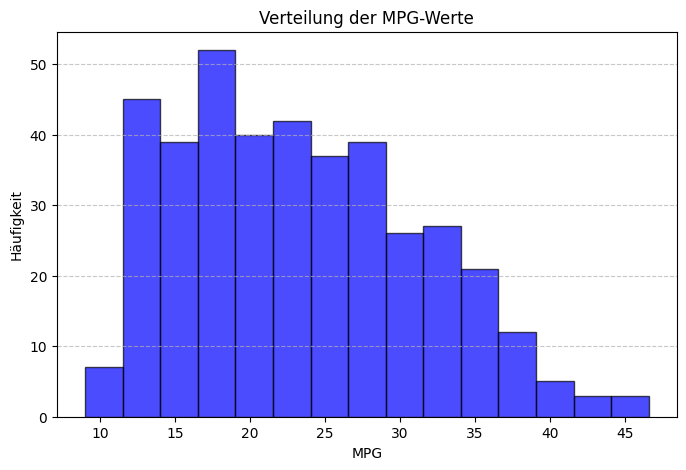

In [ ]:
# Übung 1

# Du arbeitest mit dem mpg-Datensatz. Er wurde bereits eingelesen und
# in der Variable df gespeichert. Vervollständige die fehlenden Teile im
# Code, um ein Histogramm für die Spalte mpg zu erstellen.

# Datensatz laden
df = sns.load_dataset("mpg")

# Zeige die ersten fünf Zeilen des Datensatzes an
display(df.head())

# Wähle die Spalte 'mpg' aus und entferne fehlende Werte
daten_spalte = df['mpg'].dropna()

# Erstelle eine Abbildung für das Histogramm
plt.figure(figsize=(8, 5))

# Erstelle das Histogramm für die ausgewählte Spalte
plt.hist(
    daten_spalte,
    bins=15,
    edgecolor='black',
    alpha=0.7,
    color='blue'
    )

# Beschrifte Achsen und füge einen Titel hinzu
plt.xlabel("MPG")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der MPG-Werte")

# Füge Rasterlinien hinzu
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7
    )

# Zeige das Diagramm an
plt.show()

#### ❓ **Schnellfragen Übung 1 - zu Histogrammen**
<br>

<details>
<summary><b>Frage 1:</b> Wofür wird ein Histogramm verwendet?</summary>

> ✅ **Antwort:**  
> Ein Histogramm wird verwendet, um die **Verteilung einer numerischen Variable** zu visualisieren,  
> indem die Werte in **Intervalle (Bins)** gruppiert und deren **Häufigkeiten gezählt** werden.

</details>

<br>

<details>
<summary><b>Frage 2:</b> Was bewirkt die Anzahl der Bins in einem Histogramm?</summary>

> ✅ **Antwort:**  
> Die Anzahl der **Bins** bestimmt die **Granularität** des Histogramms.  
> Zu wenige Bins vereinfachen die Verteilung zu stark,  
> während zu viele Bins das Diagramm **unübersichtlich** und schwer **interpretierbar** machen.

</details>

<br>

<details>
<summary><b>Frage 3:</b> Wie hilft <code>dropna()</code> beim Auswählen einer Spalte?</summary>

> ✅ **Antwort:**  
> Die Funktion <code>dropna()</code> entfernt **fehlende Werte (NaNs)** aus dem Datensatz,  
> damit **Berechnungen und Visualisierungen** nicht durch unvollständige Daten **verfälscht** werden.

</details>

<br>

---

<br>

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

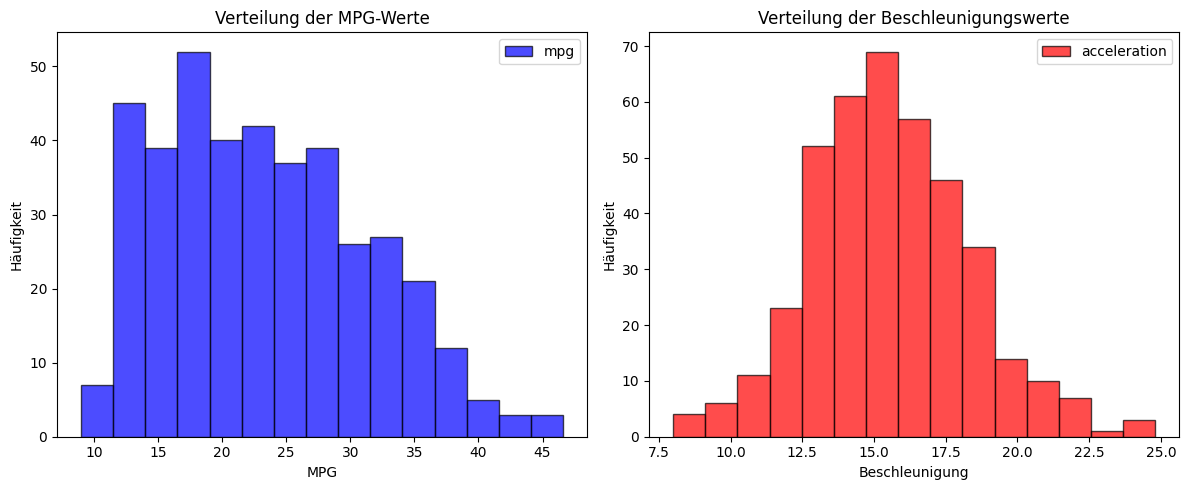

In [ ]:
# Übung 2

# Du arbeitest erneut mit dem mpg-Datensatz. Er wurde bereits eingelesen
# und in der Variable df gespeichert. Du sollst zwei Histogramme
# erstellen:
#     eines für mpg und eines für acceleration,
#     und dann deren Verteilungen vergleichen.

# Datensatz laden
# Datensatz laden
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Datensatz
df = sns.load_dataset("mpg")

# Zeige die ersten fünf Zeilen des Datensatzes an
display(df.head())

# Erstelle zwei nebeneinanderliegende Diagramme
plt.figure(figsize=(12, 5))

# Histogramm für 'mpg'
plt.subplot(1, 2, 1)
plt.hist(
    df['mpg'].dropna(),
    bins=15,
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='mpg'
)
plt.xlabel("MPG")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der MPG-Werte")
plt.legend()

# Histogramm für 'acceleration'
plt.subplot(1, 2, 2)
plt.hist(
    df['acceleration'].dropna(),
    bins=15,
    edgecolor='black',
    alpha=0.7,
    color='red',
    label='acceleration'
)

plt.xlabel("Beschleunigung")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Beschleunigungswerte")
plt.legend()

# Zeige beide Diagramme an
plt.tight_layout()
plt.show()




#### ❓ **Schnellfragen Übung 2 -zum Vergleich der Histogramme (MPG vs. Acceleration)**

<br>

<details>
<summary><b>Frage 1:</b> Was bedeutet es, wenn das MPG-Histogramm breiter gestreut ist als das von Acceleration?</summary>

> ✅ **Antwort:**  
> Wenn <code>mpg</code> stärker gestreut ist als <code>acceleration</code>, bedeutet das,  
> dass der **Kraftstoffverbrauch (Meilen pro Gallone)** stärker zwischen den Autos variiert,  
> während die **Beschleunigungswerte** gleichmäßiger verteilt sind.

</details>

<br>

<details>
<summary><b>Frage 2:</b> Was sagt es aus, wenn das MPG-Histogramm linksschief ist und Acceleration normalverteilt ist?</summary>

> ✅ **Antwort:**  
> Wenn das <code>mpg</code>-Histogramm **linksschief** ist, bedeutet das,  
> dass die meisten Autos einen **hohen Kraftstoffverbrauch (hohes mpg)** haben,  
> aber einige deutlich niedrigere Werte aufweisen.  
>  
> Wenn <code>acceleration</code> **normalverteilt** ist, zeigt das,  
> dass die Beschleunigungswerte **symmetrisch um den Mittelwert** verteilt sind –  
> also eine **gleichmäßige Verteilung** aufweisen.

</details>

<br>

<details>
<summary><b>Frage 3:</b> Wofür wird <code>plt.legend()</code> in der zweiten Übung verwendet?</summary>

> ✅ **Antwort:**  
> <code>plt.legend()</code> wird verwendet, um die **einzelnen Histogramme zu beschriften**,  
> damit man <code>mpg</code> (blau) und <code>acceleration</code> (rot) im Diagramm  
> **leicht unterscheiden** kann.

</details>

<br>


---


<br>

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

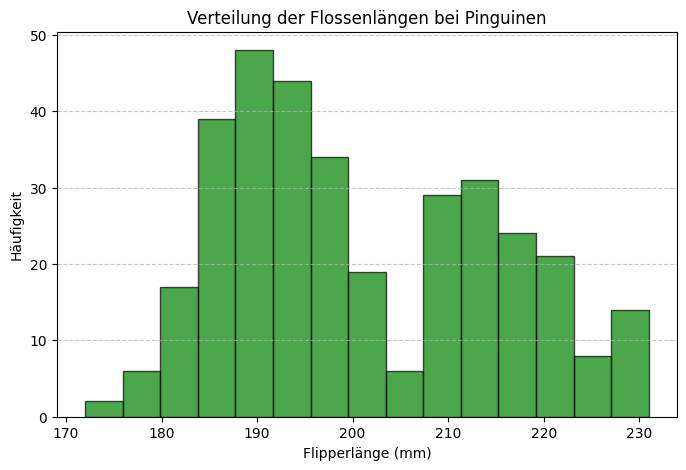

In [ ]:
# Übung 3
# Du arbeitest mit dem Penguins-Datensatz. Er wurde bereits eingelesen
# und in der Variable df gespeichert. Vervollständige die fehlenden Teile
# im Code, um ein Histogramm für die Spalte flipper_length_mm zu erstellen.

# Daten laden
df = sns.load_dataset("penguins")

# Zeige die ersten fünf Zeilen des Datensatzes an
display(df.head())

# Wähle die Spalte 'flipper_length_mm' aus und entferne fehlende Werte
df['flipper_length_mm'] = df['flipper_length_mm'].dropna()

# Erstelle eine Abbildung für das Histogramm
plt.figure(figsize=(8, 5))

# Erstelle das Histogramm für die ausgewählte Spalte
plt.hist(
    df["flipper_length_mm"],
    bins=15,
    edgecolor='black',
    alpha=0.7,
    color='green'
)

# Beschrifte Achsen und füge einen Titel hinzu
plt.xlabel("Flipperlänge (mm)")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Flossenlängen bei Pinguinen")

# Füge Rasterlinien hinzu
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7
)

# Zeige das Diagramm an
plt.show()


#### ❓ **Schnellfragen Übung 3 - zum Histogramm der Flossenlängen (flipper_length_mm)**

<br>

💡 *Teste dein Wissen – klicke auf die Fragen, um die Antworten zu sehen.*

<details>
<summary><b>Frage 1:</b> Was zeigt ein Histogramm der <code>flipper_length_mm</code>-Spalte?</summary>

> ✅ **Antwort:**  
> Das Histogramm zeigt, wie die **Flossenlängen der Pinguine** verteilt sind –  
> ob die meisten Pinguine **ähnlich lange Flossen** haben oder ob es **große Unterschiede** gibt.

</details>

<br>

<details>
<summary><b>Frage 2:</b> Was bewirkt die Anzahl der Bins in einem Histogramm?</summary>

> ✅ **Antwort:**  
> Die Anzahl der **Bins** bestimmt die **Granularität** des Histogramms.  
> Zu wenige Bins vereinfachen die Verteilung zu stark,  
> zu viele können das Diagramm **unübersichtlich** machen.

</details>

<br>

<details>
<summary><b>Frage 3:</b> Was bedeutet es, wenn das Histogramm rechtsschief ist?</summary>

> ✅ **Antwort:**  
> Wenn das Histogramm **rechtsschief** ist,  
> haben die meisten Pinguine **kürzere Flossen**,  
> aber einige wenige **sehr lange Flossen**.

</details>

<br>

<details>
<summary><b>Frage 4:</b> Warum wird <code>dropna()</code> beim Auswählen der Spalte verwendet?</summary>

> ✅ **Antwort:**  
> Die Funktion <code>dropna()</code> entfernt **fehlende Werte (NaNs)**,  
> damit das Histogramm ein **korrektes Bild der Verteilung** liefert  
> und nicht durch fehlende Daten **verzerrt** wird.

</details>

<br>


---


<br>

### **Dichtediagramm**

####  **Einführung in Dichte-Plots**
<br>

Ein **Dichte-Plot** ist eine geglättete Kurve, die zeigt, **wie Daten verteilt sind**.  
Er ist dem **Histogramm** ähnlich, verwendet aber statt Balken eine **durchgehende Linie**,  
die schätzt, wo sich die meisten Werte konzentrieren.  

Man kann ihn sich wie ein *„glattgezogenes Histogramm“* vorstellen,  
das die Form der Verteilung besser sichtbar macht.

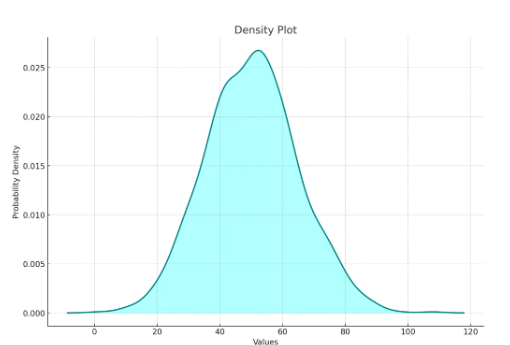

<br>  

---  

<br>


####  **Visualisierung von Wahrscheinlichkeitsdichte**
<br>

Ein Dichte-Plot zeigt die **Wahrscheinlichkeitsdichte** –  
also, wie wahrscheinlich es ist, dass Werte in einem bestimmten Bereich vorkommen.  

**Wichtige Punkte:**
- Die **Fläche unter der Kurve ergibt 1**, was bedeutet, dass sie eine Wahrscheinlichkeitsverteilung darstellt.  
- Sie zeigt **nicht die Wahrscheinlichkeit eines einzelnen Wertes** (da stetige Daten unendlich viele Möglichkeiten haben).  
- **Je höher der Peak**, desto mehr Werte liegen in diesem Bereich – also desto wahrscheinlicher ist es, in diesem Intervall Daten zu finden.

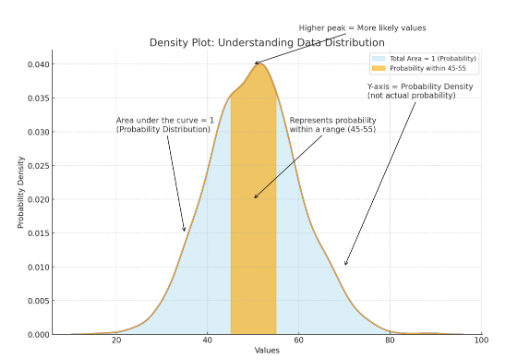

Die hellblaue Fläche stellt die **Gesamtwahrscheinlichkeit** dar (Fläche = 1).  
Die orange Fläche zeigt die **Wahrscheinlichkeit für einen bestimmten Bereich** (z. B. 45–55).  
Die **Y-Achse** zeigt die Dichte, nicht die tatsächliche Wahrscheinlichkeit.  
Annotationen helfen, wichtige Erkenntnisse hervorzuheben und die Verteilung zu interpretieren.

<br>  

---  

<br>


####  **Fallbeispiel: Größenverteilung von Mädchen in einer Schulklasse**
<br>

Stell dir vor, eine Lehrerin möchte die **Größenverteilung der Mädchen** in ihrer Klasse analysieren.  
Sie misst die Körpergröße von 30 Schülerinnen sehr genau, um zu sehen,  
ob die meisten ähnlich groß sind oder ob es große Unterschiede gibt.

Zur Analyse verwendet sie einen **Dichte-Plot**,  
der zeigt, wie sich die Größen innerhalb der Klasse verteilen.  
Im Gegensatz zum Histogramm nutzt dieser eine **geglättete Kurve**,  
die Muster und Tendenzen besser sichtbar macht.

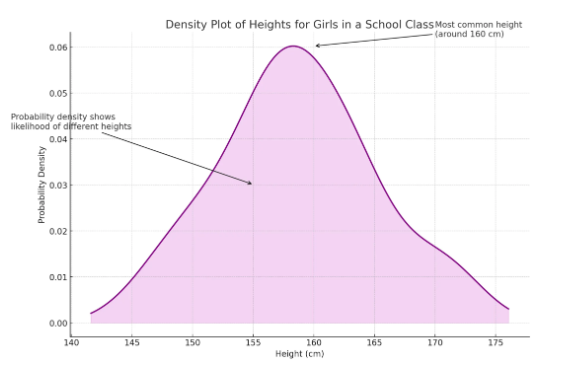

**Erkenntnisse aus dem Plot:**
- Der höchste Punkt liegt bei etwa **160 cm** → häufigste Körpergröße.  
- Die meisten Schülerinnen liegen zwischen **155 cm und 165 cm**.  
- Die **Breite der Kurve** zeigt die Streuung:  
  gleichmäßiger Abfall links und rechts → einige kleinere, einige größere Mädchen.

<br>  

---  

<br>


####  **Theoretische Wahrscheinlichkeitsverteilung vs. Dichte-Plot**
<br>

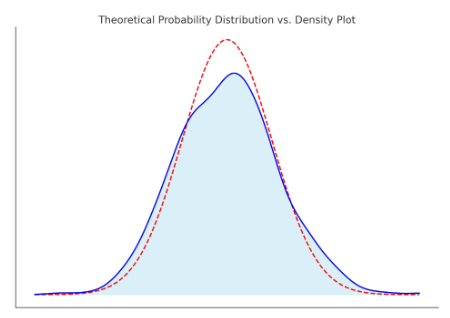

**Theoretische Wahrscheinlichkeitsverteilung – vor der Datenerhebung**  
- Beschreibt **mathematisch**, wie sich eine Variable vermutlich verhält.  
- Beispiel: Körpergrößen sind **normalverteilt** (glockenförmig).  
- Diese Annahme basiert auf **Vorwissen oder mathematischen Modellen**.  
- Bei Größen ist das üblich, da menschliches Wachstum um einen Durchschnitt streut.

**Dichte-Plot – nach der Datenerhebung**  
- Basierend auf **echten Messwerten**.  
- Schätzt die tatsächliche Verteilung und zeigt,  
  wie gut sie mit der theoretischen Erwartung übereinstimmt.  
- Beide können sich ähneln (z. B. glockenförmig)  
  – oder deutliche Abweichungen wie **Schiefe** oder **Ausreißer** aufzeigen.

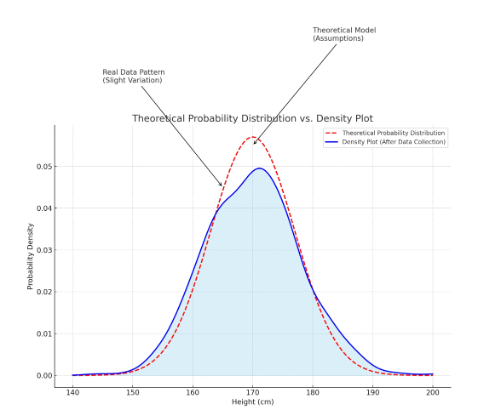


<br>  

---  

<br>


#### **Dichte-Plots mit Python**

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

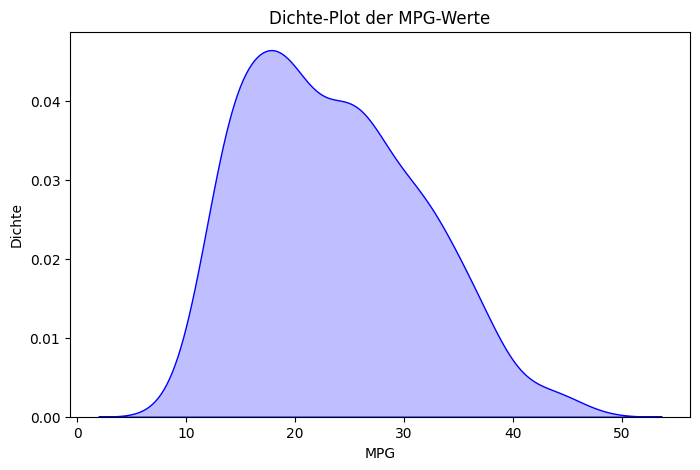

In [ ]:
# Datensatz laden
df = sns.load_dataset("mpg")

# Zeige die ersten Zeilen des Datensatzes
display(df.head())

# Wähle die Spalte 'mpg' aus und entferne fehlende Werte
daten = df['mpg'].dropna()

# Erstelle eine Abbildung und lege die Größe fest
plt.figure(figsize=(8, 5))

# Erstelle einen Dichte-Plot (Kernel Density Estimation)
sns.kdeplot(
    x=daten,
    bw_adjust=1,
    color='blue',
    fill='true'
)

# Beschrifte Achsen und füge einen Titel hinzu
plt.xlabel("MPG")
plt.ylabel("Dichte")
plt.title("Dichte-Plot der MPG-Werte")

# Zeige den Plot an
plt.show()

### **Dichtediagramm - Übung**

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

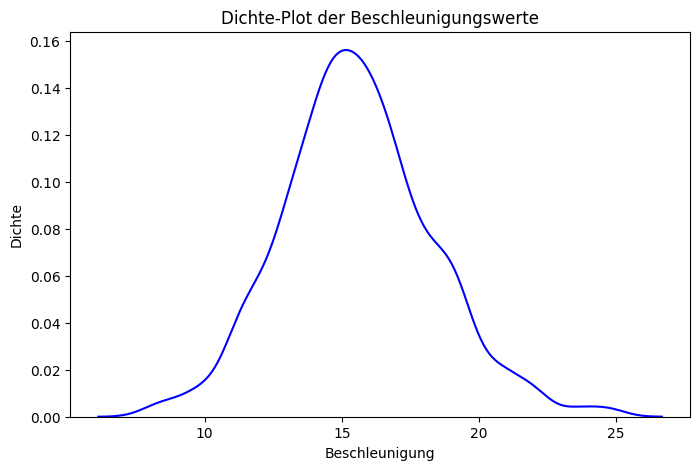

In [ ]:
# Übung 1

# Er ist bereits eingelesen und in der Variable df gespeichert.
# Vervollständige die fehlenden Teile des Codes, um einen Dichte-Plot
# für die Spalte acceleration zu erstellen.

# Datensatz laden
df = sns.load_dataset("mpg")

# Zeige die ersten fünf Zeilen des Datensatzes an
display(df.head())


# Wähle die Spalte 'acceleration' aus und entferne fehlende Werte
daten = df['acceleration'].dropna()


# Erstelle eine Abbildung und lege die Größe fest
plt.figure(figsize=(8, 5))


# Erstelle einen Dichte-Plot mit Seaborn
sns.kdeplot(
    x=daten,
    bw_adjust=0.75,
    color='blue'
)

# Beschrifte Achsen und füge einen Titel hinzu
plt.xlabel("Beschleunigung")
plt.ylabel("Dichte")
plt.title("Dichte-Plot der Beschleunigungswerte")

# Zeige den Plot an
plt.show()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

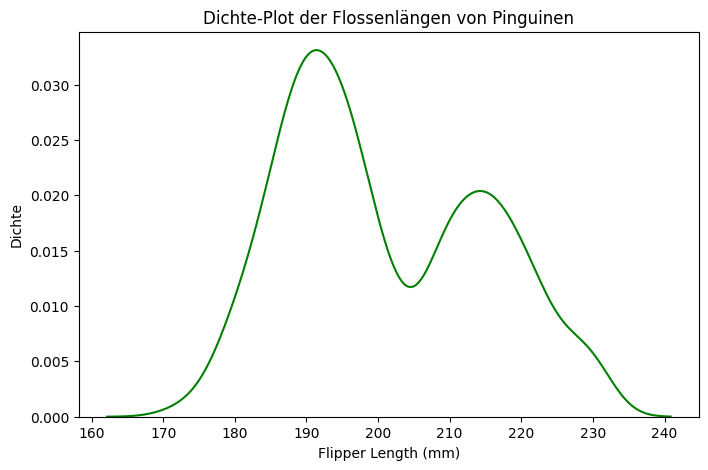

In [ ]:
# Übung 2

# Er ist bereits eingelesen und in der Variable df gespeichert.
# Vervollständige die fehlenden Teile des Codes, um einen Dichte-Plot
# für die Spalte flipper_length_mm zu erstellen.

# Datensatz laden
df = sns.load_dataset("penguins")

# Zeige die ersten fünf Zeilen des Datensatzes an
display(df.head())


# Wähle die Spalte 'flipper_length_mm' aus und entferne fehlende Werte
daten = df['flipper_length_mm'].dropna()


# Erstelle eine Abbildung und lege die Größe fest
plt.figure(figsize=(8, 5))


# Erstelle einen Dichte-Plot mit Seaborn
sns.kdeplot(
    x=daten,
    bw_adjust=0.75,
    color="green"
)

# Beschrifte Achsen und füge einen Titel hinzu
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Dichte")
plt.title("Dichte-Plot der Flossenlängen von Pinguinen")

# Zeige den Plot an
plt.show()

#### ❓ **Schnellfragen Übung**

<br>

<details>
<summary><b>Was zeigt ein Dichte-Plot, was ein Histogramm nicht zeigt?</b></summary>

✅ **Antwort:**  
Ein Dichte-Plot zeigt eine **geglättete Kurve**, die die Verteilung der Daten darstellt.  
Dadurch lassen sich **Form, Muster und Trends** besser erkennen  
als bei den diskreten Balken eines Histogramms.  

</details>
<br>

---

<br>


<details>
<summary><b>Was bedeutet der Parameter <code>bw_adjust</code>?</b></summary>

✅ **Antwort:**  
Der Parameter `bw_adjust` steuert die **Glättung der Dichtekurve**.  
Ein **niedriger Wert** macht die Kurve empfindlicher für kleine Schwankungen,  
ein **höherer Wert** glättet sie stärker.  

</details>

<br>

---

<br>

<details>
<summary><b>Warum wird <code>dropna()</code> vor dem Plotten der Daten verwendet?</b></summary>

✅ **Antwort:**  
`dropna()` entfernt **fehlende Werte (NaN)** aus dem Datensatz,  
damit der Dichte-Plot **nicht durch unvollständige Daten verfälscht** wird.  

</details>

<br>

---

<br>

<details>
<summary><b>Was stellt die Fläche unter der Dichtekurve dar?</b></summary>

✅ **Antwort:**  
Die Fläche unter der Dichtekurve ergibt immer **1**  
und repräsentiert damit die **Wahrscheinlichkeitsverteilung** der Daten.  

</details>

<br>  
---  
<br>


### **Boxplots**

####  **Was ist ein Boxplot**
<br>

Ein **Boxplot**, auch bekannt als *Box-and-Whisker-Plot*, ist eine **grafische Darstellung der Verteilung** einer kontinuierlichen Zufallsvariablen.  
Er wird verwendet, um **numerische Daten mit sinnvoller Ordnung und Skala** zusammenzufassen.

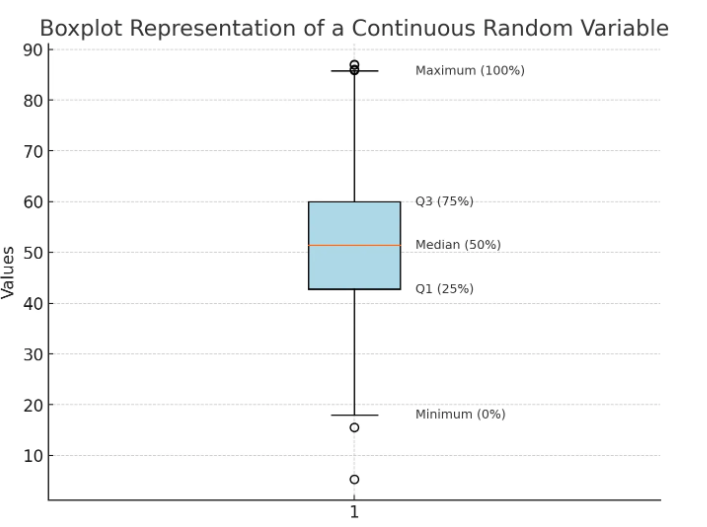

<br>  

---  

<br>


####  **Interpretation der Elemente eines Boxplots**
<br>

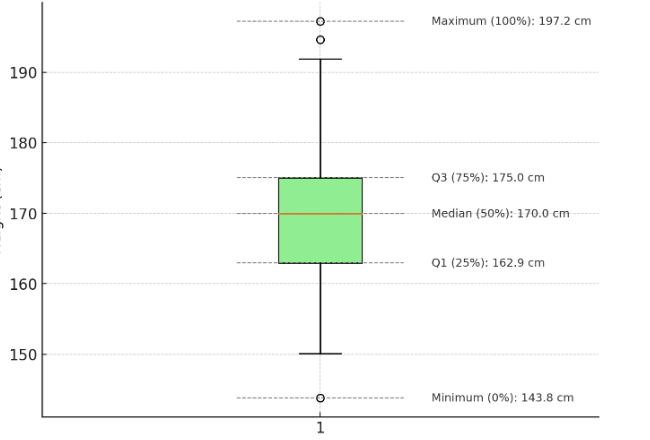

**Minimum (0 %) – ~143,8 cm:**  
Der Mindestwert stellt die kleinste beobachtete Körpergröße im Datensatz dar.  
Er liegt unterhalb des unteren Whiskers – ein Hinweis darauf, dass dieser Wert deutlich kleiner ist als der Rest der Daten.  

**Erstes Quartil (Q1 – 25 %) – ~162 cm:**  
Das erste Quartil markiert das 25. Perzentil, also den Wert, unterhalb dessen 25 % der Personen liegen.  

**Median (50 %) – ~170 cm:**  
Der Median (Q2) ist der Zentralwert – 50 % der Werte liegen darunter, 50 % darüber.  

**Drittes Quartil (Q3 – 75 %) – ~175 cm:**  
Das dritte Quartil steht für das 75. Perzentil, bis zu dem 75 % der Daten reichen.  

**Maximum (100 %) – ~201,9 cm:**  
Der Höchstwert ist die größte beobachtete Körpergröße im Datensatz – ebenfalls ein Ausreißer.  
Er liegt oberhalb des oberen Whiskers und ist damit ungewöhnlich hoch im Vergleich zum restlichen Datensatz.  

<br>  

---  

<br>


####  **Whisker und Ausreißer**
<br>

Die Idee hinter Whiskern und Ausreißern im Boxplot ist zu zeigen, **wie sich Daten um ihre zentralen Werte verteilen**.  

Die Box fasst die **mittleren 50 % der Werte** zusammen, während die Whisker den typischen Bereich darüber hinaus anzeigen.  
Werte, die extrem weit vom Rest abweichen, gelten als **Ausreißer**.  
Diese können auf **seltene Ereignisse, Messfehler oder natürliche Extreme** hinweisen.  

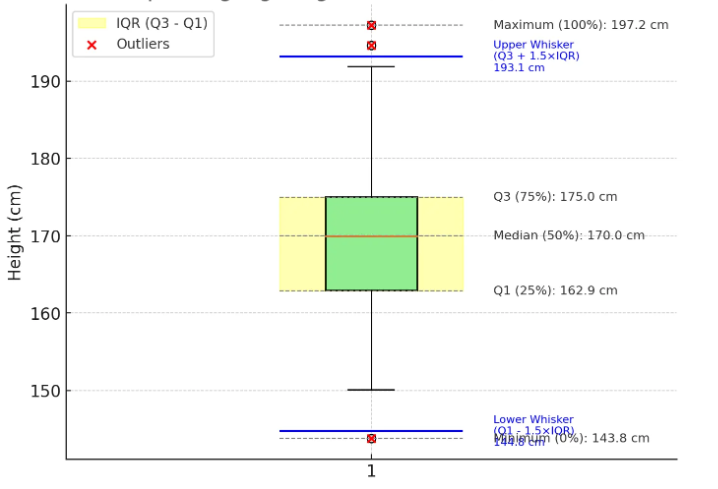

Im Fall des Körpergrößen-Datensatzes zeigt der Boxplot mehrere Ausreißer am unteren und oberen Ende der Verteilung:  
- **Untere Ausreißer:** z. B. ~143,8 cm → deutlich kleiner als der Durchschnitt.  
- **Obere Ausreißer:** z. B. ~197,2 cm → besonders große Personen.  

Solche Ausreißer zu identifizieren, hilft, die **Vielfalt der Daten zu verstehen**,  
**Anomalien zu erkennen** und **interessante Extremfälle** zu analysieren.

<br>  

---  

<br>


####  **Wie entstehen Whisker**
<br>

**1️⃣ Berechnung der Interquartilsdifferenz (IQR):**  
Die IQR ist der Abstand zwischen dem ersten (Q1) und dem dritten (Q3) Quartil:  
`IQR = Q3 − Q1`  
→ Sie repräsentiert die mittleren 50 % der Daten.  

**2️⃣ Grenzen für die Whisker berechnen:**  
- **Unterer Whisker:**  
  `Untere Grenze = Q1 − 1,5 × IQR`  
  → Werte darunter gelten als Ausreißer.  
- **Oberer Whisker:**  
  `Obere Grenze = Q3 + 1,5 × IQR`  
  → Werte darüber gelten ebenfalls als Ausreißer.  

**3️⃣ Whisker erweitern:**  
Die Whisker reichen nicht immer bis zum Minimum oder Maximum.  
- Der untere Whisker endet beim **kleinsten Wert ≥ untere Grenze**.  
- Der obere Whisker endet beim **größten Wert ≤ obere Grenze**.  

<br>  

---  

<br>


####  **Wie werden Ausreißer identifiziert**
<br>

Ausreißer sind Werte, die **außerhalb des Whisker-Bereichs** liegen.  
Sie gelten als **ungewöhnlich oder extrem** im Vergleich zum restlichen Datensatz.  

**Untere Ausreißer:**  
Wenn Wert < Q1 − 1,5 × IQR  

**Obere Ausreißer:**  
Wenn Wert > Q3 + 1,5 × IQR  

<br>  

---  

<br>


####  **Warum sind Ausreißer wichtig**
<br>

Ausreißer können auf unterschiedliche Dinge hinweisen:  
- **Fehler** bei der Dateneingabe oder Messung  
- **Natürliche Streuung** innerhalb der Daten (z. B. extrem große Menschen)  
- **Bedeutsame Phänomene**, die genauer untersucht werden sollten – etwa in Wissenschaft oder Finanzanalysen  

<br>  

---  

<br>


#### **Boxplot mit Python**

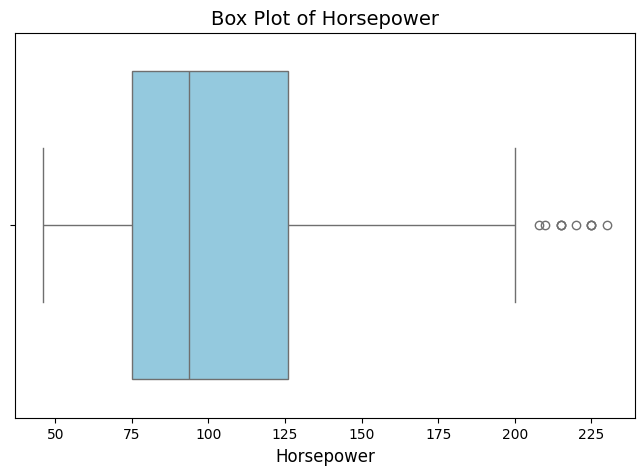

In [ ]:
# Datensatz laden
mpg_data = sns.load_dataset("mpg")

# Spalte wählen
data = mpg_data["horsepower"]

# Abbildung erstellen
plt.figure(figsize=(8, 5))

# Boxplot zeichnen
sns.boxplot(
    x=data,
    color="skyblue"
    )

# Titel erstellen
plt.title(f"Box Plot of Horsepower", fontsize=14)

# Achsenbeschriftung erstellen
plt.xlabel('Horsepower', fontsize=12)

# Plot anzeigen
plt.show()

### **Boxplots - Übung**

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


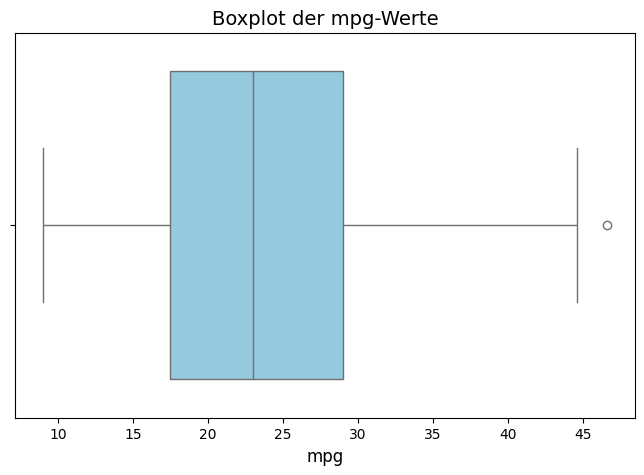

In [ ]:
# Übung 1

# Du arbeitest mit dem mpg-Datensatz. Er wurde bereits eingelesen und in der
# Variable mpg_data gespeichert. Vervollständige die fehlenden Teile im Code,
# um ein Boxplot für die Spalte mpg (miles per gallon) zu erstellen.

# Datensatz laden
mpg_data = sns.load_dataset("mpg")

# Zeige die ersten fünf Zeilen des Datensatzes an
print(mpg_data.head())
# 🔹 Fülle die fehlende Funktion aus, um die ersten fünf Zeilen anzuzeigen (head)

# Wähle die Spalte 'mpg' für die Analyse aus
column_name = "mpg"
data = mpg_data[column_name]
# 🔹 Fülle den Spaltennamen aus, um die Daten zu extrahieren ('mpg')

# Erstelle eine Abbildung für den Boxplot
plt.figure(figsize=(8, 5))
# 🔹 Fülle Breite und Höhe ein (z. B. 8, 5)

# Erstelle den Boxplot
sns.boxplot(
    x=data,
    color="skyblue"
)
# 🔹 Fülle die fehlende Seaborn-Funktion aus (boxplot)

# Füge Titel und Achsenbeschriftung hinzu
plt.title(f"Boxplot der {column_name}-Werte", fontsize=14)
plt.xlabel('mpg', fontsize=12)
# 🔹 Fülle die fehlende Variable aus, um die x-Achse zu beschriften (column_name)

# Zeige den Plot an
plt.show()
# 🔹 Fülle die fehlende Funktion zum Anzeigen des Plots aus (show)



/tmp/ipython-input-2319514152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


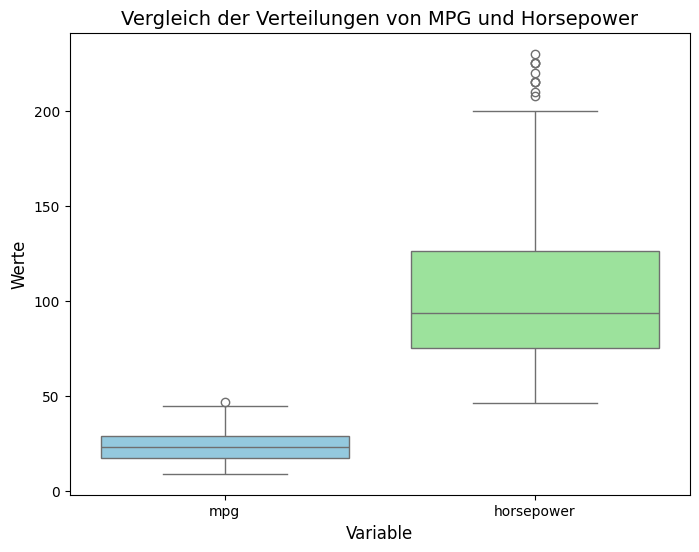

In [ ]:
# Übung 2

# Für denselben mpg-Datensatz, gespeichert in der Variable mpg_data, sollst du
# zwei Boxplots erstellen: einen für mpg (miles per gallon) und einen für
# horsepower, und dann die Verteilungen nebeneinander vergleichen.

# Datensatz laden
mpg_data = sns.load_dataset("mpg")

# Erstelle einen DataFrame mit den beiden Spalten und einer Kategorie
boxplot_data = mpg_data[["mpg", "horsepower"]].melt(var_name="Variable", value_name="Wert")

# Abbildung erstellen
plt.figure(figsize=(8, 6))

# Boxplots nebeneinander darstellen
sns.boxplot(
    x="Variable",
    y="Wert",
    data=boxplot_data,
    palette=["skyblue", "lightgreen"]
)

# Titel und Beschriftungen hinzufügen
plt.title("Vergleich der Verteilungen von MPG und Horsepower", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Werte", fontsize=12)

# Plot anzeigen
plt.show()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


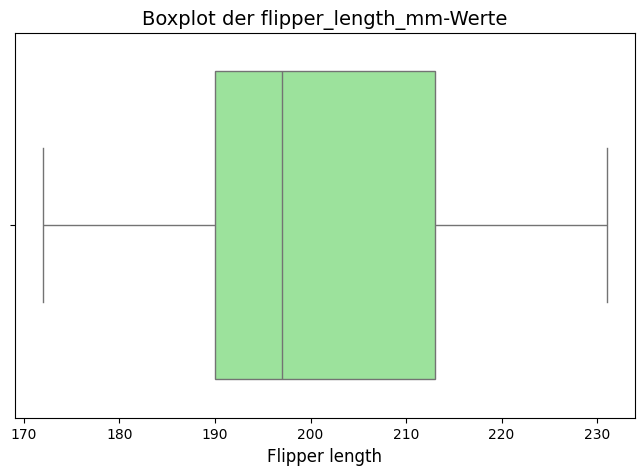

In [ ]:
# Übung 3

# Du arbeitest mit dem Penguins-Datensatz. Er wurde bereits eingelesen und in
# der Variable penguins_data gespeichert. Vervollständige die fehlenden Teile
# im Code, um ein Boxplot für die Spalte flipper_length_mm zu erstellen.

# Datensatz laden
penguins_data = sns.load_dataset("penguins")

# Zeige die ersten Zeilen des Datensatzes an
print(penguins_data.head())
# 🔹 Fülle die fehlende Funktion aus, um die ersten Zeilen anzuzeigen (head)

# Wähle die Spalte 'flipper_length_mm' für die Analyse aus
column_name = "flipper_length_mm"
data = penguins_data[column_name]
# 🔹 Fülle den Spaltennamen aus, um die Daten zu extrahieren ('flipper_length_mm')

# Erstelle eine Abbildung für den Boxplot
plt.figure(figsize=(8, 5))
# 🔹 Fülle Breite und Höhe ein (z. B. 8, 5)

# Erstelle den Boxplot
sns.boxplot(
    x=data,
    color="lightgreen"
)
# 🔹 Fülle die fehlende Seaborn-Funktion aus (boxplot)

# Füge Titel und Achsenbeschriftung hinzu
plt.title(f"Boxplot der {column_name}-Werte", fontsize=14)
plt.xlabel('Flipper length', fontsize=12)
# 🔹 Fülle die fehlende Variable aus, um die x-Achse zu beschriften (column_name)

# Zeige den Plot an
plt.show()
# 🔹 Fülle die fehlende Funktion zum Anzeigen des Plots aus (show)




#### ❓ **Schnellfragen Übung**

<details>
<summary><b>Was stellt die Box in einem Boxplot dar?</b></summary>

✅ **Antwort:**  
Die Box stellt den **Interquartilsabstand (IQR)** dar,  
der die **mittleren 50 % der Daten** zwischen dem ersten Quartil (Q1)  
und dem dritten Quartil (Q3) enthält.  

</details>

---

<details>
<summary><b>Was zeigt die Linie innerhalb der Box an?</b></summary>

✅ **Antwort:**  
Die Linie innerhalb der Box markiert den **Median (Q2)** des Datensatzes,  
also den zentralen Wert, wenn die Daten der Größe nach geordnet sind.  

</details>

---

<details>
<summary><b>Was sind die „Whiskers“ in einem Boxplot?</b></summary>

✅ **Antwort:**  
Die Whiskers reichen von der Box bis zu den **Minimal- und Maximalwerten** der Daten (ohne Ausreißer).  
Sie zeigen die **Spannweite der Daten außerhalb des IQRs**.  

</details>

---

<details>
<summary><b>Wie werden Ausreißer in einem Boxplot identifiziert?</b></summary>

✅ **Antwort:**  
Ausreißer sind Datenpunkte, die **mehr als das 1,5-Fache des IQRs**  
über dem dritten oder unter dem ersten Quartil liegen.  
Sie werden als **einzelne Punkte außerhalb der Whiskers** dargestellt.  

</details>

<br>  

---  
<br>



### **Violin Plots**

#### **Was sind Violin-Plots**
<br>

Ein **Violin-Plot** ist eine Datenvisualisierung, die **Aspekte eines Boxplots mit einem Kernel-Dichte-Schätzer (KDE)** kombiniert.  
Während ein Boxplot die Verteilung eines Datensatzes durch **Quartile, Median und Whisker** zusammenfasst,  
ergänzt der Violin-Plot dies durch eine **gespiegelte Dichtekurve**, die die vollständige Verteilungsdichte zeigt.  

So erhält man ein **tieferes Verständnis der Datenverteilung** – über einfache Zusammenfassungsstatistiken hinaus.


<br>  

---  

<br>


#### **Für welche Variablentypen eignen sich Violin-Plots**
<br>

Violin-Plots sind ausgelegt für:

**Kontinuierliche Variablen:**  
Ideal für numerische Daten wie Verkaufszahlen, Kundenbewertungen, Preise oder Gehälter.  
Sie zeigen die **Dichteverteilung besonders effektiv** für kontinuierliche Daten.

**Kategoriale Variablen (zur Gruppierung):**  
Eignen sich, um kontinuierliche Daten **über verschiedene Kategorien hinweg zu vergleichen**  
(z. B. Umsatz nach Region, Bewertungen nach Abteilung).  
Die Kategorien werden auf einer Achse abgebildet, während die Verteilung der Werte entlang der anderen Achse dargestellt wird.

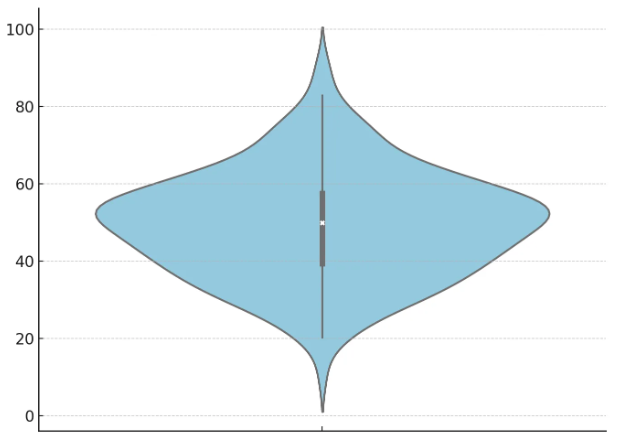

<br>  

---  

<br>


####  **Bestandteile eines Violin-Plots**
<br>

Ein Violin-Plot besteht aus mehreren zentralen Elementen:

**🎼 Dichteform (Violin-Körper):**  
Die Breite des Plots an einer bestimmten Stelle zeigt die **Dichte der Daten** an diesem Wert.  
Breitere Bereiche bedeuten eine höhere Konzentration von Datenpunkten.

**⚪ Median (weißer Punkt):**  
Ein kleiner Punkt im Inneren der Violine zeigt den Median (50. Perzentilwert).

**📦 Interquartilsabstand (IQR – Box):**  
Eine Box innerhalb der Violine markiert den Bereich zwischen dem 1. (Q1) und 3. Quartil (Q3)  
und repräsentiert die **mittleren 50 % der Daten**.

**〰️ Whisker:**  
Linien, die von der Box ausgehen und die Datenbereiche außerhalb des IQR anzeigen – **ohne Ausreißer**.

**🔹 Ausreißer:**  
Einzelne Punkte außerhalb der Whisker, die besonders hohe oder niedrige Werte darstellen.

<br>  

---  

<br>


####  **Violin-Plots in der univariaten Analyse**
<br>

In der univariaten Analyse wird jeweils **eine Variable** untersucht, um ihre **Verteilung, zentrale Tendenz und Streuung** zu verstehen.  
Violin-Plots sind hier besonders hilfreich, da sie:

- die **vollständige Verteilung** zeigen (nicht nur Quartile, sondern auch Dichte)  
- **Muster** aufdecken – z. B. ob die Daten **bimodal** oder **schief verteilt** sind  
- **Ausreißer** deutlich machen  
- **Vergleiche zwischen Gruppen** ermöglichen  

<br>  

---  

<br>


####  **Vergleich mehrerer Violin-Plots**
<br>

Der folgende Plot hilft dabei zu verstehen, **wie sich Verkaufszahlen zwischen verschiedenen Kategorien unterscheiden**.  
Er zeigt nicht nur die **zentrale Tendenz (Median)**, sondern auch die **Verteilung, Streuung (IQR)** und **Ausreißer**.

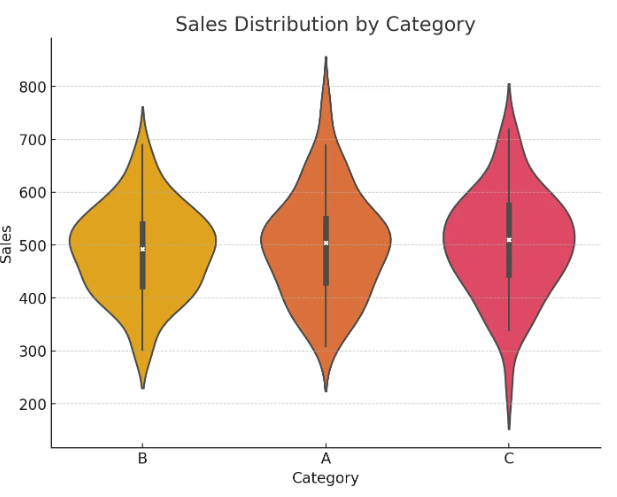

🤓 **Analyse der Bestandteile:**

**🎼 Dichteform:**  
- Kategorie B → breitere Form → mehr Streuung und Variabilität  
- Kategorie A → enge Form um 500 → gleichmäßige Werte  
- Kategorie C → breiteste Verteilung → größte Streuung  

**⚪ Median:**  
- Kategorie A → ca. 500  
- Kategorie B → etwas niedriger  
- Kategorie C → ca. 550  

**📦 IQR (Box):**  
- Kategorie A → enger Bereich (geringe Streuung)  
- Kategorie B → größerer IQR  
- Kategorie C → am breitesten (hohe Variabilität)

**〰️ Whisker:**  
- A: kurze → wenige Extremwerte  
- B: längere → mehr Streuung  
- C: längste → große Spannweite  

**🔹 Ausreißer:**  
- Kategorie A → längerer schmaler Ausläufer oben → hohe Werte oder Ausreißer  
- Kategorie B/C → kompakter → weniger extreme Werte

<br>  

---  
<br>



#### **Violin-Plot mit Python erstellen**

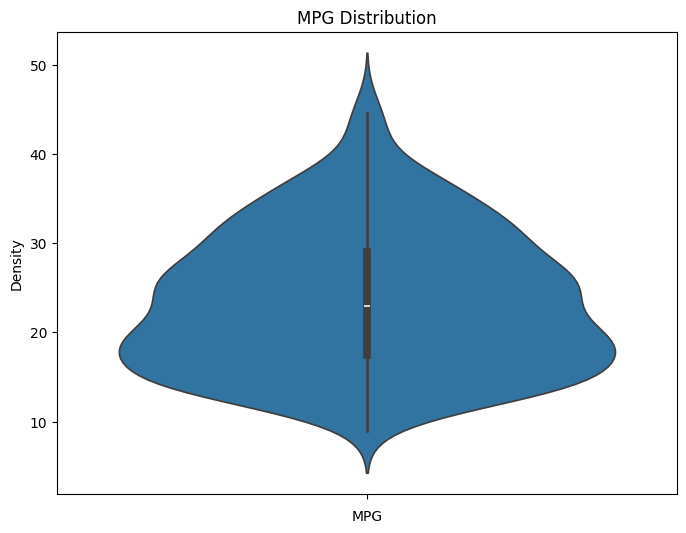

In [ ]:
# 1. Notwendige Bibliotheken importieren
#     -->Bereits erledigt

# 2. Das mpg-Datenset laden
mpg_data = sns.load_dataset('mpg')

# 3. Erste Zeilen des Datensatzes anzeigen
mpg_data.head()

# 4. Violin-Plot für die Spalte mpg erstellen
plt.figure(figsize=(8, 6))
sns.violinplot(data=mpg_data['mpg'])

# 5. Titel und Achsenbeschriftungen hinzufügen
plt.title('MPG Distribution')
plt.xlabel('MPG')
plt.ylabel('Density')

# 6.   Plot anzeigen
plt.show()

### **Violin Plots - Übung**

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


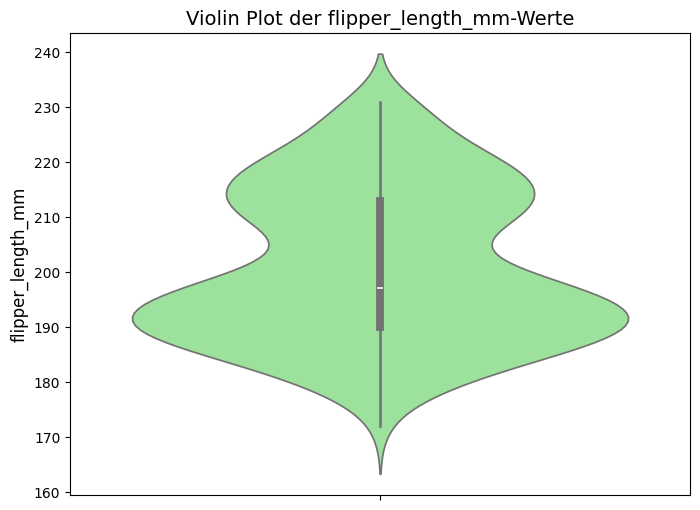

In [ ]:
# Übung 1

# Du arbeitest mit einem Datensatz, der in der Variable penguins_data
# gespeichert ist. Erstelle ein Violinplot für die Spalte flipper_length_mm.

# Datensatz laden
penguins_data = sns.load_dataset("penguins")

# Zeige die ersten Zeilen des Datensatzes an
print(penguins_data.head())
# 🔹 Zeigt die ersten fünf Zeilen an, um einen Überblick über den Datensatz zu erhalten

# Wähle die Spalte 'flipper_length_mm' für die Analyse aus
column_name = "flipper_length_mm"
data = penguins_data[column_name]
# 🔹 Fülle die Spalte ein ('flipper_length_mm'), um die Werte zu extrahieren

# Erstelle den Violin-Plot
plt.figure(figsize=(8, 6))
# 🔹 Lege Breite und Höhe der Abbildung fest

sns.violinplot(
    y=data,
    color="lightgreen"
)
# 🔹 Fülle die fehlende Seaborn-Funktion aus (violinplot), um den Plot zu erstellen

# Füge Titel und Achsenbeschriftung hinzu
plt.title(f"Violin Plot der {column_name}-Werte", fontsize=14)
plt.ylabel(column_name, fontsize=12)
# 🔹 Beschriftet die y-Achse mit dem Spaltennamen

# Zeige den Plot an
plt.show()
# 🔹 Zeigt den Violin-Plot an

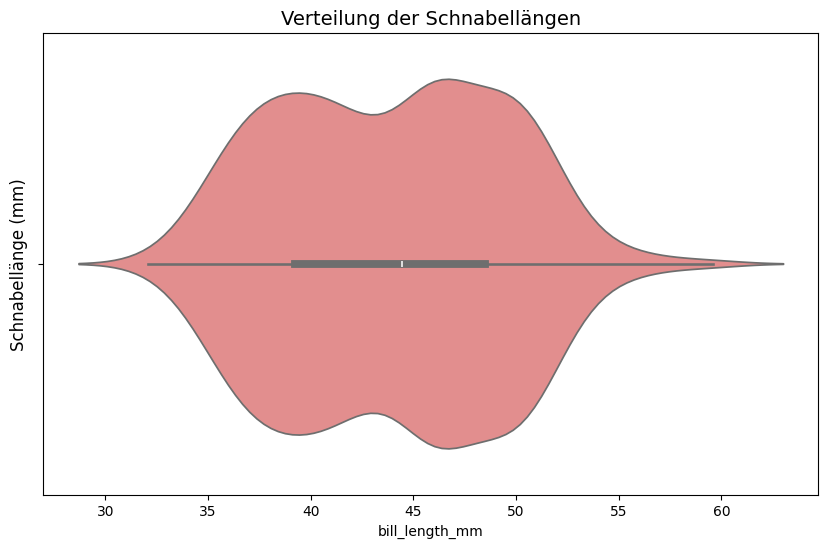

In [ ]:
# Übung 2

# Du arbeitest erneut mit dem Datensatz in der Variable penguins_data. Erstelle
# ein Violinplot für die Spalte bill_length_mm.

# Datensatz laden
penguins_data = sns.load_dataset("penguins")

# Erstelle eine Abbildung und lege die Größe fest
plt.figure(figsize=(10, 6))
# 🔹 Breite = 10, Höhe = 6

# Erstelle einen Violin-Plot für die Spalte 'bill_length_mm'
sns.violinplot(
    x=penguins_data["bill_length_mm"].dropna(),
    color="lightcoral"
)
# 🔹 Fülle den Datensatznamen (penguins_data) und die Spalte (bill_length_mm) ein

# Füge Titel und Achsenbeschriftungen hinzu
plt.title("Verteilung der Schnabellängen", fontsize=14)
plt.ylabel("Schnabellänge (mm)", fontsize=12)

# Zeige den Plot an
plt.show()
# 🔹 Zeigt den Violin-Plot an

#### ❓ **Schnellfragen Übung**

<details>
<summary><b>Was zeigt die Breite eines Violinplots an?</b></summary>

✅ **Antwort:**  
Die breiteren Bereiche des Violinplots zeigen eine **höhere Datendichte**,  
also Bereiche mit vielen Werten.  
Schmalere Bereiche stehen für **weniger Datenpunkte** in diesem Bereich.

</details>

---

<details>
<summary><b>Worin unterscheidet sich ein Violinplot von einem Boxplot?</b></summary>

✅ **Antwort:**  
Beide zeigen die **Datenverteilung**, aber ein Violinplot kombiniert die  
**glatte Dichteschätzung** (ähnlich einem gedrehten KDE-Plot) mit den  
**Boxplot-Elementen** und liefert dadurch **mehr Informationen über die Form der Verteilung**.

</details>

---

<details>
<summary><b>Wozu dient <code>dropna()</code> beim Auswählen der Daten?</b></summary>

✅ **Antwort:**  
<code>dropna()</code> wird verwendet, um **fehlende Werte (NaNs)** zu entfernen,  
damit der Violinplot die Daten **korrekt und unverzerrt** darstellt.

</details>

---

<details>
<summary><b>Können Violinplots Ausreißer darstellen?</b></summary>

✅ **Antwort:**  
Ja, Violinplots können **Ausreißer als einzelne Punkte** außerhalb der Hauptverteilung anzeigen,  
wenn man dies über den Parameter <code>inner</code> angibt (z. B. <code>inner="point"</code>).

</details>

---

<details>
<summary><b>Wie erkennt man multimodale Verteilungen in einem Violinplot?</b></summary>

✅ **Antwort:**  
Eine **multimodale Verteilung** zeigt sich durch **mehrere Spitzen oder Wölbungen** im Violinplot.  
Das weist darauf hin, dass es **mehrere Häufungspunkte (Moden)** in den Daten gibt.

</details>

<br>  

---  

<br>


### **Bar Plots**

####  **Balkendiagramme (Bar Plots)**

<br>

Ein **Balkendiagramm** (engl. *Bar Plot* oder *Bar Chart*) ist eine grafische Darstellung kategorialer Daten mit rechteckigen Balken.  
Die **Länge oder Höhe** eines Balkens ist **proportional zum Wert oder zur Häufigkeit** der Kategorie, die er darstellt.

<br>

**Hauptmerkmale eines Balkendiagramms:**

- **Kategorien (x-Achse):**  
  Die x-Achse zeigt die verschiedenen Kategorien (diskrete Werte), die miteinander verglichen werden.  
  Beispiele: Produkttypen, Regionen oder andere kategorische Variablen.

- **Werte (y-Achse):**  
  Die y-Achse zeigt die Werte oder Häufigkeiten, die den Kategorien zugeordnet sind,  
  z. B. Anzahl, Durchschnitt oder eine andere numerische Kennzahl.

- **Balken:**  
  Die Balken sind die zentralen visuellen Elemente.  
  Ihre Länge oder Höhe steht für den jeweiligen Wert der Kategorie.

💡 **Zweck:**  
Balkendiagramme eignen sich besonders gut, um **Werte zwischen verschiedenen Kategorien zu vergleichen.**

<br>

---

<br>

#### 📈 **Arten von Balkendiagrammen**

<br>

**Vertikales Balkendiagramm**

> Die Balken sind **vertikal ausgerichtet**.  
> Die x-Achse zeigt die Produkte (A bis E),  
> die y-Achse die entsprechenden Verkaufswerte (in Einheiten).

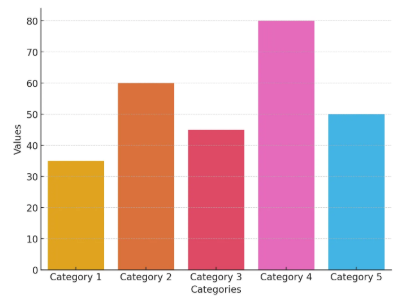

<br>

**Horizontales Balkendiagramm**

> Die Balken sind **horizontal ausgerichtet** –  
> ideal bei langen Kategorienamen oder wenn ein anderer Datenaspekt betont werden soll.  
> In diesem Fall stehen die Kategorien auf der **y-Achse**,  
> und die **x-Achse** zeigt die Werte, also z. B. Verkaufszahlen pro Produkt.


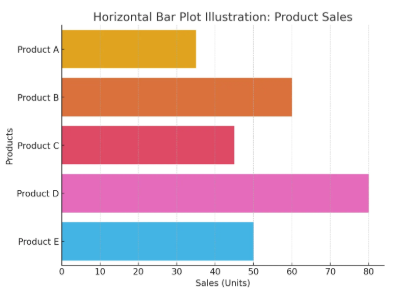


<br>

---

<br>


####  **Wofür werden Balkendiagramme verwendet?**

<br>

- **Vergleich von Kategorien:**  
  Balkendiagramme sind ideal, um Größenordnungen verschiedener Kategorien zu vergleichen –  
  z. B. Umsätze nach Regionen, Kundenzufriedenheit pro Produkt oder Monatsumsätze.

- **Darstellung von Häufigkeiten:**  
  Ein Balkendiagramm kann die Häufigkeit verschiedener Kategorien darstellen –  
  etwa, wie viele Personen in einer Umfrage welche Antwort gewählt haben.

- **Visualisierung von Mustern in kategorialen Daten:**  
  Auch wenn Balkendiagramme keine zeitlichen Trends zeigen (wie Liniendiagramme),  
  können sie dennoch aufzeigen, welche Kategorien dominieren oder besonders wichtig sind.

<br>

---

<br>


####  **Balkendiagramme in Python**

<br>

/tmp/ipython-input-115726799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species',
/tmp/ipython-input-115726799.py:14: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x='species',


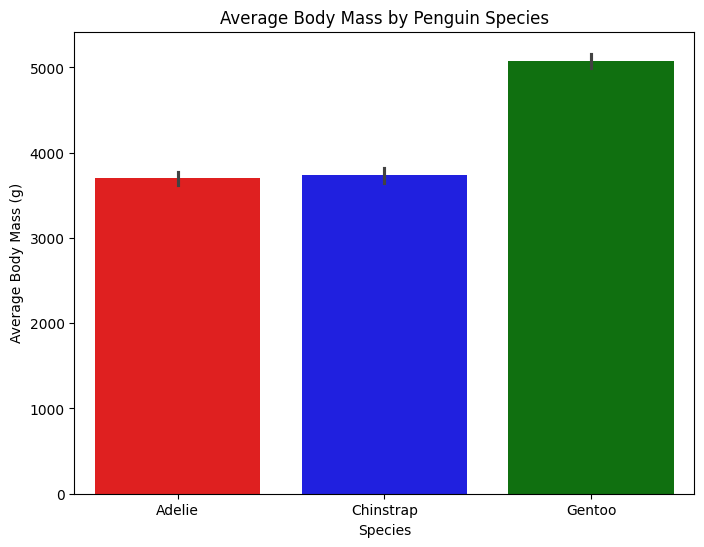

In [ ]:
# Bibliotheken importieren
#      bereits erledigt

# Datenset laden
penguins = sns.load_dataset('penguins')

# Figure erstellen
plt.figure(figsize=(8, 6))

# Manuell Farben pro Balken festlegen
colors = ['red', 'blue', 'green', 'orange']

# Plot erstellen
sns.barplot(x='species',
						y='body_mass_g',
						data=penguins,
						palette=colors
						)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Average Body Mass by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Average Body Mass (g)')

# Plot anzeigen
plt.show()

### **Bar Plots - Übung**

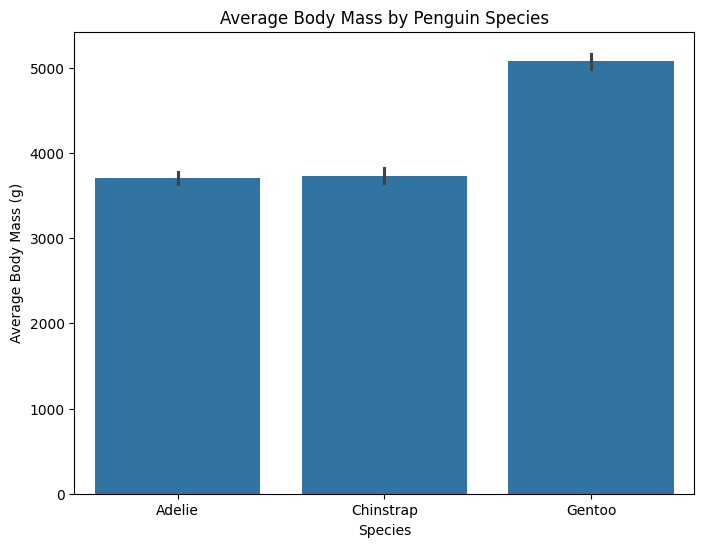

In [ ]:
# Übung 1

# Dir wird der penguins-Datensatz gegeben, der in der Variable penguins
# gespeichert ist.
# Erstelle ein Balkendiagramm (Bar Plot), das das durchschnittliche
# Körpergewicht der Pinguine nach Art (species) vergleicht.

# Datensatz laden
penguins = sns.load_dataset("penguins")

# Erstelle eine Abbildung für das Balkendiagramm
plt.figure(figsize=(8, 6))
# 🔹 Lege Breite und Höhe der Abbildung fest

# Plot erstellen
sns.barplot(x='species',
						y='body_mass_g',
						data=penguins
						)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Average Body Mass by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Average Body Mass (g)')
# 🔹 Ergänze den Diagrammtitel und die Achsenbeschriftungen

# Zeige das Diagramm an
plt.show()
# 🔹 Zeigt das Balkendiagramm

/tmp/ipython-input-1458511018.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1458511018.py:16: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


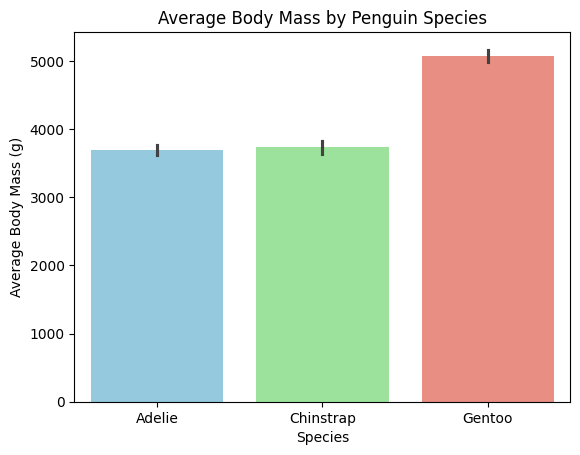

In [ ]:
# Übung 2

# Verwende erneut denselben penguins-Datensatz, der in der Variable penguins
# gespeichert ist.
# Erstelle ein Balkendiagramm (Bar Plot) mit individuell festgelegten Farben
# für jede Balkenkategorie.

# Datensatz laden
penguins = sns.load_dataset("penguins")

# Lege eigene Farben für die Balken fest
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']
# 🔹 Ergänze vier Farben (z. B. 'skyblue', 'lightgreen', 'salmon', 'orange')

# Erstelle das Balkendiagramm
sns.barplot(
    x='species',
    y='body_mass_g',
    data=penguins,
    palette=colors
)
# 🔹 Ergänze:
#    - Bibliotheksname: sns
#    - Funktion: barplot
#    - Palette: colors

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Average Body Mass by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Average Body Mass (g)')
# 🔹 Ergänze einen passenden Titel und Achsenbeschriftungen

# Zeige den Plot an
plt.show()
# 🔹 Zeigt das Balkendiagramm


#### ❓ **Schnellfragen Übung**

<details>
<summary><b>Welche Art von Daten eignet sich am besten für ein Balkendiagramm?</b></summary>

✅ **Antwort:**  
Balkendiagramme eignen sich am besten für **kategoriale Daten**  
(z. B. Produkttypen oder Pinguinarten)  
und werden verwendet, um die **Verteilung oder den Vergleich dieser Kategorien**  
gegenüber **numerischen Werten** darzustellen  
(z. B. Umsatz, Körpergewicht, Bewertungen).

</details>

<br>  

---  

<br>


### **Liniendiagramm**

####  **Liniendiagramm**

<br>

Ein **Liniendiagramm** (engl. *Line Chart*) ist eine Darstellungsform, um Datenpunkte auf einer **kontinuierlichen Skala** zu visualisieren.  
Diese Punkte werden durch Linien verbunden, wodurch Trends oder Muster im **Zeitverlauf** oder innerhalb kontinuierlicher Intervalle sichtbar werden.  

Liniendiagramme eignen sich besonders gut, um zu zeigen, **wie sich eine Variable in Abhängigkeit von einer anderen verändert** –  
typischerweise über die Zeit, aber auch über andere stetige Größen.

<br>

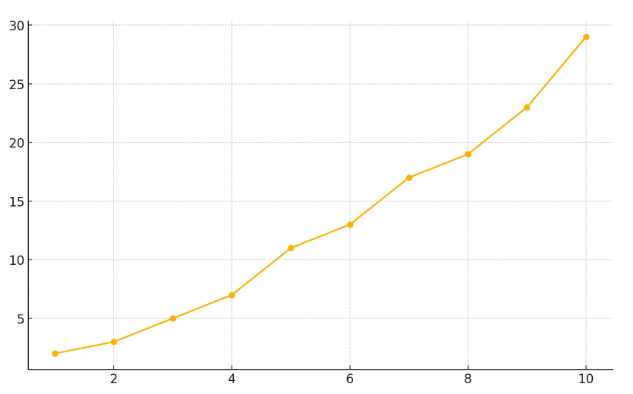

<br>


#### 🔹 **Wichtige Merkmale eines Liniendiagramms**

- **X-Achse:**  
  Repräsentiert meist die **unabhängige Variable** – z. B. Zeit, Entfernung oder eine andere kontinuierliche Größe.  
- **Y-Achse:**  
  Zeigt die **abhängige Variable** – also die Daten, die gemessen oder verfolgt werden (z. B. Umsatz, Temperatur oder Aktienkurs).  
- **Datenpunkte:**  
  Einzelne Beobachtungen, die als Punkte oder Marker dargestellt werden.  
- **Linie:**  
  Verbindet die Datenpunkte und zeigt den Verlauf oder Trend im Zeitverlauf oder über kontinuierliche Werte hinweg.

<br>

---

<br>

####  **Welche Daten eignen sich für Liniendiagramme?**

Liniendiagramme werden für **kontinuierliche Daten** verwendet,  
bei denen sowohl X- als auch Y-Werte sich **fließend verändern** – ohne abrupte Sprünge.  

Beispiele:
- Temperaturverlauf über Tage oder Monate  
- Aktienkurs im Zeitverlauf  
- Geschwindigkeit in Abhängigkeit von der Zeit  

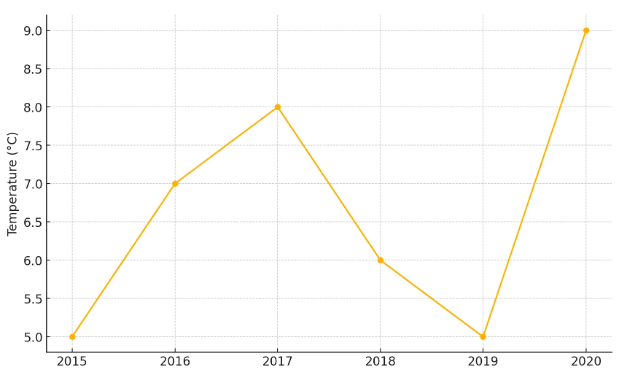

<br>

---

<br>

####  **Vorteile von Liniendiagrammen**

- **Visualisierung von Trends:**  
  Ideal, um Veränderungen und Muster im Zeitverlauf zu erkennen.  
- **Beziehungen sichtbar machen:**  
  Zeigt Abhängigkeiten zwischen Variablen, z. B. zeitliche oder kausale Zusammenhänge.  
- **Geglättete Darstellung:**  
  Die durchgehende Linie betont den fließenden Verlauf der Daten –  
  im Gegensatz zu den stufigen Balken eines Säulendiagramms.

<br>

---

<br>

####  **Beispiele für den Einsatz von Liniendiagrammen**

- Entwicklung eines **Aktienkurses** über Monate oder Jahre  
  → X-Achse = Zeit, Y-Achse = Kurswert  
- **Temperaturverlauf** über Stunden oder Tage  
  → Hilft, saisonale oder tageszeitliche Schwankungen zu erkennen  
- **Umsatzentwicklung** eines Produkts über mehrere Monate  
  → Macht Wachstums- und Abschwungphasen sichtbar  
- **Langfristige Trends** eines Unternehmens  
  → Zeigt Umsatzwachstum oder -rückgang über Jahre

<br>

---

<br>

####  **Liniendiagramm mit Python!**


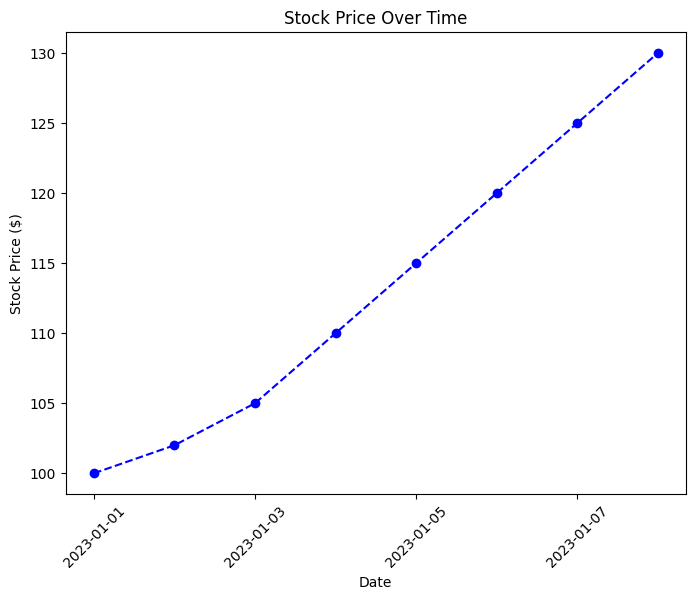

In [ ]:
# 1. Bibliotheken importieren
#   -> bereits erledigt

# 2. Beispiel-Daten: Zeitreihe für Aktienkurse
# (z. B. tägliche Kurse für einen Monat)
dates = pd.date_range('2023-01-01', periods=8, freq='D')
stock_prices = [100, 102, 105, 110, 115, 120, 125, 130]

# 3. DataFrame mit den Kursdaten erstellen
stock_data = pd.DataFrame({'Date': dates, 'Stock Price': stock_prices})

# 4. Plot-Größe definieren
plt.figure(figsize=(8, 6))

# 5. Daten als Linie visualisieren
plt.plot(
    stock_data['Date'],  # x-axis: Date column for the x-axis data
    stock_data['Stock Price'],  # y-axis: Stock Price column for the y-axis data
    linestyle='--',  # Line style: '--' represents a dashed line
    color='blue',  # Line color: 'blue' will color the line blue
    marker='o'  # Marker style: 'o' means each data point will be marked with a circle
)

# 6. Titel und Achsenbeschriftungen hinzufügen
plt.xticks(stock_data['Date'][::2], rotation=45)
# Show every second date and rotate labels for better visibility

# Adding title and labels
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

# Display the plot
plt.show()


### **Liniendiagramm - Übung**

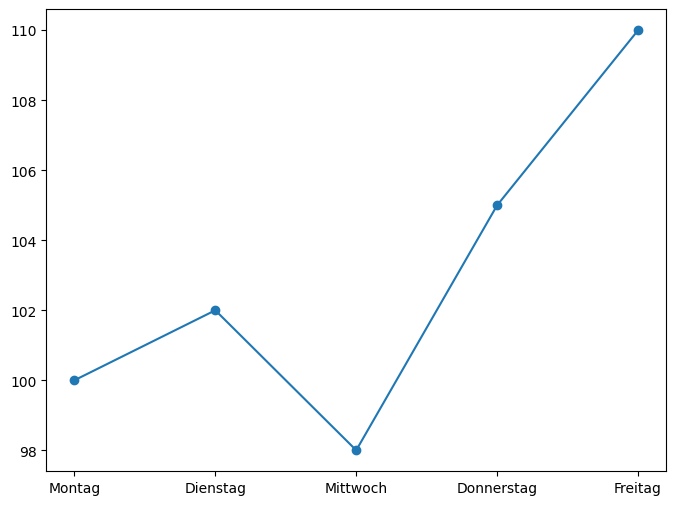

In [ ]:
# Übung 1

# Du arbeitest mit einem kleinen Datensatz, der in der Variable stock_data
# gespeichert ist. Er enthält zwei Spalten: 'Date' und 'Stock Price'. Erstelle
# ein einfaches Liniendiagramm, das die Veränderung des Aktienkurses über die
# Tage zeigt.

stock_data = pd.DataFrame({
     'Date': ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag'],
     'Stock Price': [100, 102, 98, 105, 110]
 })

# Step 1: Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(
    stock_data['Date'],
    stock_data['Stock Price'],
    marker='o'
)

# Step 2: Display the plot
plt.show()



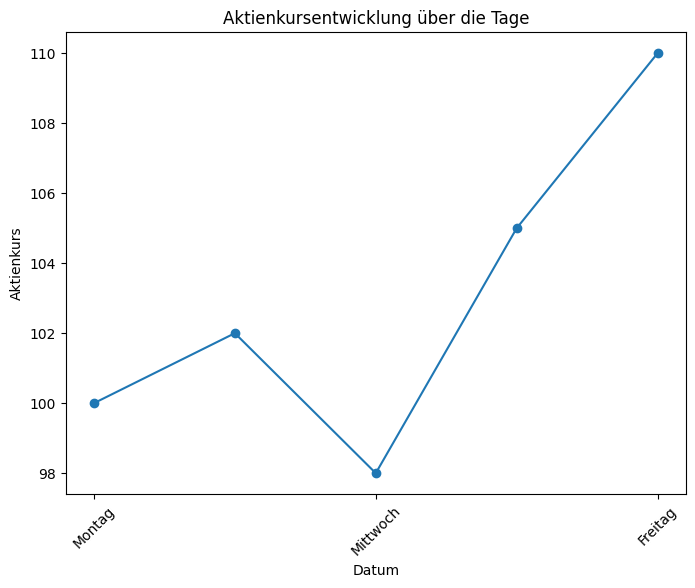

In [ ]:
# Übung 2

# Du arbeitest weiterhin mit demselben Datensatz. Erstelle nun ein
# Liniendiagramm mit Titel und Achsenbeschriftungen, das die Veränderung des
# Aktienkurses über die Tage zeigt.

# Erstelle ein Liniendiagramm
plt.figure(figsize=(8, 6))
# 🔹 Lege Breite und Höhe der Abbildung fest

plt.plot(
    stock_data['Date'],
    stock_data['Stock Price'],
    marker='o'
)
# 🔹 X-Achse: Datum ('Date')
# 🔹 Y-Achse: Aktienkurs ('Stock Price')

# Passe die X-Achsenbeschriftung an
plt.xticks(
    stock_data['Date'][::2],
    rotation=45
)
# 🔹 Zeigt nur jeden zweiten Tag auf der X-Achse und dreht die Beschriftung um 45°

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Aktienkursentwicklung über die Tage')
plt.xlabel('Datum')
plt.ylabel('Aktienkurs')

# Zeige das Diagramm an
plt.show()


#### ❓ **Schnellfragen Übung**

<details>
<summary><b>Was ist der Hauptzweck eines Liniendiagramms?</b></summary>

✅ **Antwort:**  
Ein Liniendiagramm wird verwendet, um **Trends, Muster oder Veränderungen von Daten**  
über die Zeit oder entlang anderer **kontinuierlicher Variablen** darzustellen.

</details>

---

<details>
<summary><b>Worin unterscheidet sich ein Liniendiagramm von einem Balkendiagramm?</b></summary>

✅ **Antwort:**  
Ein Liniendiagramm **verbindet Datenpunkte mit einer Linie**,  
wodurch **zeitliche Entwicklungen** deutlich sichtbar werden.  
Ein Balkendiagramm zeigt **diskrete Balken** und eignet sich besser zum **Vergleich von Kategorien**.

</details>

---

<details>
<summary><b>Wie helfen Liniendiagramme dabei, Trends zu erkennen?</b></summary>

✅ **Antwort:**  
Durch die **verbundene Linienform** lassen sich **steigende, fallende oder stabile Verläufe**  
über die Zeit hinweg leicht erkennen.

</details>

<br>  

---  

<br>


## **Bivariate Analyse in der EDA**

### **Einführung in die bivariate Analyse**

####  **Einführung in die bivariate Analyse**

<br>

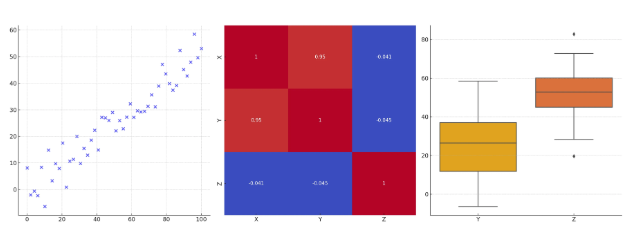

<br>

Die **bivariate Analyse** ist eine statistische Methode zur Untersuchung der **Beziehung zwischen zwei Variablen**.  
Sie hilft dabei, **Muster, Korrelationen und potenzielle Abhängigkeiten** zu erkennen und spielt eine zentrale Rolle beim Verständnis,  
wie zwei Variablen miteinander interagieren – unabhängig davon, ob sie **numerisch**, **kategorisch** oder **gemischt** sind.

<br>  

---  

<br>


####  **Warum ist die bivariate Analyse im Rahmen der EDA so wichtig?**

<br>

✅ **Erkennen starker Prädiktoren:**  
Die Analyse der Beziehung zwischen Merkmalen und der Zielvariablen zeigt,  
welche Variablen besonders relevant für ein Vorhersagemodell sind.  
Beispiel: Eine starke Verbindung zwischen **Werbeausgaben** und **Umsatz** weist auf hohe Modellrelevanz hin.

<br>

✅ **Erkennen redundanter Informationen:**  
Die bivariate Analyse hilft, **stark korrelierte unabhängige Variablen** zu identifizieren –  
so lassen sich redundante Features vermeiden, die durch **Multikollinearität** Probleme verursachen könnten.

<br>

✅ **Verständnis der Beziehungsart:**  
Ob die Beziehung zwischen Variablen **linear oder nicht-linear** ist,  
liefert Hinweise auf die **geeignete Modellwahl**  
(z. B. lineare Modelle bei linearen Zusammenhängen).

<br>

✅ **Interpretierbarkeit von Modellen:**  
Wenn man weiß, dass das **Alter** von Kund:innen mit deren **Kaufhäufigkeit** zusammenhängt,  
lässt sich das Verhalten in **Klassifikationsmodellen** leichter interpretieren.

<br>

✅ **Neue Feature-Ideen:**  
Bivariate Zusammenhänge können Hinweise auf **Interaktionseffekte** geben.  
Wenn etwa **Alter × Einkommen** ein Muster zeigt, kann ein **Interaktionsterm** im Modell die Prognose verbessern.

<br>

✅ **Hypothesenprüfung:**  
In der **Inferenzstatistik** wird die bivariate Analyse zur **Hypothesenprüfung** eingesetzt.  
Beispiel: Eine **ANOVA** kann zeigen, ob verschiedene **Marketingstrategien** signifikant unterschiedliche Umsätze erzeugen.

<br>  

---  

<br>


#### ❓ **Schnellfragen**

<br>

<details>
<summary><b>Was ist das Hauptziel der bivariaten Analyse?</b></summary>

✅ **Antwort:**  
Ziel ist es, die **Beziehung zwischen zwei Variablen** zu untersuchen,  
um **Muster, Korrelationen und mögliche Abhängigkeiten** zu identifizieren.

</details>

---

<details>
<summary><b>Wie hilft die bivariate Analyse bei der Feature-Auswahl für Vorhersagemodelle?</b></summary>

✅ **Antwort:**  
Sie zeigt auf, **welche Variablen starke Prädiktoren** der Zielgröße sind,  
und hilft dabei, **wichtige Merkmale zu priorisieren** und **redundante zu eliminieren**.

</details>

---

<details>
<summary><b>Warum ist es wichtig, die Art der Beziehung zwischen Variablen zu verstehen, bevor man einen Algorithmus auswählt?</b></summary>

✅ **Antwort:**  
Weil **lineare Beziehungen** besser mit **linearen Algorithmen** funktionieren,  
während **nicht-lineare Zusammenhänge** komplexere, nicht-lineare Modelle erfordern.

</details>

---

<details>
<summary><b>Wie trägt die bivariate Analyse zur Feature-Entwicklung bei?</b></summary>

✅ **Antwort:**  
Sie liefert Ideen für **neue Merkmale (Interaktionsterms)**,  
die Beziehungen abbilden, die durch einzelne Variablen allein nicht erkannt werden.

</details>

<br>  

---  

<br>


### **Korrelation**

####  **Korrelation**

<br>

**Korrelation** ist ein statistisches Maß, das beschreibt, **inwieweit zwei Variablen miteinander in Beziehung stehen**.  
Einfach gesagt hilft sie dabei zu erkennen, ob Veränderungen in einer Variable mit Veränderungen in einer anderen einhergehen.  

Korrelation ist ein zentrales Werkzeug in der **Datenanalyse** und wird unter anderem in  
**Wirtschaft**, **Sozialwissenschaften** und **Business Analytics** breit eingesetzt.

<br>

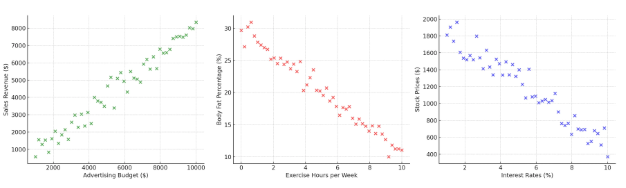

<br>

Jedes dieser Diagramme zeigt Beobachtungen (Zeilen eines DataFrames),  
wobei jede Beobachtung mit einem **X** markiert ist und zwei Werte (Spalten des DataFrames) darstellt.

- Im **grünen Plot** steht jede Beobachtung für ein *Werbebudget* und den damit verbundenen *Umsatz*.  
- Im **roten Plot** repräsentiert jede Beobachtung die *Anzahl der Sportstunden pro Woche* und den *Körperfettanteil*.  
- Im **blauen Plot** stellt jede Beobachtung den *Zinssatz* und den zugehörigen *Aktienpreis* dar.

<br>

-----

<br>


####  **Positive und negative Korrelationen**

<br>

💡 **Interpretation der Plots:**  

Im **ersten (grünen)** Plot erkennen wir:  
Wenn man eine Beobachtung auswählt und dann eine andere mit einem höheren Wert auf einer Achse betrachtet,  
hat diese tendenziell auch einen höheren Wert auf der anderen Achse.  
👉 Das ist eine **positive lineare Beziehung**:  
Je höher das *Werbebudget*, desto höher der *Umsatz*.

<br>

Im **zweiten (roten)** Plot sehen wir das Gegenteil:  
Je mehr *Sportstunden*, desto geringer ist in der Regel der *Körperfettanteil*.  
👉 Das ist eine **negative lineare Beziehung**.

<br>

Im **dritten (blauen)** Plot sehen wir ebenfalls eine **negative lineare Beziehung**  
zwischen *Zinssatz* und *Aktienpreis* – allerdings ist dieser Trend **schwächer**.  
Das erkennt man daran, dass die Beobachtungen weiter verstreut sind  
und kein so klares Muster bilden wie zuvor.

<br>

-----

<br>


####  **Korrelation bedeutet nicht Kausalität**

<br>

In der Datenanalyse findet man häufig Variablen, die sich gemeinsam verändern – das nennt man **Korrelation**.  
Aber: Nur weil zwei Variablen miteinander korrelieren, heißt das **nicht**,  
dass die eine die andere **verursacht**.

<br>

Dieses Prinzip wird oft mit dem Satz **„Korrelation ist keine Kausalität“** zusammengefasst.  
Korrelation misst **nur die Stärke und Richtung** einer Beziehung zwischen zwei Variablen.  
Für Kausalität braucht es einen **direkten, belegbaren Zusammenhang**,  
bei dem Änderungen in einer Variable tatsächlich Änderungen in der anderen **verursachen**.

<br>

⚠️ **Achtung:**  
Wer Korrelation mit Kausalität verwechselt, kann zu **falschen Schlüssen** kommen –  
besonders wenn sogenannte **Störfaktoren (confounders)** im Spiel sind,  
die beide Variablen gleichzeitig beeinflussen.

<br>

-----

<br>


####  **Scatterplot mit Python**

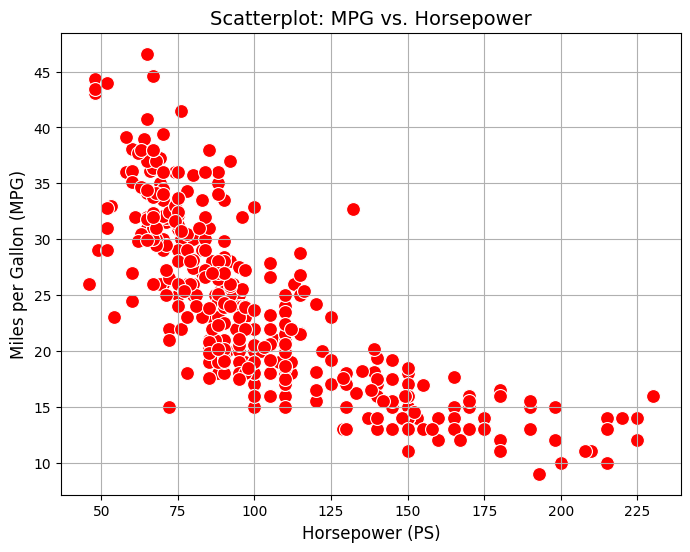

In [ ]:
# Datensatz laden
mpg = sns.load_dataset('mpg')

# Fehlende Werte entfernen
mpg_clean = mpg.dropna()

# Abbildung erstellen
plt.figure(figsize=(8, 6))

# Scatterplot zeichnen
sns.scatterplot(
    x='horsepower',       # PS-Leistung auf der x-Achse
    y='mpg',              # Verbrauch (Meilen pro Gallone) auf der y-Achse
    data=mpg_clean,       # Bereinigter Datensatz
    color='red',          # Farbe der Punkte
    marker='o',           # Punktform (Kreise)
    s=100                 # Punktgröße
)

# Titel und Beschriftungen
plt.title('Scatterplot: MPG vs. Horsepower', fontsize=14)
plt.xlabel('Horsepower (PS)', fontsize=12)
plt.ylabel('Miles per Gallon (MPG)', fontsize=12)

# Gitterlinien anzeigen
plt.grid(True)

# Plot anzeigen
plt.show()

Hier erkennt man einen klaren Trend:  
Autos mit höherer PS-Zahl verbrauchen in der Regel mehr Sprit (also weniger MPG).

<br>

-----

<br>

####  **Pearson-Korrelation**

<br>

Der bekannteste Korrelationskoeffizient ist der **Pearson-Korrelationskoeffizient (r)**.  
Er misst die lineare Beziehung zwischen zwei kontinuierlichen numerischen Variablen.  
Entwickelt wurde er vom britischen Statistiker **Karl Pearson**.

Geeignet ist die Pearson-Korrelation, wenn:

- Beide Variablen **kontinuierlich** sind (z. B. Gewicht, Einkommen).  
- Die Beziehung **linear** ist.  
- Die Verteilung **annähernd normal** ist.  
- Es **keine starken Ausreißer** gibt (diese können das Ergebnis verzerren).

<br>

-----

<br>



####  **Stärke und Richtung der Pearson-Korrelation**

<br>

**Stärke der Korrelation:**

| Bereich (r) | Interpretation |
|--------------|----------------|
| 0.90 bis 1.00 (−0.90 bis −1.00) | Sehr starke Korrelation |
| 0.70 bis 0.89 (−0.70 bis −0.89) | Starke Korrelation |
| 0.40 bis 0.69 (−0.40 bis −0.69) | Mittlere Korrelation |
| 0.10 bis 0.39 (−0.10 bis −0.39) | Schwache Korrelation |
| 0.00 bis 0.09 (−0.00 bis −0.09) | Keine Korrelation |

**Richtung:**

- **Positiv (r > 0):** Beide Variablen steigen gemeinsam (z. B. Größe und Gewicht).  
- **Negativ (r < 0):** Eine steigt, die andere fällt (z. B. Geschwindigkeit und Reisezeit).  
- **Null (r = 0):** Kein linearer Zusammenhang (z. B. Schuhgröße und Intelligenz).

<br>

-----

<br>


####  **Beispiele für Pearson-Korrelation**

<br>

- Lernzeit und Prüfungsnote: **r = 0.85 → starke positive Korrelation**  
- Fernsehkonsum und Noten: **r = −0.75 → starke negative Korrelation**  
- Haarfarbe und Einkommen: **r = 0.03 → keine Korrelation**

<br>

-----

<br>


####  **Einschränkungen der Pearson-Korrelation**

<br>

- Empfindlich gegenüber **Ausreißern**  
- Misst nur **lineare Zusammenhänge**  
- **Keine Kausalität:** Zeigt Zusammenhang, aber keine Ursache-Wirkung  

<br>

-----

<br>


####  **Pearson-Korrelation mit Python berechnen**

In [ ]:
# Schritt 2: MPG-Datensatz laden und fehlende Werte entfernen
mpg = sns.load_dataset('mpg')
mpg_clean = mpg.dropna()

# Schritt 3: Pearson-Korrelation zwischen 'mpg' und 'horsepower' berechnen
mpg_horsepower_corr = mpg_clean['mpg'].corr(
    mpg_clean['horsepower'],   # Vergleichsvariable
    method='pearson'           # Pearson-Korrelationsmethode
)

# Schritt 4: Ergebnis anzeigen
display(f"Der Pearson-Korrelationskoeffizient beträgt: {mpg_horsepower_corr:.2f}")

'Der Pearson-Korrelationskoeffizient beträgt: -0.78'

Die Ausgabe zeigt eine **negative und mittelstarke Korrelation** zwischen  
**'mpg' (Miles per Gallon)** und **'horsepower' (PS)**,  
was mit dem Muster im vorherigen Streudiagramm übereinstimmt.

<br>

-----

<br>

####  **Pearson-Korrelationsmatrix als Heatmap in Python**

<br>

Du kannst den **Pearson-Korrelationswert** nicht nur zwischen zwei Variablen,  
sondern auch zwischen **einer Variable und allen anderen numerischen Variablen**  
im Datensatz berechnen – mithilfe einer **Korrelationsmatrix**.  

Diese Matrix lässt sich anschließend als **Heatmap visualisieren**,  
um **Zusammenhänge schnell zu erkennen**.

<br>

-----

<br>

'📈 Pearson-Korrelationsmatrix:'

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model_year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model_year        0.290316    1.000000

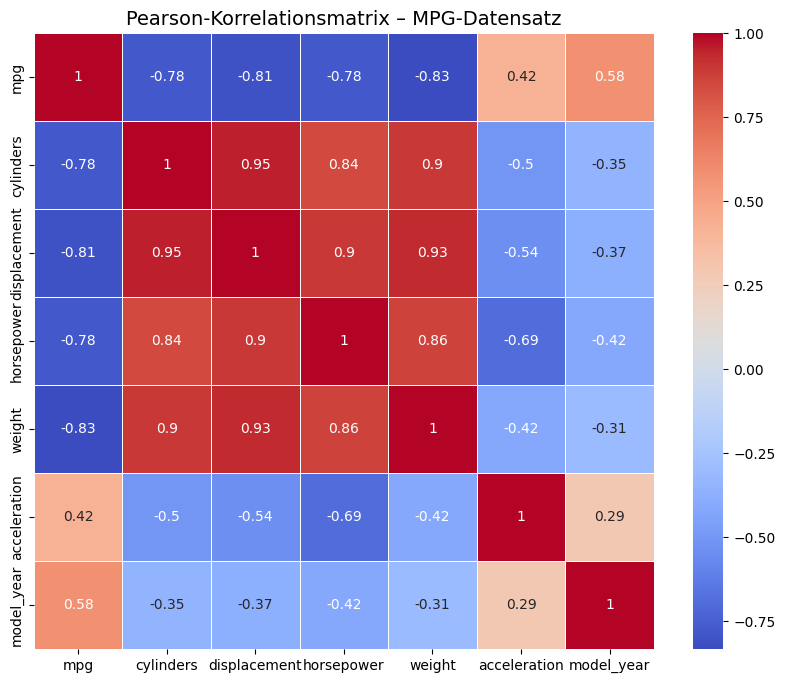

In [ ]:
# Schritt 2: MPG-Datensatz laden und fehlende Werte entfernen
mpg = sns.load_dataset('mpg')
mpg_clean = mpg.dropna()

# Schritt 3: Pearson-Korrelationsmatrix berechnen
# Nur numerische Variablen auswählen
numerical_data = mpg_clean.select_dtypes(include=['number'])

# Berechnung der Korrelationsmatrix (Pearson)
correlation_matrix = numerical_data.corr(method='pearson')

# Ausgabe der Korrelationsmatrix
display("📈 Pearson-Korrelationsmatrix:")
display(correlation_matrix)

# Schritt 4: Heatmap zur Visualisierung erstellen
plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,         # Korrelationswerte in den Zellen anzeigen
    cmap='coolwarm',    # Farbschema für positive/negative Korrelationen
    linewidths=0.5      # Linien zwischen den Zellen
)

# Titel hinzufügen
plt.title("Pearson-Korrelationsmatrix – MPG-Datensatz", fontsize=14)

# Diagramm anzeigen
plt.show()


Diese Heatmap der **Korrelationsmatrix** ermöglicht es dir,  
**starke, mittlere und schwache positive sowie negative Zusammenhänge**  
zwischen Variablen auf einen Blick zu erkennen.  

Wie die **Farbskala am rechten Rand** andeutet,  
stehen **rote Töne** für **positive Korrelationen**  
und **blaue Töne** für **negative**.  

Je **intensiver die Farbe**, desto **stärker ist der lineare Zusammenhang** zwischen den Variablen.

<br>

-----

<br>


### **Korrelation - Übung**

####  **Übung 1**

<br>

Du arbeitest mit dem **mpg-Datensatz**, der in der Variable `mpg` gespeichert ist.  
Berechne die **Pearson-Korrelation** zwischen **zwei Variablen**.  
Sieh dir dazu das DataFrame an und **wähle zwei geeignete Spalten**,  
z. B. `mpg` (Miles per Gallon) und `horsepower` (PS).


In [ ]:
# Datensatz laden
mpg = sns.load_dataset('mpg')

# Fehlende Werte entfernen
mpg_clean = mpg.dropna()
print(mpg_clean)

# 🔹 Fehlende Teile ausfüllen, um die Pearson-Korrelation zu berechnen
mpg_weight_corr = mpg_clean['mpg'].corr(mpg_clean['weight'], method='pearson')

# 🔹 Ergebnis der Korrelation ausgeben
print(f"The Pearson correlation coefficient is {mpg_weight_corr:.2f}.")


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

<br>


---


<br>


####  **Übung 2**

<br>

Du arbeitest weiterhin mit dem **gleichen Datensatz (`mpg`)**.  
Erstelle nun ein **Scatterplot (Streudiagramm)**, um die **Beziehung zwischen zwei Variablen** darzustellen.  

Wähle dazu **zwei geeignete Spalten** aus dem DataFrame –  
zum Beispiel `mpg` (Miles per Gallon) und `weight` (Fahrzeuggewicht).



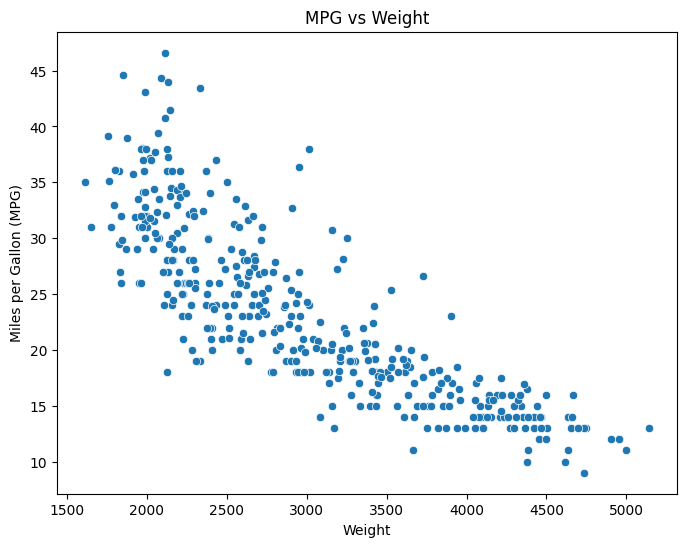

In [ ]:
# Datensatz laden
mpg = sns.load_dataset('mpg')

# Fehlende Werte entfernen
mpg_clean = mpg.dropna()

plt.figure(figsize=(8, 6))

# 🔹 Fehlende Teile ausfüllen, um das Streudiagramm zu erstellen
sns.scatterplot(x='weight', y='mpg', data=mpg_clean)

# Titel und Achsenbeschriftungen
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon (MPG)')

# Diagramm anzeigen
plt.show()


<br>

---

<br>

####  **Übung 3**

<br>

Berechne die **Pearson-Korrelation** zwischen den Spalten  
**`mpg`** (Miles per Gallon) und **`acceleration`** im **mpg-Datensatz**.  

In [ ]:
# Datensatz laden
mpg = sns.load_dataset('mpg')

# Fehlende Werte entfernen
mpg_clean = mpg.dropna()

# 🔹 Fehlende Teile ausfüllen, um die Pearson-Korrelation zu berechnen
mpg_acceleration_corr = mpg_clean['mpg'].corr(mpg_clean['acceleration'], method='pearson')

# Ergebnis anzeigen
print(f"The Pearson correlation coefficient is {mpg_acceleration_corr:.2f}.")


The Pearson correlation coefficient is 0.42.


<br>

-----

<br>

####  **Übung 4**

<br>

Erstelle eine **Heatmap der Korrelationsmatrix** für den  
**mpg-Datensatz**, um die Zusammenhänge zwischen den numerischen Variablen visuell darzustellen.  




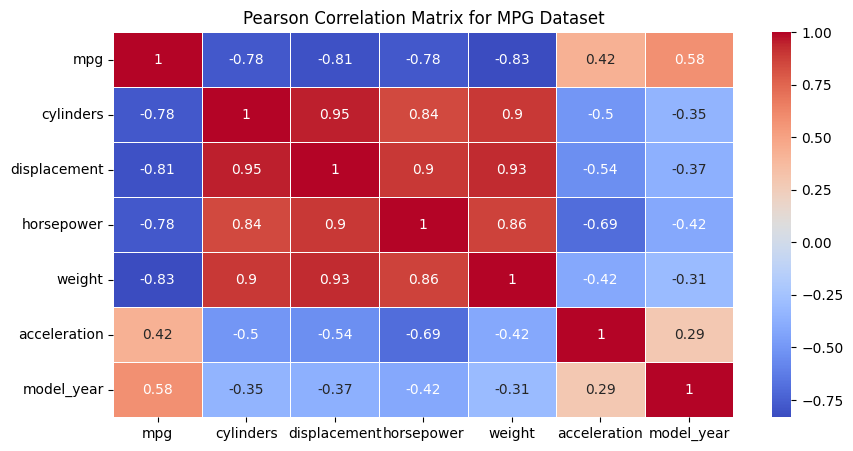

In [ ]:
# Datensatz laden
mpg = sns.load_dataset('mpg')

# Fehlende Werte entfernen
mpg_clean = mpg.dropna()

# 🔹 Fülle die Lücken aus
numerical_data = mpg_clean.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr(method='pearson')

# 🔹 Erstelle die Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix for MPG Dataset')
plt.show()


<br>  

-----

<br>


#### ❓ **Schnellfragen**

<details>
<summary><b>Was misst die Korrelation?</b></summary>

Die Korrelation misst die Stärke und Richtung der Beziehung zwischen zwei Variablen und zeigt, ob Veränderungen in einer Variable mit Veränderungen in einer anderen einhergehen.  

</details>

<details>
<summary><b>Was ist der zentrale Unterschied zwischen Korrelation und Kausalität?</b></summary>

Korrelation zeigt eine statistische Beziehung zwischen zwei Variablen.  
Kausalität bedeutet, dass eine Variable die andere beeinflusst.  
Korrelation bedeutet nicht automatisch Kausalität.  

</details>

<details>
<summary><b>Wann ist die Pearson-Korrelation geeignet?</b></summary>

Die Pearson-Korrelation ist geeignet, wenn:  
- beide Variablen kontinuierlich sind,  
- eine lineare Beziehung besteht,  
- die Daten normalverteilt sind,  
- keine starken Ausreißer vorliegen.  

</details>

<details>
<summary><b>Was bedeutet ein Pearson-Korrelationskoeffizient von -0,75?</b></summary>

Ein r-Wert von -0,75 zeigt eine starke negative Korrelation:  
Wenn eine Variable steigt, sinkt die andere deutlich.  

</details>

<details>
<summary><b>Warum ist es riskant, sich nur auf die Pearson-Korrelation zu verlassen?</b></summary>

Weil sie:  
- empfindlich gegenüber Ausreißern ist,  
- nur lineare Zusammenhänge erkennt,  
- keine Kausalität beweist.  
Dadurch können Fehlinterpretationen entstehen.  

</details>

<details>
<summary><b>Wie interpretierst du einen Korrelationswert von 0,03?</b></summary>

Ein Wert von 0,03 zeigt keine nennenswerte Korrelation.  
Es besteht kein signifikanter linearer Zusammenhang zwischen den beiden Variablen.  

</details>

<details>
<summary><b>Wie nennt man die Korrelation, wenn beide Variablen gleichzeitig steigen?</b></summary>

Das nennt man eine **positive Korrelation** – wenn eine Variable steigt, steigt die andere ebenfalls.  

</details>

<br>  

-----

<br>


### **Chi-Quadrat-Test**

####  **Chi-Quadrat-Test**

Der **Chi-Quadrat-Test (χ²)** wird häufig verwendet, um die **Unabhängigkeit zwischen zwei kategorialen Variablen** zu überprüfen.

**Nullhypothese (H₀):**  
Die beiden kategorialen Variablen sind unabhängig voneinander.  

**Alternativhypothese (H₁):**  
Die beiden kategorialen Variablen sind *nicht unabhängig*, d. h. es besteht ein Zusammenhang zwischen ihnen.  

**Entscheidungsregel:**  
- Ist der **p-Wert** aus dem Chi-Quadrat-Test kleiner als das Signifikanzniveau (häufig α = 0,05):  
  👉 Verwerfe die Nullhypothese → Es gibt einen **statistisch signifikanten Zusammenhang** zwischen den Variablen.  
- Ist der **p-Wert** größer als das Signifikanzniveau:  
  👉 Behalte die Nullhypothese bei → Es gibt **keine Hinweise auf einen signifikanten Zusammenhang**.  


<br>  

-----

<br>


#### **Beispiel in Python mit dem tips Datensatz:**

In [ ]:
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Create a contingency table
contingency_table = pd.crosstab(tips['sex'], tips['smoker'])


display(contingency_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54

In der **Kontingenztabelle**:

- Die **Zeilen** repräsentieren die Kategorien der **ersten Variable** (z. B. `sex`: *Male* / *Female*).  
- Die **Spalten** stehen für die Kategorien der **zweiten Variable** (z. B. `smoker`: *Raucher* / *Nichtraucher*).  
- Die **Werte** geben die **Häufigkeit der Beobachtungen** in jeder Kombination der Kategorien an.  

<br>  

-----

<br>

#### **Durchführung des Chi-Quadrat-Tests:**


In [ ]:
# Datensatz laden (z. B. 'tips'-Datensatz)
tips = sns.load_dataset("tips")

# Erstelle eine Kontingenztabelle zwischen 'sex' und 'smoker'
contingency_table = pd.crosstab(tips['sex'], tips['smoker'])
display(contingency_table)

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Ergebnisse ausgeben
print("Chi-Quadrat-Statistik:", chi2)
print("P-Wert:", p)
print("Freiheitsgrade:", dof)
print("\nErwartete Häufigkeiten:\n", expected)

# Interpretation der Ergebnisse
if p < 0.05:
    print("\n📊 Schlussfolgerung: Es besteht ein signifikanter Zusammenhang zwischen Geschlecht und Rauchstatus.")
else:
    print("\n📊 Schlussfolgerung: Es besteht kein signifikanter Zusammenhang zwischen Geschlecht und Rauchstatus.")

smoker  Yes  No
sex            
Male     60  97
Female   33  54

Chi-Quadrat-Statistik: 0.0
P-Wert: 1.0
Freiheitsgrade: 1

Erwartete Häufigkeiten:
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]

📊 Schlussfolgerung: Es besteht kein signifikanter Zusammenhang zwischen Geschlecht und Rauchstatus.


Mit dem Chi-Quadrat-Test lässt sich überprüfen, ob zwischen zwei kategorialen Variablen Unabhängigkeit besteht oder ob ein statistisch signifikanter Zusammenhang vorliegt – basierend auf dem Vergleich von beobachteten und erwarteten Häufigkeiten.

<br>


---


<br>

### **Chi-Quadrat-Test - Übung**

####  **Übung 1**

Du arbeitest mit dem **Titanic-Datensatz**, der bereits eingelesen und in der Variable `titanic` gespeichert wurde.  
Untersuche, ob es eine **statistisch signifikante Beziehung** zwischen dem **Überlebensstatus (`survived`)** und der **Passagierklasse (`pclass`)** gibt.




In [ ]:
# Datensatz laden
titanic = sns.load_dataset("titanic")

# Erstelle die Kontingenztabelle
contingency_table = pd.crosstab(titanic['survived'], titanic['pclass'])
# 🔹 Fülle die Spaltennamen ein (z. B. 'survived' und 'pclass')

# Führe den Chi-Quadrat-Test durch
chi2, p, dof, expected = chi2_contingency(contingency_table)
# 🔹 Füge die fehlende Funktion ein (z. B. chi2_contingency)

# Gib die Ergebnisse aus
print("Chi-Quadrat-Statistik:", chi2)
print("P-Wert:", p)
print("Freiheitsgrade:", dof)
print("Erwartete Häufigkeiten:\n", expected)

# Interpretiere die Ergebnisse
if p < 0.05:
    print("✅ Schlussfolgerung: Es besteht ein signifikanter Zusammenhang zwischen Überlebensstatus und Passagierklasse.")
else:
    print("❌ Schlussfolgerung: Es besteht kein signifikanter Zusammenhang zwischen Überlebensstatus und Passagierklasse.")

Chi-Quadrat-Statistik: 102.88898875696056
P-Wert: 4.549251711298793e-23
Freiheitsgrade: 2
Erwartete Häufigkeiten:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]
✅ Schlussfolgerung: Es besteht ein signifikanter Zusammenhang zwischen Überlebensstatus und Passagierklasse.


#### **Übung 2: Zusammenhang zwischen Überlebensstatus und Geschlecht**

Weiter geht’s mit demselben Datensatz.
Untersuche, ob es einen Zusammenhang zwischen dem Überlebensstatus (survived)
und dem Geschlecht (sex) der Passagiere gibt.

In [ ]:
# Datensatz laden
titanic = sns.load_dataset("titanic")

# Erstelle die Kontingenztabelle
contingency_table = pd.crosstab(titanic['survived'], titanic['pclass'])
# 🔹 Erste Variable: Überlebensstatus
# 🔹 Zweite Variable: Passagierklasse

# Führe den Chi-Quadrat-Test durch
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Gib die Ergebnisse aus
print("Chi-Quadrat-Statistik:", chi2)
print("P-Wert:", p)
print("Freiheitsgrade:", dof)
print("Erwartete Häufigkeiten:\n", expected)

# Interpretiere die Ergebnisse
if p < 0.05:
    print("✅ Schlussfolgerung: Es besteht ein signifikanter Zusammenhang zwischen Überlebensstatus und Passagierklasse.")
else:
    print("❌ Schlussfolgerung: Es besteht kein signifikanter Zusammenhang zwischen Überlebensstatus und Passagierklasse.")


Chi-Quadrat-Statistik: 102.88898875696056
P-Wert: 4.549251711298793e-23
Freiheitsgrade: 2
Erwartete Häufigkeiten:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]
✅ Schlussfolgerung: Es besteht ein signifikanter Zusammenhang zwischen Überlebensstatus und Passagierklasse.


<br>


---


<br>

### **ANOVA**

####  **ANOVA (Varianzanalyse)**  

**Was ist eine ANOVA (Varianzanalyse)?**  
ANOVA steht für *Analysis of Variance* – auf Deutsch: **Varianzanalyse**.  
Dabei handelt es sich um ein statistisches Verfahren, mit dem geprüft wird,  
ob es **signifikante Unterschiede zwischen den Mittelwerten von drei oder mehr Gruppen** gibt.  

Während der Mittelwert zweier Gruppen mit einem einfachen *t-Test* verglichen werden kann,  
erlaubt ANOVA die gleichzeitige Analyse mehrerer Gruppen –  
ein leistungsstarkes Tool für komplexe Datensätze.  

> 💡 **Beispiel:**  
> Stell dir vor, du testest die Wirksamkeit von drei verschiedenen Diäten auf Gewichtsverlust.  
> ANOVA hilft dir herauszufinden, ob sich der durchschnittliche Gewichtsverlust  
> zwischen den Diäten signifikant unterscheidet.  
> Wenn das Ergebnis signifikant ist, kann man mit einem **Post-hoc-Test** prüfen,  
> welche Diäten sich voneinander unterscheiden.  

<br>

-----

<br>


####  **Wie funktioniert ANOVA?**  

ANOVA testet die Hypothese, dass **alle Gruppen denselben Mittelwert** haben.  
Wenn signifikante Unterschiede vorliegen, zeigt ANOVA,  
dass mindestens eine Gruppe vom Rest abweicht.  

Die ANOVA vergleicht zwei Arten von Varianz:  

- **Zwischengruppen-Varianz:** Misst, wie stark sich die Gruppenmittelwerte vom Gesamtmittelwert unterscheiden.  
- **Innengruppen-Varianz:** Misst die Streuung innerhalb der Gruppen.  

Das Verhältnis dieser beiden Varianzen ergibt den **F-Wert**.  
Je größer der F-Wert, desto wahrscheinlicher sind die Unterschiede **nicht zufällig**.  

<br>

-----

<br>


####  **Arten der ANOVA**  

- **Einfaktorielle ANOVA (One-Way ANOVA):**  
  Vergleicht Mittelwerte über mehrere Gruppen einer unabhängigen Variable.  
  → Beispiel: Unterschiedliche Lehrmethoden und ihre Wirkung auf Schülerleistungen.  

- **Zweifaktorielle ANOVA (Two-Way ANOVA):**  
  Betrachtet zwei unabhängige Variablen gleichzeitig – inklusive Wechselwirkungen.  
  → Beispiel: Lehrmethode *und* Lernumgebung.  

- **ANOVA mit Messwiederholung (Repeated Measures ANOVA):**  
  Wird verwendet, wenn dieselben Personen mehrfach getestet werden.  
  → Beispiel: Genesungsverläufe über verschiedene Zeitpunkte hinweg.  

<br>

-----

<br>


####  **Wann sollte man ANOVA einsetzen?**  

ANOVA eignet sich, wenn du:  
- mehr als zwei Gruppenmittelwerte vergleichen willst,  
- den Effekt einer oder mehrerer unabhängiger Variablen untersuchen möchtest,  
- experimentelle oder beobachtende Daten analysierst (z. B. klinische Studien, Experimente, Business-Analysen).  

<br>

-----

<br>


####  **Voraussetzungen für ANOVA**  

Damit ANOVA verlässliche Ergebnisse liefert, sollten folgende Bedingungen erfüllt sein:  
- **Normalverteilung** innerhalb der Gruppen  
- **Varianzgleichheit** zwischen den Gruppen  
- **Unabhängigkeit** der Beobachtungen  

> ⚠️ Wenn diese Annahmen verletzt werden, kann man alternative Tests wie **Welch’s ANOVA** verwenden,  
> die keine Varianzgleichheit voraussetzt.  

<br>

-----

<br>


####  **Ergebnisse der ANOVA interpretieren**  

Typische Ausgabe:  

- **F-Wert (F-Statistik):** Verhältnis von Gruppen- zu Innenvarianz  
- **p-Wert:** Wahrscheinlichkeit, dass die Unterschiede zufällig sind  

**F-Wert verstehen:**  
\[
F = \frac{\text{Varianz zwischen Gruppen}}{\text{Varianz innerhalb der Gruppen}}
\]

- F ≈ 1 → keine signifikanten Unterschiede  
- F > 1 → Gruppen unterscheiden sich stärker als erwartet  
- hoher F-Wert → möglicher signifikanter Unterschied  

**Freiheitsgrade:**  
- df_between = k − 1  
- df_within = N − k  
- df_total = N − 1  

**p-Wert-Interpretation:**  
- p < 0.05 → Nullhypothese ablehnen → mindestens eine Gruppe unterscheidet sich  
- p ≥ 0.05 → Unterschiede wahrscheinlich zufällig  

> 💡 Beispiel:  
> - F = 1.2, p = 0.30 → kein signifikanter Unterschied  
> - F = 8.5, p = 0.001 → mindestens eine Gruppe unterscheidet sich signifikant  

<br>

-----

<br>


####  **ANOVA mit Python**  



In [ ]:
# 1. Bibliotheken importieren


# 2. Daten generieren
# Wir simulieren ein Beispiel mit drei Diäten und deren Gewichtsverlust.
# Sample data
np.random.seed(42)

diet_A = np.random.normal(loc=5, scale=1.5, size=30)  # Diet A: Mean weight loss ~5 kg
diet_B = np.random.normal(loc=6, scale=1.2, size=30)  # Diet B: Mean weight loss ~6 kg
diet_C = np.random.normal(loc=7, scale=1.3, size=30)  # Diet C: Mean weight loss ~7 kg

# Combine into a DataFrame
data = pd.DataFrame({
    'weight_loss': np.concatenate([diet_A, diet_B, diet_C]),
    'diet_type': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Display the first few rows
print(data)


# 3. Durchführen einer einfaktoriellen ANOVA
# Wir verwenden die Methode ols (Ordinary Least Squares) aus statsmodels, um
# das Modell anzupassen, gefolgt von einer ANOVA mit anova_lm.
# ANOVA using statsmodels
model = ols('weight_loss ~ C(diet_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)



    weight_loss diet_type
0      5.745071         A
1      4.792604         A
2      5.971533         A
3      7.284545         A
4      4.648770         A
..          ...       ...
85     6.347716         C
86     8.190023         C
87     7.427376         C
88     6.311312         C
89     7.667248         C

[90 rows x 2 columns]
                  sum_sq    df          F        PR(>F)
C(diet_type)   79.282189   2.0  25.121379  2.445101e-09
Residual      137.284469  87.0        NaN           NaN


####  **Interpretieren der ANOVA-Ausgabe**  

| Quelle | sum_sq | df | F | PR(>F) |
|:----------------|:------------:|:----:|:-----------:|:-------------:|
| **C(diet_type)** | 79.282189 | 2.0 | 25.121379 | 2.445101e-09 |
| **Residual** | 137.284469 | 87.0 | NaN | NaN |

<br>

**Varianz zwischen den Gruppen (C(diet_type))**  
- **Sum Sq (79.28):** Misst, wie stark sich die Mittelwerte der einzelnen Diätgruppen vom Gesamtmittelwert unterscheiden.  
  Ein höherer Wert deutet auf größere Unterschiede zwischen den Diäten hin.  
- **df (2.0):** Freiheitsgrade der Zwischengruppen-Varianz.  
  Bei drei Diäten gilt: \( 3 - 1 = 2 \).  
- **F-Statistik (25.12):** Verhältnis der Varianz *zwischen* den Gruppen zur Varianz *innerhalb* der Gruppen.  
  Ein hoher F-Wert (hier 25.12) zeigt deutliche Unterschiede zwischen den Gruppen.  
- **PR(>F) bzw. p-Wert (2.45 × 10⁻⁹):**  
  Gibt die Wahrscheinlichkeit an, diesen F-Wert zu erhalten, falls alle Mittelwerte gleich wären.  
  Der p-Wert ist extrem klein (weit unter 0.05) → die Unterschiede sind **hochsignifikant**.  

<br>

**Varianz innerhalb der Gruppen (Residual)**  
- **Sum Sq (137.28):** Steht für die Variabilität *innerhalb* jeder Diätgruppe – also natürliche Streuung.  
- **df (87.0):** Freiheitsgrade der Residuen → \( 90 - 3 = 87 \).  
- **F und PR(>F):** Für Residuen nicht relevant, da sie als Referenz zur Berechnung des F-Werts dienen.  

<br>

**Abschließende Interpretation**  
Der hohe F-Wert (**25.12**) und der extrem kleine p-Wert (**2.45 × 10⁻⁹**) zeigen:  
Die beobachteten Unterschiede im Gewichtsverlust zwischen den Diäten sind **statistisch signifikant**.  

➡️ Wir **verwerfen die Nullhypothese** und schließen:  
Mindestens eine der Diäten führt zu einem signifikant anderen Gewichtsverlust als die anderen.  

<br>

-----

<br>


### **ANOVA - Übung**

####  **Übung 1 – Einfaktorielle ANOVA**

Im vorgegebenen Precode wird ein Beispieldatensatz generiert und in ein DataFrame umgewandelt.  
Deine Aufgabe ist es, das **ANOVA-Modell** zu vervollständigen, indem du in der Formel  
`'weight_loss ~ C(diet_type)'` angibst und den ANOVA-Test mit  
`sm.stats.anova_lm(model, typ=2)` durchführst.



In [ ]:
# Beispieldaten generieren
np.random.seed(42)

# Simulierte Gewichtsabnahme (in kg) für drei verschiedene Diäten
diet_A = np.random.normal(loc=5, scale=1.5, size=30)  # Diät A
diet_B = np.random.normal(loc=6, scale=1.2, size=30)  # Diät B
diet_C = np.random.normal(loc=7, scale=1.3, size=30)  # Diät C

# Daten in ein DataFrame zusammenführen
daten = pd.DataFrame({
    'weight_loss': np.concatenate([diet_A, diet_B, diet_C]),
    'diet_type': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# ANOVA-Modell anpassen (Formel vervollständigen)
modell = ols('weight_loss ~ C(diet_type)', data=daten).fit()
# 🔹 Trage die abhängige Variable (Gewichtsverlust) und die unabhängige Variable (Diätart) ein.

# ANOVA-Test durchführen
anova_tabelle = sm.stats.anova_lm(modell, typ=2)
# 🔹 Fülle die fehlende Funktion aus, um den ANOVA-Test auszuführen.

# ANOVA-Tabelle ausgeben
print(anova_tabelle)


                  sum_sq    df          F        PR(>F)
C(diet_type)   79.282189   2.0  25.121379  2.445101e-09
Residual      137.284469  87.0        NaN           NaN


<br>


---


<br>

#### ❓ **Schnellfragen zur ANOVA-Interpretation**

Nach dem Ausführen des Codes erhältst du eine ANOVA-Tabelle wie diese:

| Quelle         | Sum Sq     | df  | F        | PR(>F)         |
|----------------|-------------|-----|----------|----------------|
| C(diet_type)   | 79.282189   | 2.0 | 25.121379 | 2.445101e-09 |
| Residual       | 137.284469  | 87.0 | NaN       | NaN            |

Basierend auf diesen Ergebnissen beantworte folgende Fragen:

<details>
<summary>💬 Was sagt uns die F-Statistik?</summary>

Die F-Statistik von **25,12** ist relativ hoch.  
Sie zeigt, dass die Varianz beim Gewichtsverlust **zwischen den Diätgruppen deutlich größer** ist  
als die Varianz **innerhalb der Gruppen**.  
Das deutet auf **signifikante Unterschiede zwischen den Diäten** hin.

</details>

<details>
<summary>💬 Sollten wir die Nullhypothese verwerfen oder beibehalten? Warum?</summary>

Wir sollten die **Nullhypothese verwerfen**,  
da der **p-Wert (2,45e-09)** extrem klein ist – deutlich kleiner als das Signifikanzniveau von **0,05**.  
Das bedeutet, dass die Unterschiede im Gewichtsverlust **nicht zufällig** zustande gekommen sind.

</details>

<details>
<summary>💬 Welche Schlussfolgerung lässt sich über den Einfluss der Diäten auf den Gewichtsverlust ziehen?</summary>

Es gibt starke Hinweise, dass **mindestens eine Diät** zu einem **signifikant anderen Gewichtsverlust** führt als die anderen.  
Allerdings zeigt die ANOVA nicht, **welche Diäten sich konkret unterscheiden** –  
dafür wären zusätzliche **Post-hoc-Tests** wie der **Tukey-HSD-Test** nötig.

</details>

<br>

-----

<br>


## **Multivariate Analyse in der EDA**

### **Multivariates Streudiagramm**

<br>

Die Visualisierung **multivariater Daten** ist eine zentrale Technik der Datenanalyse,  
mit der sich Zusammenhänge zwischen mehreren Variablen gleichzeitig untersuchen lassen.  

Durch visuelle Werkzeuge können **Muster, Korrelationen, Cluster und Ausreißer** sichtbar gemacht werden,  
die in Rohdaten oft verborgen bleiben.  

Unter den verschiedenen Visualisierungsmethoden ist das **Streudiagramm** eines der vielseitigsten und effektivsten.  
Wird es um weitere Dimensionen wie **Farbe**, **Größe** oder **3D-Projektionen** ergänzt,  
wird es zu einem leistungsstarken Instrument zur Analyse komplexer Datensätze.  

In diesem Tutorial lernst du, wie du **Streudiagramme in Python erstellst und interpretierst** –  
am Beispiel des bekannten **Iris-Datensatzes**.


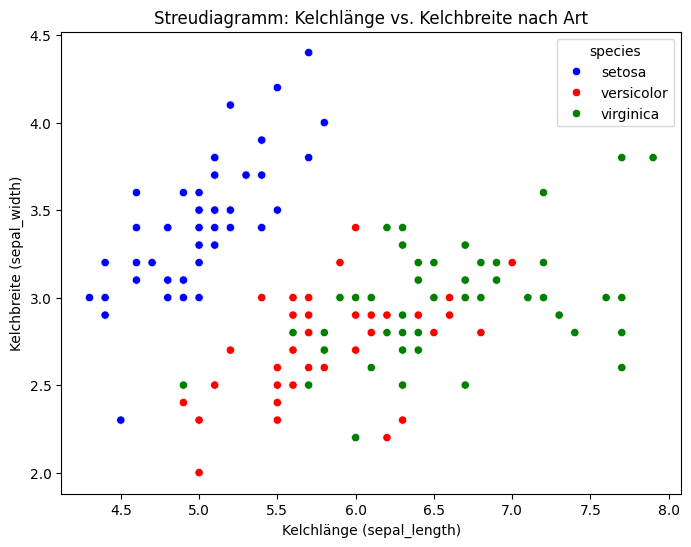

In [ ]:
# Iris-Datensatz laden
iris = sns.load_dataset('iris')

# Überblick:
# - Merkmale: sepal_length, sepal_width, petal_length, petal_width
# - Zielvariable: species (setosa, versicolor, virginica)
# - Häufig genutzt für Klassifikations- und Clustering-Aufgaben

# Streudiagramm mit Farbunterscheidung erstellen
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    palette={
        'setosa': 'blue',
        'versicolor': 'red',
        'virginica': 'green'
    }
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Streudiagramm: Kelchlänge vs. Kelchbreite nach Art')
plt.xlabel('Kelchlänge (sepal_length)')
plt.ylabel('Kelchbreite (sepal_width)')

# Diagramm anzeigen
plt.show()


**Interpretation**

<br>

Dieses Streudiagramm zeigt den **Zusammenhang zwischen *sepal_length* und *sepal_width*** für verschiedene **Iris-Arten**.  
Jeder Punkt stellt eine einzelne Beobachtung dar, und die **Farben unterscheiden die Spezies**:

> 🔹 **Blaue Punkte (Setosa):** Deutlich abgegrenzte Gruppe mit klar erkennbaren Merkmalen.  
> 🔸 **Rote Punkte (Versicolor):** Leichte Überlappung mit Virginica.  
> 🟢 **Grüne Punkte (Virginica):** Ähnlich zu Versicolor, aber mit etwas größeren Kelchblättern.

Die sichtbare **Clusterbildung** zeigt, dass **Setosa hinsichtlich der Kelchblattmaße klar von den anderen Arten abweicht**,  
während sich **Versicolor** und **Virginica** stärker ähneln.

<br>

-----

<br>


#### **Streudiagramm mit Farb- und Größenkodierung**

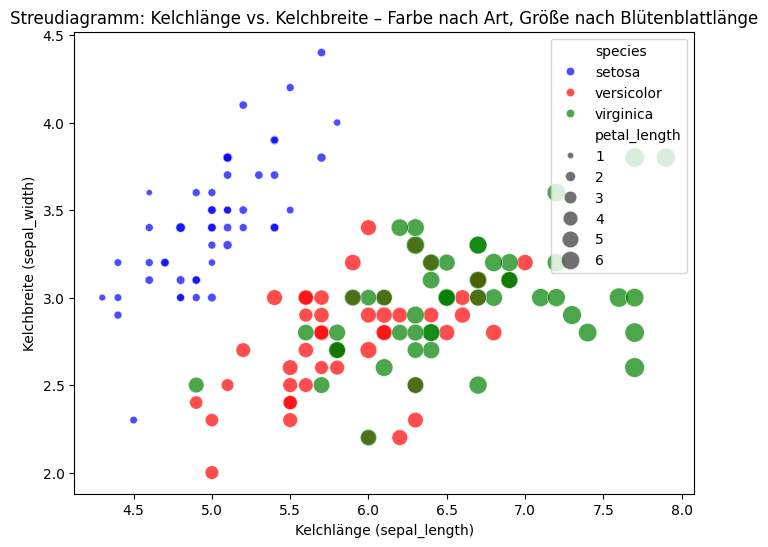

In [ ]:
# Iris-Datensatz laden
iris = sns.load_dataset('iris')

# Streudiagramm mit Farb- und Größenkodierung erstellen
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    size='petal_length',
    sizes=(20, 200),
    palette={
        'setosa': 'blue',
        'versicolor': 'red',
        'virginica': 'green'
    },
    alpha=0.7
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Streudiagramm: Kelchlänge vs. Kelchbreite – Farbe nach Art, Größe nach Blütenblattlänge')
plt.xlabel('Kelchlänge (sepal_length)')
plt.ylabel('Kelchbreite (sepal_width)')

# Diagramm anzeigen
plt.show()


<br>

Dieses Streudiagramm zeigt die **Beziehung zwischen *sepal_length* und *sepal_width*** für drei **Iris-Arten**,  
wobei eine **zusätzliche Dimension über die Punktgröße (petal_length)** dargestellt wird.

> 🔹 **Setosa (blau):** Bildet ein deutlich abgegrenztes Cluster mit kleineren Markern – die Petalen sind also kürzer.  
> 🔸 **Versicolor (rot):** Überlappt teilweise mit Virginica, weist aber mittlere Petallängen auf.  
> 🟢 **Virginica (grün):** Zeigt größere Marker, was auf längere Petalen hinweist.

Die **Größe der Punkte** liefert somit eine zusätzliche Informationsschicht zur Blütenblattlänge.  
Die Kombination aus **Farbe, Größe und Position** ermöglicht eine **mehrdimensionale visuelle Analyse**,  
die besonders für Klassifikationsaufgaben nützlich ist.  

Dieser erweiterte Scatterplot verdeutlicht,  
wie **multivariate Visualisierung** hilft, **komplexe Muster und Unterschiede zwischen Klassen** sichtbar zu machen.

<br>

-----

<br>


### **Multivariates Streudiagramm - Übung**

####  **Übung 1**

<br>

Du arbeitest mit dem **Penguins-Datensatz**, der bereits eingelesen und in der Variablen `penguins` gespeichert ist.  
Verbessere das **Streudiagramm**, indem du die **Körpermasse** zur **Größenkodierung** der Punkte nutzt.

- Die **Körpermasse in Gramm (`body_mass_g`)** bestimmt die **Punktgröße**.  
- Die **Art (`species`)** bestimmt die **Punktfarbe** (wie bisher).  
- Verwende eine **sinnvolle Skalierung** für die Punktgrößen.


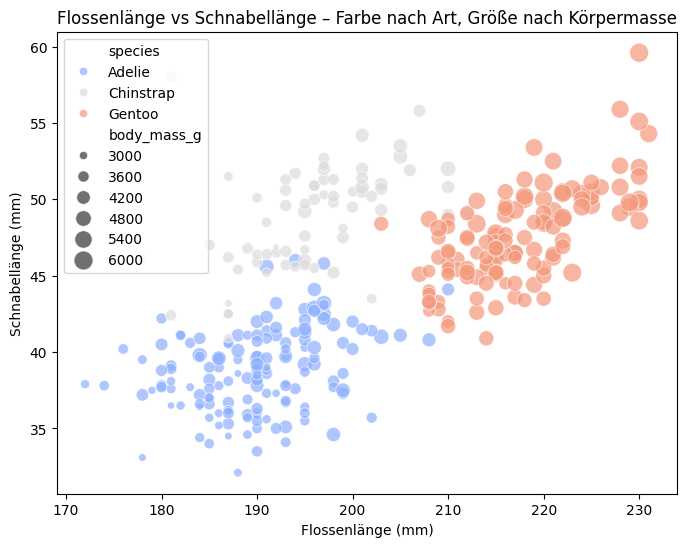

In [ ]:
# Datensatz laden
penguins = sns.load_dataset("penguins")

# Plot erstellen
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins,              # Datensatz
    x="flipper_length_mm",      # x-Achse
    y="bill_length_mm",         # y-Achse
    hue="species",              # Farbe repräsentiert die Art
    size="body_mass_g",         # Größe repräsentiert die Körpermasse
    sizes=(20, 200),            # Skalierung der Punktgrößen
    palette="coolwarm",         # Farbpalette
    alpha=0.7                   # Transparenz
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Flossenlänge (mm)")
plt.ylabel("Schnabellänge (mm)")
plt.title("Flossenlänge vs Schnabellänge – Farbe nach Art, Größe nach Körpermasse")

# Plot anzeigen
plt.show()


<br>

####  **Übung 2**

<br>

Du arbeitest mit dem **Brustkrebs-Datensatz**, der bereits eingelesen und in der Variablen `df` gespeichert ist.  
Erstelle ein **Scatterplot** für den **mittleren Radius** (*radius_mean*) und die **mittlere Textur** (*texture_mean*),  
wobei die **Farbe** die **Diagnose** (gutartig oder bösartig) darstellt.

> 🔹 Die **x-Achse** zeigt den **mittleren Radius (`radius_mean`)**.  
> 🔹 Die **y-Achse** zeigt die **mittlere Textur (`texture_mean`)**.  
> 🔹 Die **Farbe** repräsentiert die **Diagnose (`diagnosis`)** – also:  
> • *benign* → gutartig  
> • *malignant* → bösartig  
> 🔹 Füge sinnvolle **Achsenbeschriftungen** und einen **Titel** hinzu.


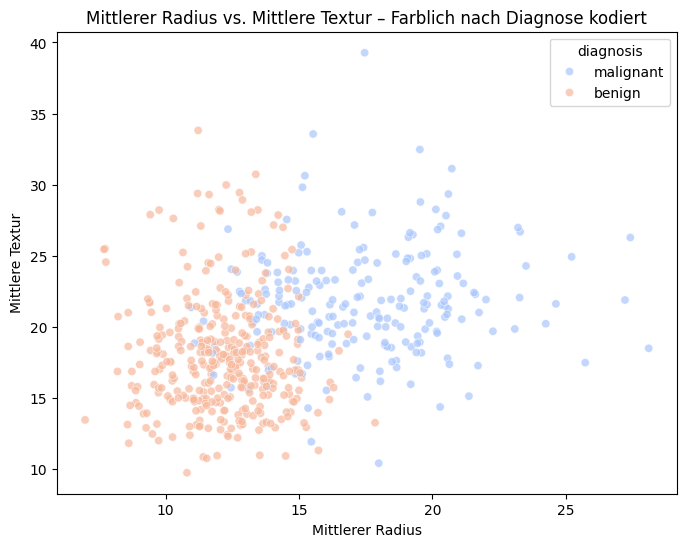

In [ ]:
# Daten laden
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["diagnosis"] = data.target
df["diagnosis"] = df["diagnosis"].map({0: "malignant", 1: "benign"})

# Streudiagramm erstellen
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="mean radius",     # ✅ korrekter Spaltenname
    y="mean texture",    # ✅ korrekter Spaltenname
    hue="diagnosis",     # Farbe stellt Diagnose dar
    palette="coolwarm",
    alpha=0.7
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Mittlerer Radius")
plt.ylabel("Mittlere Textur")
plt.title("Mittlerer Radius vs. Mittlere Textur – Farblich nach Diagnose kodiert")

# Diagramm anzeigen
plt.show()



<br>

####  **Übung 3: Scatterplot mit Farb- und Größenkodierung**

<br>

Du arbeitest weiter mit dem **Brustkrebs-Datensatz**, der bereits in der Variablen `df` gespeichert ist.  
Erstelle ein **erweitertes Scatterplot**, das zusätzlich die **mittlere Fläche** (*area_mean*) als **Größenkodierung** verwendet.

> 🔹 Die **mittlere Fläche (`area_mean`)** bestimmt die **Größe der Punkte**.  
> 🔹 Die **Farbe** bleibt weiterhin abhängig von der **Diagnose (`diagnosis`)**.  
> 🔹 Verwende eine **geeignete Skalierung der Punktgrößen**, damit Unterschiede klar sichtbar sind.



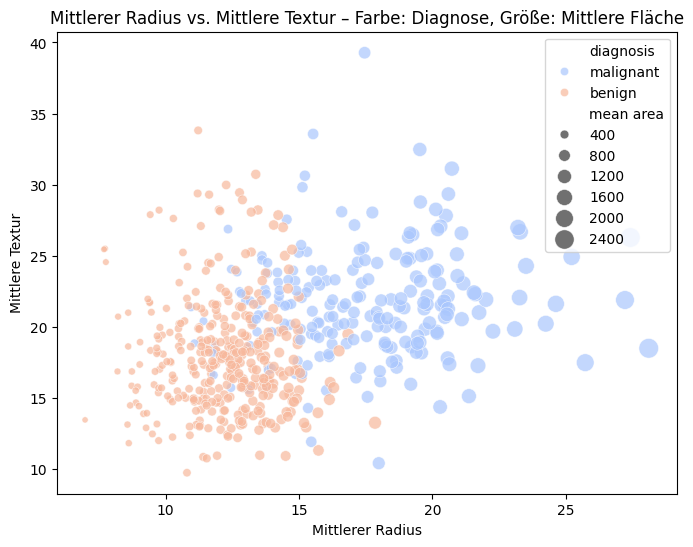

In [ ]:
# Daten laden
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["diagnosis"] = data.target
df["diagnosis"] = df["diagnosis"].map({0: "malignant", 1: "benign"})

# Streudiagramm erstellen
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="mean radius",       # X-Achse
    y="mean texture",      # Y-Achse
    hue="diagnosis",       # Farbe stellt Diagnose dar
    size="mean area",      # Punktgröße stellt mittlere Fläche dar
    sizes=(20, 200),       # Skalierung der Punktgrößen
    palette="coolwarm",
    alpha=0.7
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Mittlerer Radius")
plt.ylabel("Mittlere Textur")
plt.title("Mittlerer Radius vs. Mittlere Textur – Farbe: Diagnose, Größe: Mittlere Fläche")

# Plot anzeigen
plt.show()


### **Multivariates Liniendiagramm**

#### **Multivariates Liniendiagramm**

<br>
Liniendiagramme sind leistungsstark, um Trends über die Zeit zu visualisieren – ideal also für die Analyse von Zeitreihendaten. In diesem Tutorial lernst du, wie du ein multivariates Liniendiagramm mit Python erstellst.

<br>



#### **Multivariates Liniendiagramm mit Python**


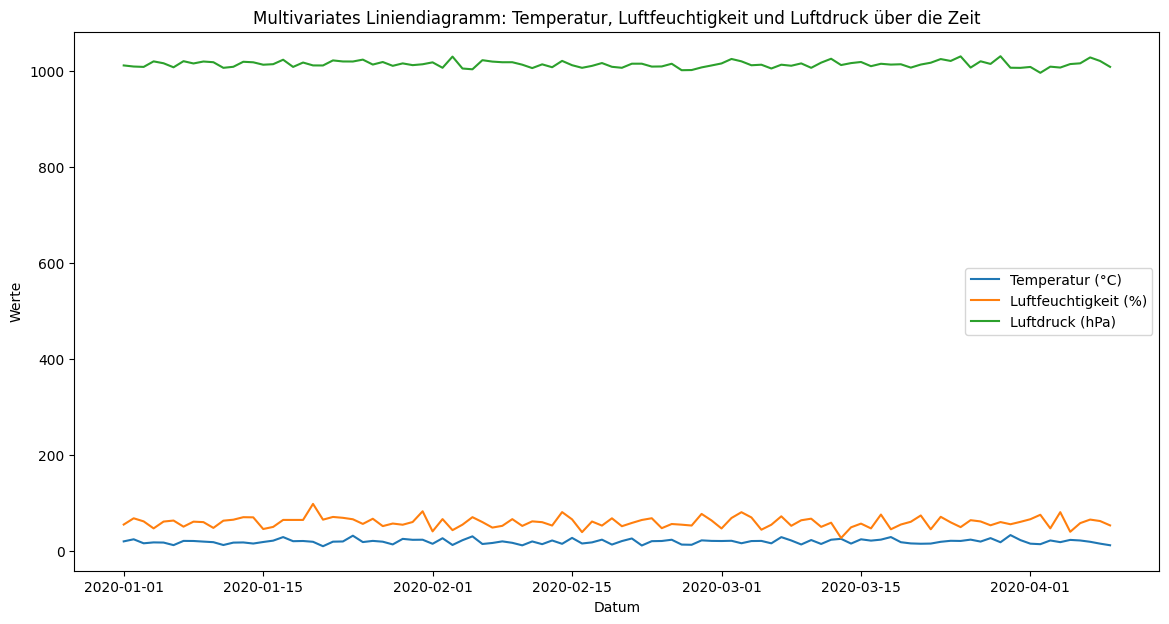

In [ ]:

# Zeitreihen-Datensatz simulieren
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# DataFrame mit zufälligen Messreihen erstellen
data = pd.DataFrame({
    'date': dates,
    'temperature': np.random.normal(loc=20, scale=5, size=100),
    'humidity': np.random.normal(loc=60, scale=10, size=100),
    'pressure': np.random.normal(loc=1013, scale=8, size=100)
})

# Abbildung erzeugen
plt.figure(figsize=(14, 7))

# Temperaturverlauf plotten
plt.plot(data['date'], data['temperature'], label='Temperatur (°C)')

# Feuchteverlauf plotten
plt.plot(data['date'], data['humidity'], label='Luftfeuchtigkeit (%)')

# Druckverlauf plotten
plt.plot(data['date'], data['pressure'], label='Luftdruck (hPa)')

# Titel, Achsenbeschriftungen und Legende hinzufügen
plt.title('Multivariates Liniendiagramm: Temperatur, Luftfeuchtigkeit und Luftdruck über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Werte')
plt.legend()

# Diagramm anzeigen
plt.show()


**Interpretation**

<br>

Dieses multivariate Liniendiagramm visualisiert die Entwicklung von **Temperatur**, **Luftfeuchtigkeit** und **Luftdruck** im Zeitverlauf:  

> **Temperatur (°C):**  
> Zeigt tägliche Schwankungen, möglicherweise beeinflusst durch saisonale Muster.  

> **Luftfeuchtigkeit (%):**  
> Verdeutlicht wechselnde Feuchtigkeitsniveaus mit Spitzen und Tiefpunkten, die auf Umweltveränderungen hinweisen.  

> **Luftdruck (hPa):**  
> Veranschaulicht atmosphärische Druckschwankungen, die mit Wetterveränderungen korreliert sein können.  

<br>

-----

<br>


### **Multivariates Liniendiagramm - Übung**

####  **Übung 1**


Im vorgegebenen **Precode** wurde bereits ein **Zeitreihendatensatz** generiert.  
Deine Aufgabe ist es, ein **Liniendiagramm der Temperatur über die Zeit** zu erstellen.  

**Vorgaben:**  
- Die **x-Achse** stellt das **Datum (`date`)** dar.  
- Die **y-Achse** stellt die **Temperatur in °C (`temperature`)** dar.  
- Füge **Achsenbeschriftungen** und einen **Diagrammtitel** hinzu.  


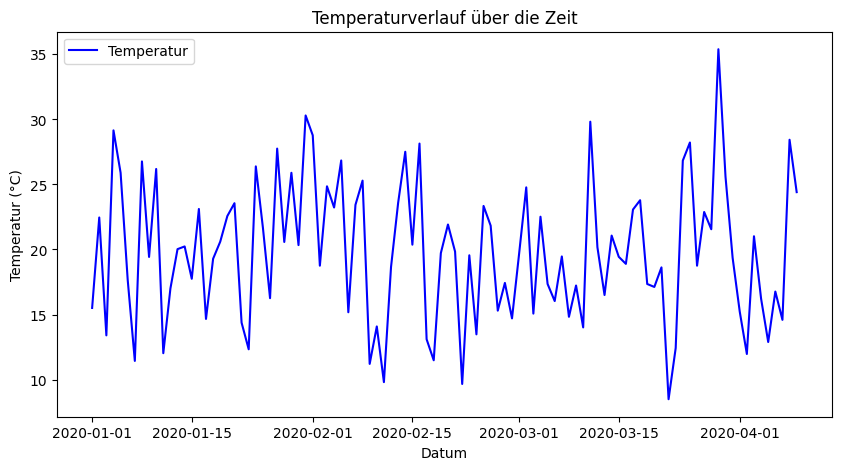

In [ ]:
# Erstelle einen Zeitreihendatensatz
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

data = pd.DataFrame({
    'date': dates,
    'temperature': np.random.normal(loc=20, scale=5, size=100)
})

# Erstelle das Liniendiagramm
plt.figure(figsize=(10, 5))
plt.plot(data["date"], data["temperature"], label="Temperatur", color="blue")

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Temperaturverlauf über die Zeit")
plt.legend()

# Diagramm anzeigen
plt.show()


<br>

####  **Übung 2**



Erstelle ein **Liniendiagramm**, das **Temperatur**, **Luftfeuchtigkeit** und **Luftdruck** im Zeitverlauf darstellt – also ein **multivariates Liniendiagramm**.  

**Vorgaben:**  
- **Temperatur (°C)** → **Blaue Linie**  
- **Luftfeuchtigkeit (%)** → **Grüne Linie**  
- **Luftdruck (hPa)** → **Rote Linie**  
- Füge **Achsenbeschriftungen**, einen **Titel** und eine **Legende** hinzu, damit die Linien klar zugeordnet werden können.  




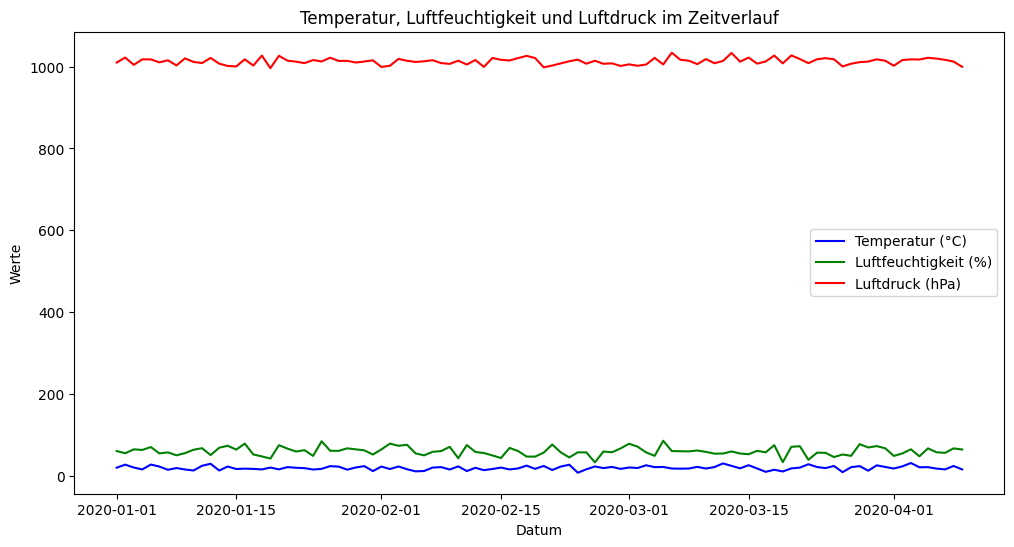

In [ ]:
# Erstelle einen Zeitreihendatensatz
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

data = pd.DataFrame({
    'date': dates,
    'temperature': np.random.normal(loc=20, scale=5, size=100),
    'humidity': np.random.normal(loc=60, scale=10, size=100),
    'pressure': np.random.normal(loc=1013, scale=8, size=100)
})

# Erstelle das multivariate Liniendiagramm
plt.figure(figsize=(12, 6))
plt.plot(data["date"], data["temperature"], label="Temperatur (°C)", color="blue")
plt.plot(data["date"], data["humidity"], label="Luftfeuchtigkeit (%)", color="green")
plt.plot(data["date"], data["pressure"], label="Luftdruck (hPa)", color="red")

# Achsenbeschriftungen, Titel und Legende hinzufügen
plt.xlabel("Datum")
plt.ylabel("Werte")
plt.title("Temperatur, Luftfeuchtigkeit und Luftdruck im Zeitverlauf")
plt.legend()

# Diagramm anzeigen
plt.show()



<br>


---


<br>

### **Multivariater Box Plot**

#### **Multivariater Box Plot**  
<br>  

Boxplots sind ein zentrales Werkzeug zur **Visualisierung von Verteilungen** und zur **Erkennung von Ausreißern**.  
Während Streudiagramme Beziehungen und Trends zwischen Variablen verdeutlichen, eignen sich Boxplots besonders gut für den **Vergleich mehrerer Gruppen oder Kategorien**.  

Wenn sie durch zusätzliche Dimensionen wie **Farbe, Gruppierung oder Unterkategorien** ergänzt werden, ermöglichen sie eine tiefere Analyse komplexer Datensätze.  

In diesem Tutorial lernst du, wie man **multivariate Boxplots** in Python erstellt und interpretiert – am Beispiel des bekannten **Penguins-Datensatzes**.  



#### **Multivariater Boxplot mit Python**

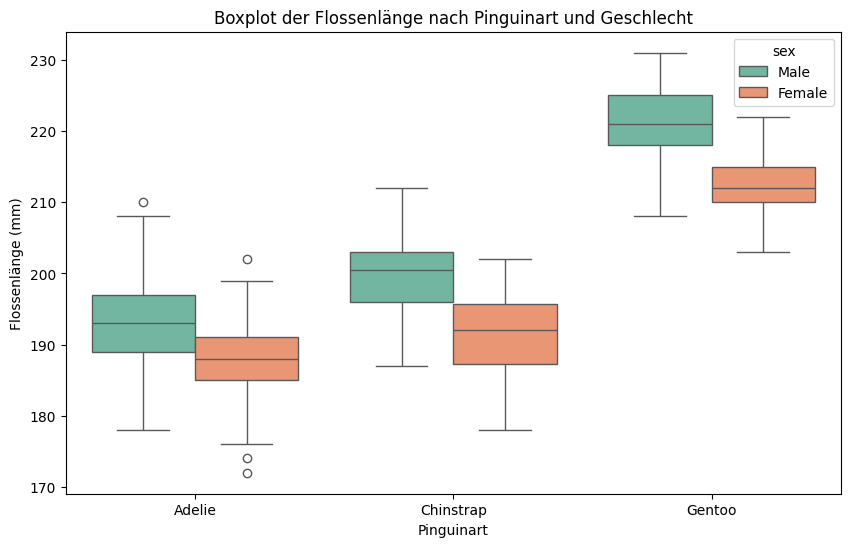

In [ ]:
# Schritt 2: Laden des Penguins-Datensatzes
penguins = sns.load_dataset('penguins')
# Lädt den Penguins-Datensatz – häufig verwendet für Klassifikation und explorative Datenanalyse

# Über den Penguins-Datensatz:
# - Merkmale: bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
# - Zielvariable: species (Adelie, Chinstrap, Gentoo)
# - Häufig genutzt zur Klassifikation und Untersuchung biologischer Muster


# Schritt 3: Erstellen eines multivariaten Boxplots

# Initialisierung der Abbildung mit einer bestimmten Größe
plt.figure(figsize=(10, 6))  # Steuert die Diagrammgröße (10 Zoll breit, 6 Zoll hoch)

# Erstellen des Boxplots mit Seaborn
sns.boxplot(
    data=penguins,
    # Datensatz, der verwendet wird
    x='species',
    # Kategoriale Variable auf der x-Achse
    y='flipper_length_mm',
    # Numerische Variable auf der y-Achse (zeigt die Verteilung)
    hue='sex',
    # Farbunterscheidung basierend auf dem Geschlecht der Pinguine
    palette='Set2'
    # Farbpalette für bessere visuelle Unterscheidung
)

# Schritt 4: Hinzufügen von Titel und Achsenbeschriftungen
plt.title('Boxplot der Flossenlänge nach Pinguinart und Geschlecht')
plt.xlabel('Pinguinart')
plt.ylabel('Flossenlänge (mm)')

# Schritt 5: Anzeige des Diagramms
plt.show()  # Zeigt das Diagramm an


**Interpretation**  
<br>  

- **Adelie-Pinguine** haben tendenziell **kürzere Flossen** im Vergleich zu Chinstrap und Gentoo.  
- **Gentoo-Pinguine** weisen im Durchschnitt die **längsten Flossen** auf, mit erkennbaren Unterschieden zwischen den Geschlechtern.  
- **Chinstrap-Pinguine** liegen in ihrer **Flipperlänge** zwischen Adelie und Gentoo.  
- Dieser Boxplot erleichtert den **Vergleich der zentralen Tendenzen und Streuungen** der Flossenlängen zwischen verschiedenen Arten und Geschlechtern.  
Er hilft dabei, **Unterschiede in den Verteilungen** sowie **potenzielle Ausreißer** im Penguins-Datensatz zu erkennen.  

<br>  

-----  

<br>  


### **Multivariater Box Plot - Übung**

#### **Übung 1**  
<br>  

**Aufgabe:**  
Erstelle ein **Boxplot**, das die Verteilung der **Meilen pro Gallone (miles per gallon)** in Abhängigkeit von der **Zylinderanzahl (cylinders)** darstellt.  

**Anleitung:**  
Du arbeitest mit dem **mpg-Datensatz**, der in der Variable `mpg` gespeichert ist.  

Das Diagramm soll:  
- auf der **x-Achse** die Anzahl der Zylinder (`cylinders`) zeigen,  
- auf der **y-Achse** die Meilen pro Gallone (`mpg`) darstellen,  
- zusätzlich mit **Achsenbeschriftungen** und einem **aussagekräftigen Titel** versehen werden.  


/tmp/ipython-input-1068651709.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


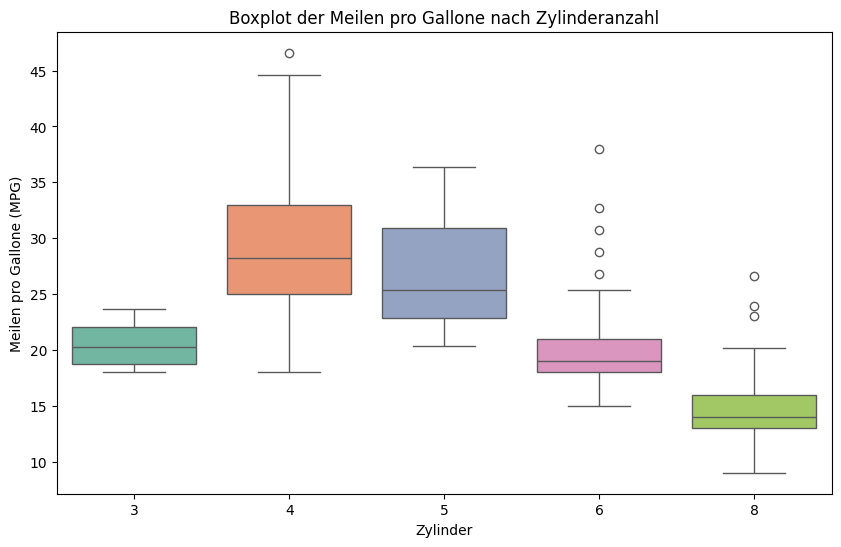

In [ ]:
# Datensatz laden
mpg = sns.load_dataset("mpg")

# Erstelle das Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=mpg,             # Datensatz
    x="cylinders",        # Variable für die x-Achse
    y="mpg",              # Variable für die y-Achse
    palette="Set2"        # Farbpalette
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Zylinder")
plt.ylabel("Meilen pro Gallone (MPG)")
plt.title("Boxplot der Meilen pro Gallone nach Zylinderanzahl")

# Diagramm anzeigen
plt.show()


#### **Übung 2**  
<br>  

**Aufgabe:**  
Erweitere das vorherige **Boxplot**, indem du die Variable **origin** als **Farbkodierung (Hue)** hinzufügst.  
So kannst du den **Kraftstoffverbrauch (mpg)** nach **Fahrzeugherkunft** vergleichen.  

**Anleitung:**  
- Die **x-Achse** zeigt weiterhin die **Zylinderanzahl (`cylinders`)**.  
- Die **y-Achse** zeigt die **Meilen pro Gallone (`mpg`)**.  
- Die **Farbe (Hue)** wird durch **origin** bestimmt.  
- Ergänze **Achsenbeschriftungen** und einen **aussagekräftigen Titel**.  



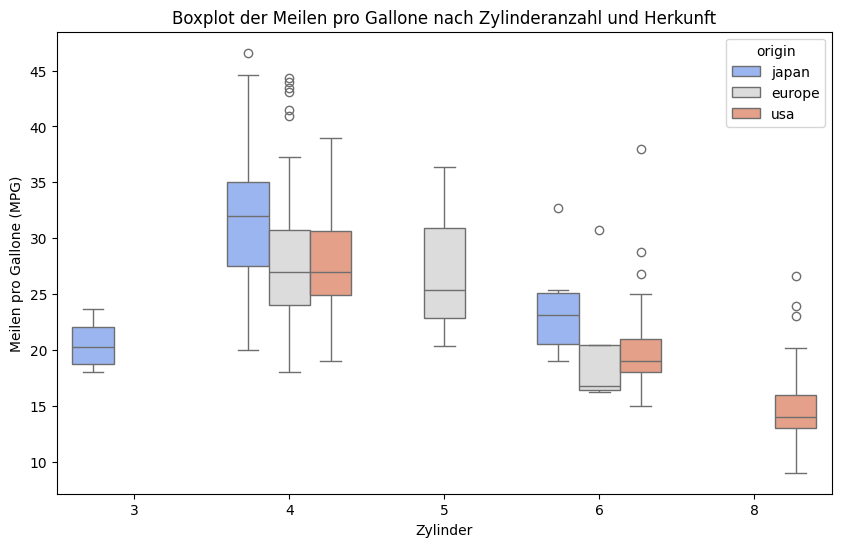

In [ ]:
# Datensatz laden
mpg = sns.load_dataset("mpg")

# Erstelle das Boxplot mit Farbkodierung nach Herkunft
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=mpg,           # Datensatz
    x="cylinders",      # Variable für die x-Achse
    y="mpg",            # Variable für die y-Achse
    hue="origin",       # Farbe stellt die Fahrzeugherkunft dar
    palette="coolwarm"  # Farbpalette
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Zylinder")
plt.ylabel("Meilen pro Gallone (MPG)")
plt.title("Boxplot der Meilen pro Gallone nach Zylinderanzahl und Herkunft")

# Diagramm anzeigen
plt.show()


#### **Übung 3**  
<br>  

**Aufgabe:**  
Erstelle ein **Boxplot**, das das **Körpergewicht (in Gramm)** der Pinguine nach ihrer **Art (species)** vergleicht.  

**Anleitung:**  
- Die **x-Achse** zeigt die **Pinguinart (`species`)**.  
- Die **y-Achse** zeigt die **Körpermasse in Gramm (`body_mass_g`)**.  
- Ergänze **passende Achsenbeschriftungen** und einen **aussagekräftigen Titel**, um die Darstellung klar zu machen.  


/tmp/ipython-input-2107270202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


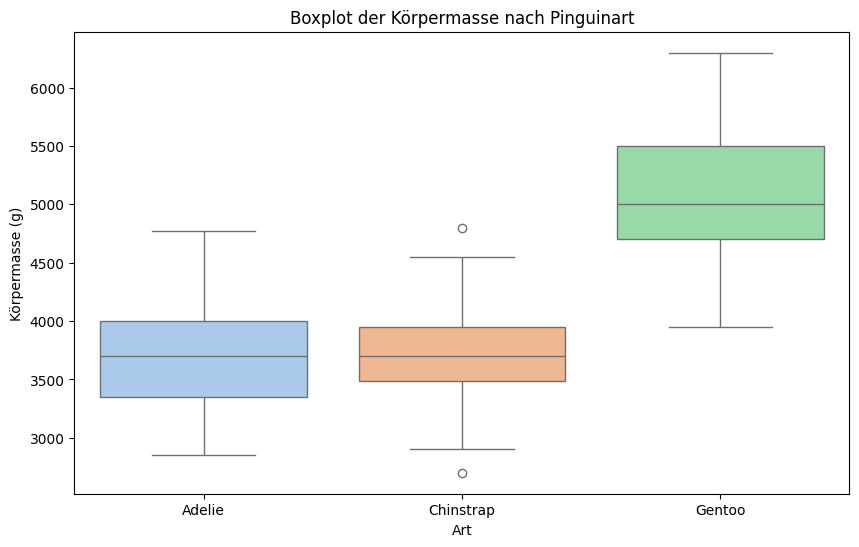

In [ ]:
# Datensatz laden
penguins = sns.load_dataset("penguins")

# Erstelle das Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=penguins,        # Datensatz
    x="species",          # Variable für die x-Achse
    y="body_mass_g",      # Variable für die y-Achse
    palette="pastel"      # Farbpalette
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Art")
plt.ylabel("Körpermasse (g)")
plt.title("Boxplot der Körpermasse nach Pinguinart")

# Diagramm anzeigen
plt.show()


#### **Übung 4**  
<br>  

**Aufgabe:**  
Erweitere das vorherige **Boxplot**, um die **Schnabellängen (bill_length_mm)** zwischen **Geschlechtern** und **Pinguinarten** zu vergleichen.  

**Anleitung:**  
- Die **x-Achse** zeigt die **Pinguinart (`species`)**.  
- Die **y-Achse** zeigt die **Schnabellänge in Millimetern (`bill_length_mm`)**.  
- Die **Farbe (Hue)** wird durch das **Geschlecht (`sex`)** bestimmt.  
- Ergänze **aussagekräftige Achsenbeschriftungen** und einen **klaren Titel**.  



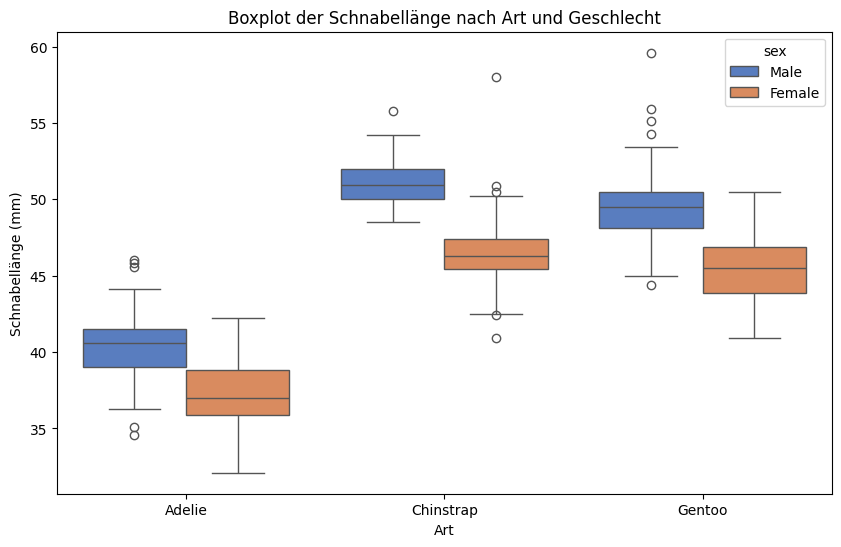

In [ ]:
# Datensatz laden
penguins = sns.load_dataset("penguins")

# Erstelle das Boxplot mit Farbkodierung nach Geschlecht
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=penguins,          # Datensatz
    x="species",            # Variable für die x-Achse
    y="bill_length_mm",     # Variable für die y-Achse
    hue="sex",              # Farbe stellt das Geschlecht dar
    palette="muted"         # Farbpalette
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Art")
plt.ylabel("Schnabellänge (mm)")
plt.title("Boxplot der Schnabellänge nach Art und Geschlecht")

# Diagramm anzeigen
plt.show()


<br>


---


<br>

### **Multivariates Balkendiagramm**

####  **Multivariates Balkendiagramm**

<br>

Wie wir gesehen haben, eignen sich **Balkendiagramme** hervorragend zum **Vergleich kategorischer Daten**, besonders wenn aggregierte Werte wie **Mittelwerte oder Summen** dargestellt werden sollen.  

Im Kontext der **multivariaten Analyse** können Balkendiagramme – angereichert mit zusätzlichen Dimensionen wie **Farbe, Gruppierung und Unterkategorien** – zu **leistungsstarken Werkzeugen** werden, um komplexe Datensätze zu untersuchen.  

In diesem Tutorial lernst du, wie man **Balkendiagramme mit Python** erstellt und interpretiert – am Beispiel des bekannten **Penguins-Datensatzes**.




#### **Multivariates Balkendiagramm mit Python**

/tmp/ipython-input-2055390108.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


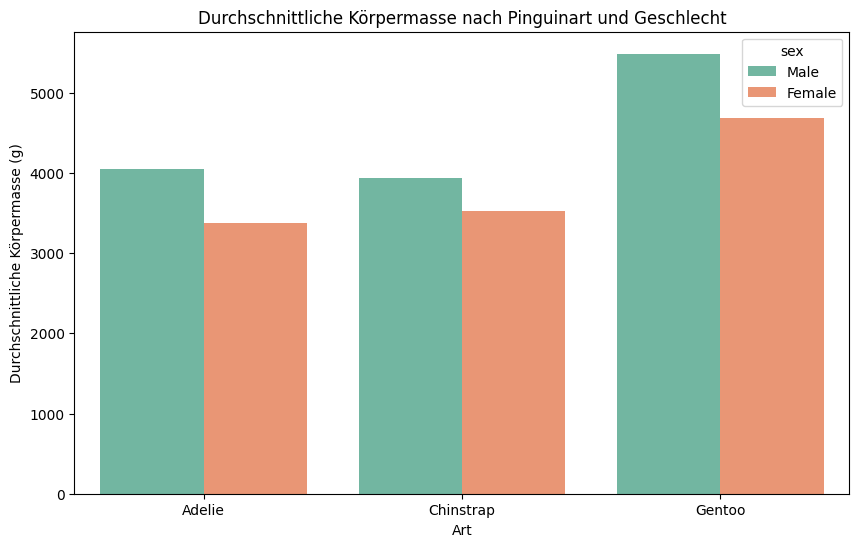

In [ ]:
# Schritt 2: Laden des Penguins-Datensatzes
penguins = sns.load_dataset('penguins')
# Der Penguins-Datensatz wird häufig für Klassifikations- und Explorationsanalysen verwendet

# Zum Datensatz:
# - Merkmale: bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
# - Zielvariable: species (Adelie, Chinstrap, Gentoo)

# Schritt 3: Erstellen eines multivariaten Balkendiagramms
plt.figure(figsize=(10, 6))  # Legt die Diagrammgröße fest

sns.barplot(
    data=penguins,                # Datensatz
    x='species',                  # Kategorische Variable (x-Achse)
    y='body_mass_g',              # Numerische Variable (y-Achse)
    hue='sex',                    # Farbige Unterscheidung nach Geschlecht
    palette='Set2',               # Farbpalette
    ci=None                       # Entfernt Konfidenzintervalle für bessere Lesbarkeit
)

# Schritt 4: Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittliche Körpermasse nach Pinguinart und Geschlecht')
plt.xlabel('Art')
plt.ylabel('Durchschnittliche Körpermasse (g)')

# Schritt 5: Diagramm anzeigen
plt.show()

**Interpretation des Diagramms**

<br>

Dieses **Balkendiagramm** vergleicht aggregierte Werte und macht **Unterschiede in der Körpergewichtsverteilung** zwischen den Arten und Geschlechtern sichtbar.  

- **Gentoo-Pinguine** haben im Durchschnitt das **höchste Körpergewicht** im Vergleich zu Adelie und Chinstrap.  
- Bei den meisten Arten **wiegen die Männchen durchschnittlich mehr** als die Weibchen.  
- Bei **Adelie-Pinguinen** fällt der Unterschied zwischen den Geschlechtern **deutlich geringer** aus als bei Gentoo und Chinstrap.  

<br>

-----

<br>


### **Multivariates Balkendiagramm - Übung**

####  **Übung 1**

<br>

**Aufgabe:**  
Du arbeitest mit dem **mpg-Datensatz**, der bereits in der Variable `mpg` gespeichert ist.  
Erstelle ein **Balkendiagramm**, das den **durchschnittlichen MPG-Wert (miles per gallon)** für jede **Zylinderanzahl** darstellt.  

**Anforderungen:**  
- Die **x-Achse** zeigt die **Zylinderanzahl (`cylinders`)**.  
- Die **y-Achse** zeigt den **durchschnittlichen Kraftstoffverbrauch (`mpg`)**.  
- Füge **aussagekräftige Achsenbeschriftungen** und einen **Titel** hinzu.  



/tmp/ipython-input-3802027154.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3802027154.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


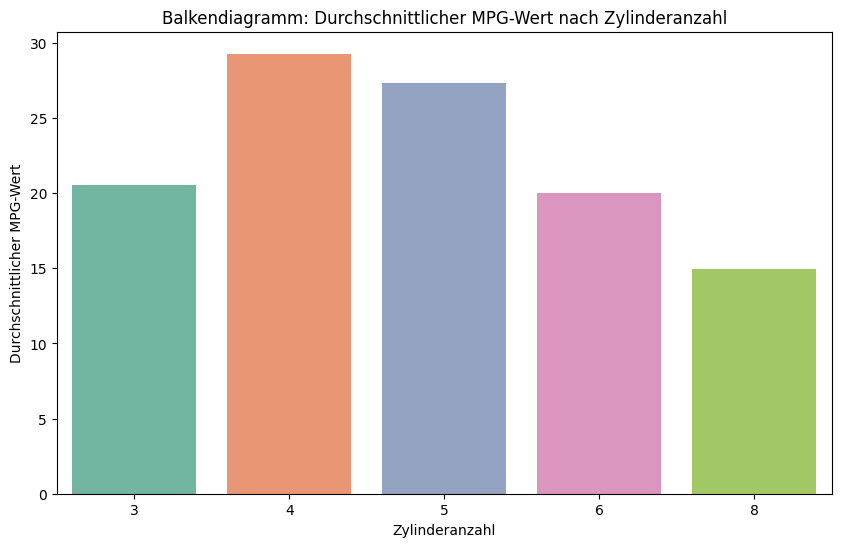

In [ ]:
# Datensatz laden
mpg = sns.load_dataset("mpg")

# Erstelle das Balkendiagramm
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mpg,
    x="cylinders",
    y="mpg",
    palette="Set2",
    ci=None  # Konfidenzintervall entfernen
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Zylinderanzahl")
plt.ylabel("Durchschnittlicher MPG-Wert")
plt.title("Balkendiagramm: Durchschnittlicher MPG-Wert nach Zylinderanzahl")

# Diagramm anzeigen
plt.show()


####  **Übung 2**

<br>

**Aufgabe:**  
Du arbeitest mit dem **Penguins-Datensatz**, der bereits in der Variable `penguins` gespeichert ist.  
Erstelle ein **Balkendiagramm**, das die **durchschnittliche Flossenlänge (in mm)** pro **Pinguinart** darstellt.  

**Anforderungen:**  
- Die **x-Achse** zeigt die **Art (`species`)**.  
- Die **y-Achse** zeigt die **durchschnittliche Flossenlänge (`flipper_length_mm`)**.  
- Füge **passende Achsenbeschriftungen** und einen **Titel** hinzu.  


/tmp/ipython-input-794511963.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-794511963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


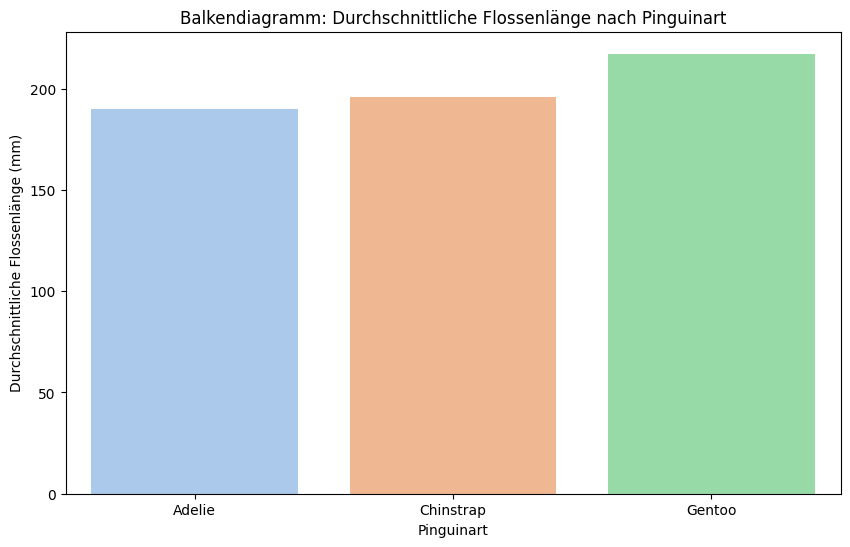

In [ ]:
# Datensatz laden
penguins = sns.load_dataset("penguins")

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(
    data=penguins,
    x="species",
    y="flipper_length_mm",
    palette="pastel",
    ci=None
)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Pinguinart")
plt.ylabel("Durchschnittliche Flossenlänge (mm)")
plt.title("Balkendiagramm: Durchschnittliche Flossenlänge nach Pinguinart")

# Diagramm anzeigen
plt.show()


# **Sprint 4: Projektwoche**

Wende dein Wissen in einem praxisnahen Projekt an.
Sammle praktische Erfahrung im Bereinigen, Aufbereiten, Erkunden, Visualisieren und Zusammenfassen von Daten.

In [ ]:
# Siehe Slack Ordner "Python DA Projekt"